In [ ]:
                                    Project Description:
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
Problem Statement: 
        
        
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [3]:
RFdf=pd.read_csv('Rainfall.csv')

In [9]:
RFdf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [11]:
print('{} Number of rows and {} Features re present  in the dataset'.format(RFdf.shape[0],RFdf.shape[1]))

8425 Number of rows and 23 Features re present  in the dataset


In [12]:
RFdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [13]:
# Here from the above dataset information we have seen that Date feataure is of object type but it should be in  datetime  format

RFdf['Date']=pd.to_datetime(RFdf['Date'])

In [14]:
RFdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8350 non-null   float64       
 3   MaxTemp        8365 non-null   float64       
 4   Rainfall       8185 non-null   float64       
 5   Evaporation    4913 non-null   float64       
 6   Sunshine       4431 non-null   float64       
 7   WindGustDir    7434 non-null   object        
 8   WindGustSpeed  7434 non-null   float64       
 9   WindDir9am     7596 non-null   object        
 10  WindDir3pm     8117 non-null   object        
 11  WindSpeed9am   8349 non-null   float64       
 12  WindSpeed3pm   8318 non-null   float64       
 13  Humidity9am    8366 non-null   float64       
 14  Humidity3pm    8323 non-null   float64       
 15  Pressure9am    7116 n

In [15]:
object_count=0
float64_count=0
for col in RFdf:
    if RFdf[col].dtypes=='object':
        object_count+=1
    else:
        float64_count+=1
print('number of object types feature is{} and object type is {}'.format(object_count,float64_count))

number of object types feature is6 and object type is 17


In [16]:
#checking for duplicat values 
RFdf.duplicated().sum()

1663

In [ ]:
# 1663 duplicates values are present in the dataset 

In [17]:
# removing Duplicates values 
RFdf.drop_duplicates(inplace=True)

In [18]:
#checking for duplicat values 
RFdf.duplicated().sum()

0

In [19]:
#checking for missing values   in the features
RFdf.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

<Axes: >

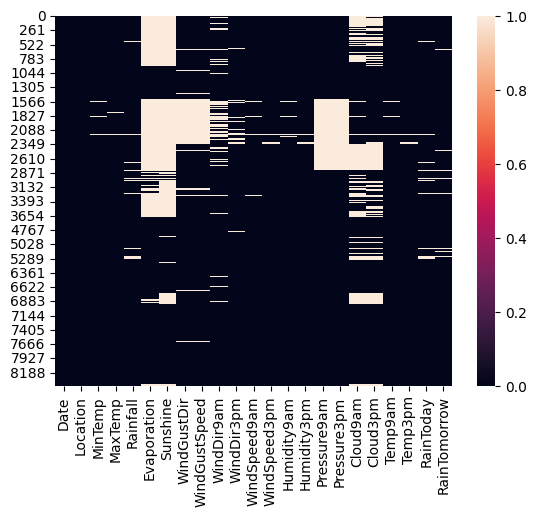

In [13]:
# confirmation of missing values using heat map
sns.heatmap(RFdf.isnull())

In [14]:
# checking for unique values in the feature 
RFdf.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [15]:
#checking for the frequency count of each feature in the dataset
for col in RFdf:
    print(RFdf[col].value_counts())

Date
2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: count, Length: 3004, dtype: int64
Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: count, dtype: int64
MinTemp
13.2    58
12.0    57
14.8    53
12.7    53
10.8    52
        ..
26.6     1
28.0     1
26.9     1
1.4      1
26.0     1
Name: count, Length: 285, dtype: int64
MaxTemp
19.0    66
19.8    62
20.8    54
23.8    54
25.0    54
        ..
38.9     1
10.3     1
9.4      1
42.5     1
43.5     1
Name: count, Length: 331, dtype: int64
Rainfall
0.0      4334
0.2       321
0.4       144
0.6        87
1.2        69
         ... 
73.8        1
23.8        1
61.2        1
128.0       1
40.0   

In [16]:
RFdf.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,6762,6692.000000,6705.000000,6624.000000,3841.000000,3526.000000,5820.000000,6699.000000,6662.000000,6708.000000,6666.000000,5454.000000,5451.000000,4896.000000,4860.000000,6711.000000,6670.000000
mean,2012-07-18 16:05:44.986690304,13.109145,24.098345,2.780148,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561
min,2008-12-01 00:00:00,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,2010-08-15 00:00:00,9.000000,19.500000,0.000000,2.600000,5.400000,30.000000,6.000000,9.000000,56.000000,38.000000,1013.100000,1010.300000,1.000000,1.000000,13.800000,18.300000
50%,2012-03-05 00:00:00,13.200000,23.500000,0.000000,4.600000,9.000000,37.000000,11.000000,17.000000,68.000000,50.000000,1017.600000,1015.100000,5.000000,5.000000,18.000000,22.100000
75%,2014-07-07 00:00:00,17.500000,28.400000,0.800000,7.000000,10.800000,48.000000,19.000000,24.000000,81.000000,63.000000,1022.200000,1019.600000,7.000000,7.000000,22.200000,26.800000
max,2017-06-25 00:00:00,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000
std,NaN,5.569574,6.156128,10.591418,4.436790,3.785883,14.418577,9.833499,9.620043,17.251733,18.631086,6.712043,6.646755,2.908324,2.740519,5.744117,6.012896


In [17]:
# Separating categorical feature and numerical feature from the dataset
categorical=[]
numerical=[]
for col in RFdf:
    if RFdf[col].dtypes=='object':
        categorical.append(col)
    else:
        numerical.append(col)

In [18]:
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [19]:
numerical

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

            # Handling Missing values  of Numerical feature from the dataset 

In [20]:
for col in numerical:
    if RFdf[col].isnull().sum()!=0:
        RFdf[col]=RFdf[col].fillna(RFdf[col].mean())
        

In [21]:
for col in numerical:
    print(col,":",RFdf[col].isnull().sum())
        
        

Date : 0
MinTemp : 0
MaxTemp : 0
Rainfall : 0
Evaporation : 0
Sunshine : 0
WindGustSpeed : 0
WindSpeed9am : 0
WindSpeed3pm : 0
Humidity9am : 0
Humidity3pm : 0
Pressure9am : 0
Pressure3pm : 0
Cloud9am : 0
Cloud3pm : 0
Temp9am : 0
Temp3pm : 0


    # Handling Missing values  of Numerical feature from the dataset

In [22]:
for col in categorical:
    if RFdf[col].isnull().sum()!=0:
        RFdf[col]=RFdf[col].fillna(RFdf[col].mode()[0])
        

In [23]:
for col in categorical:
    print(col,":",RFdf[col].isnull().sum())
        
        

Location : 0
WindGustDir : 0
WindDir9am : 0
WindDir3pm : 0
RainToday : 0
RainTomorrow : 0


In [24]:
RFdf.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<Axes: >

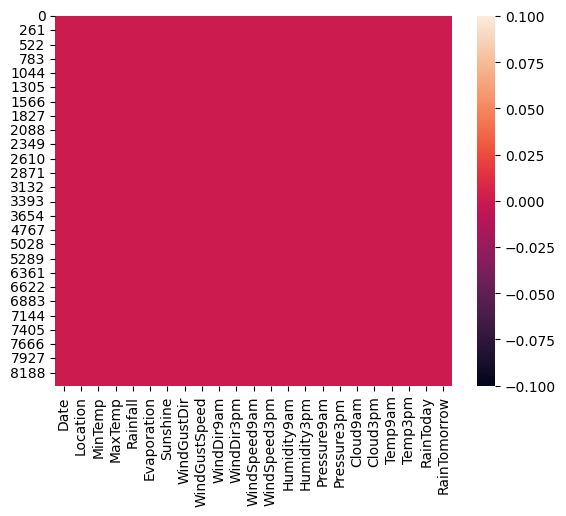

In [25]:
sns.heatmap(RFdf.isnull())

In [ ]:
#Now its confirmed that missing values has beem removed from the dataset 

In [ ]:
                        EXPLORATORY DATA ANALYSIS

<Axes: xlabel='RainToday', ylabel='count'>

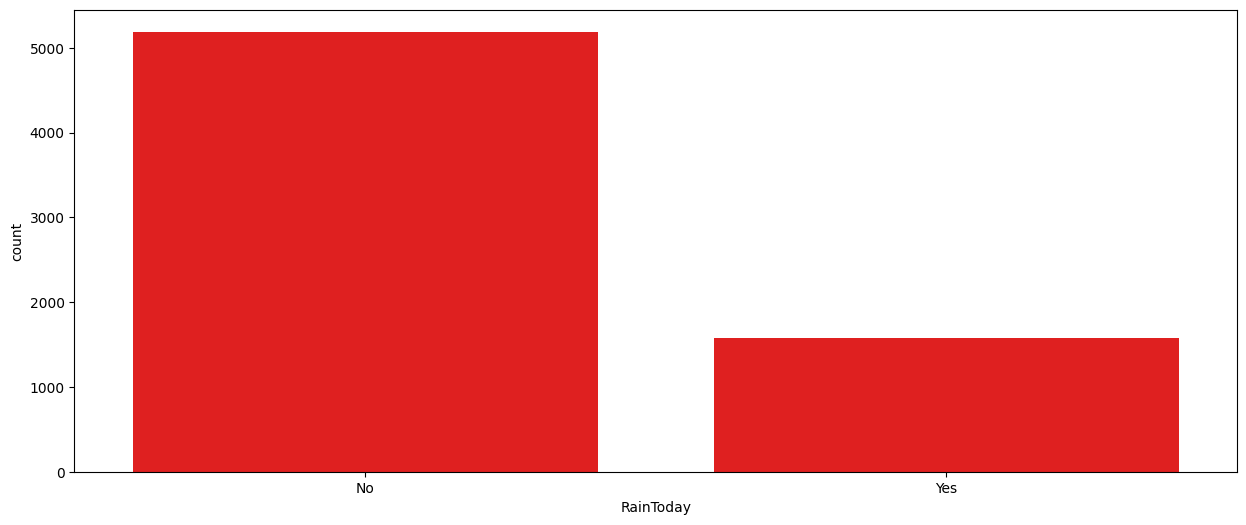

In [26]:
plt.figure (figsize=(15,6))
sns.countplot(x='RainToday',data=RFdf,color='red')

<Axes: xlabel='Location', ylabel='count'>

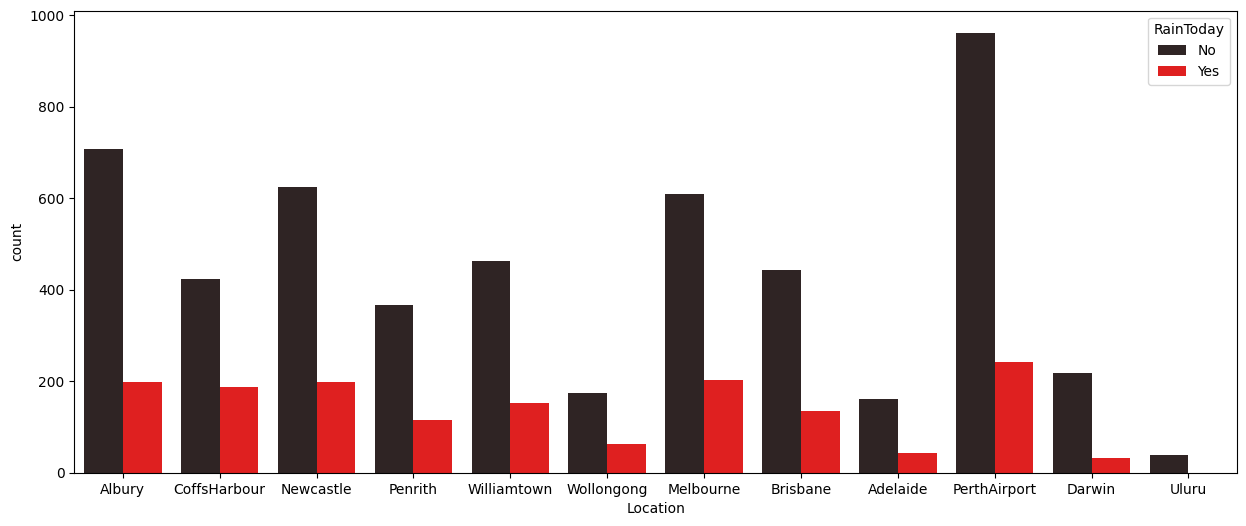

In [27]:
plt.figure (figsize=(15,6))
sns.countplot(x='Location',data=RFdf,hue='RainToday',color='red')

<Axes: xlabel='Location', ylabel='count'>

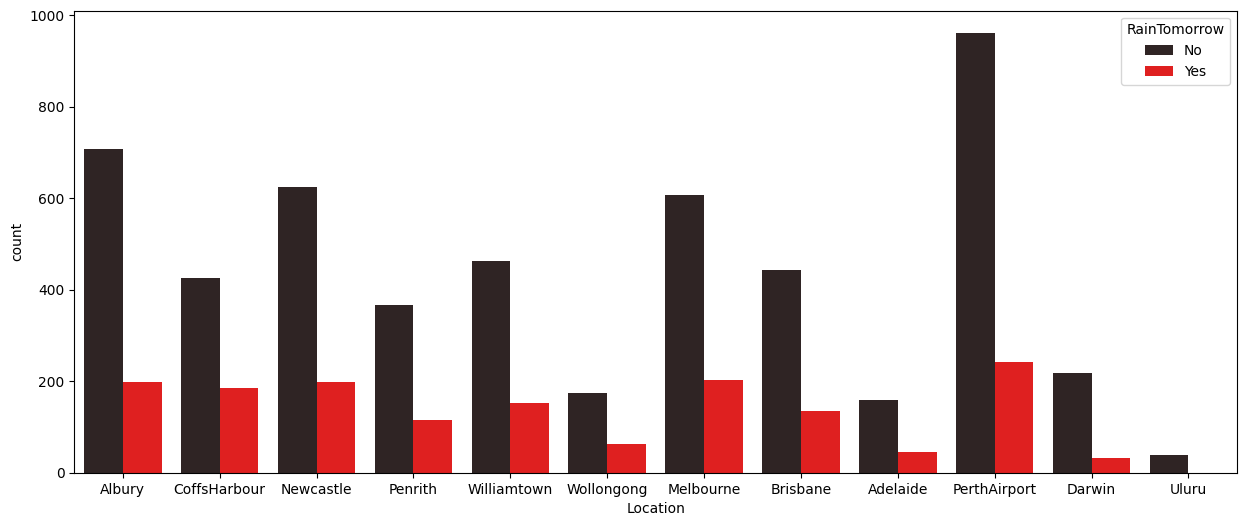

In [28]:
plt.figure (figsize=(15,6))
sns.countplot(x='Location',data=RFdf,hue='RainTomorrow',color='red')

<Axes: xlabel='RainTomorrow', ylabel='Location'>

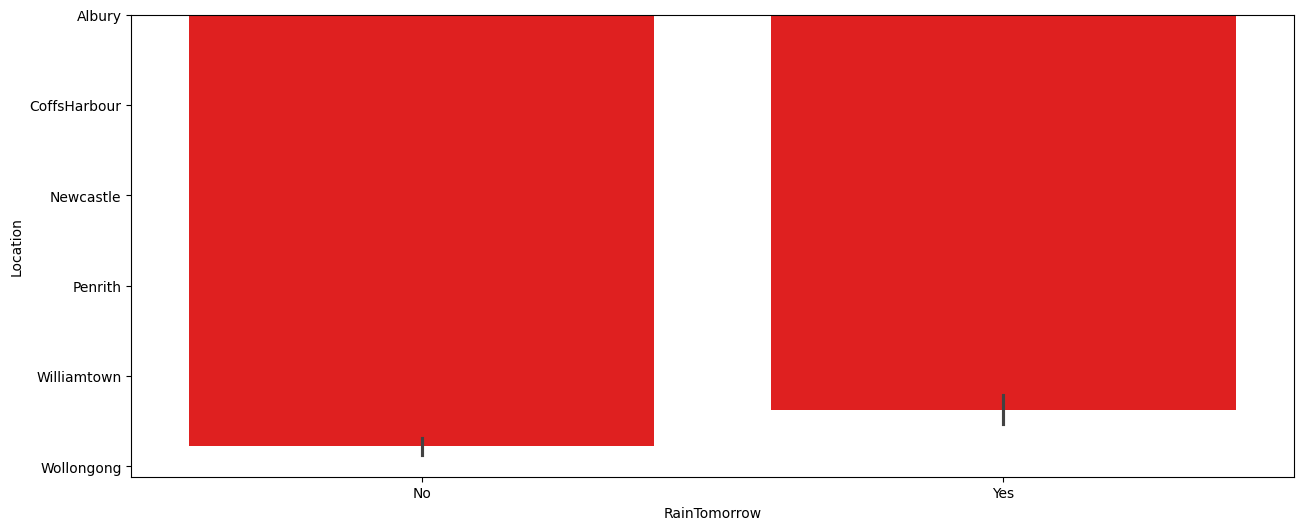

In [29]:
plt.figure (figsize=(15,6))
sns.barplot(x='RainTomorrow', y='Location',data=RFdf,color='red')

<Axes: xlabel='RainTomorrow', ylabel='MaxTemp'>

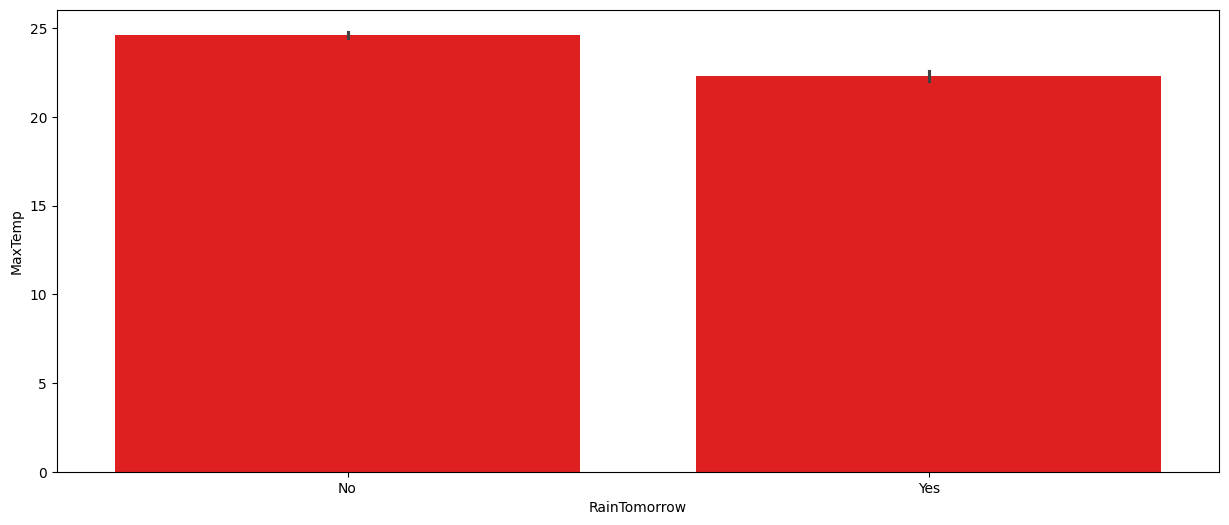

In [30]:
plt.figure (figsize=(15,6))
sns.barplot(x='RainTomorrow', y='MaxTemp',data=RFdf,color='red')

<Axes: xlabel='RainTomorrow', ylabel='MinTemp'>

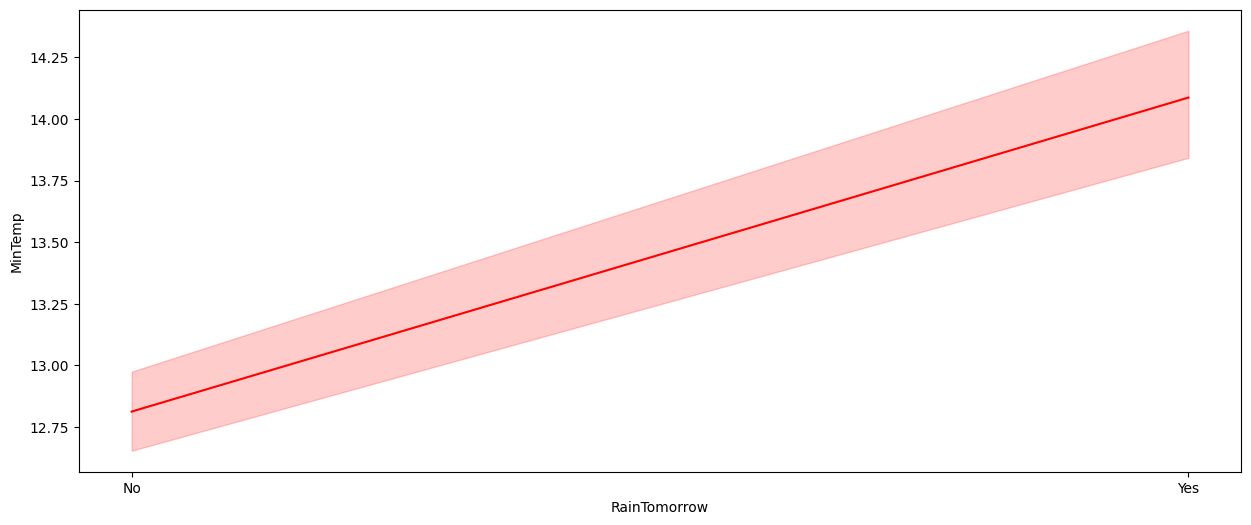

In [32]:
plt.figure (figsize=(15,6))
sns.lineplot(x='RainTomorrow',y='MinTemp',data=RFdf,color='red')

<Axes: xlabel='RainTomorrow', ylabel='MaxTemp'>

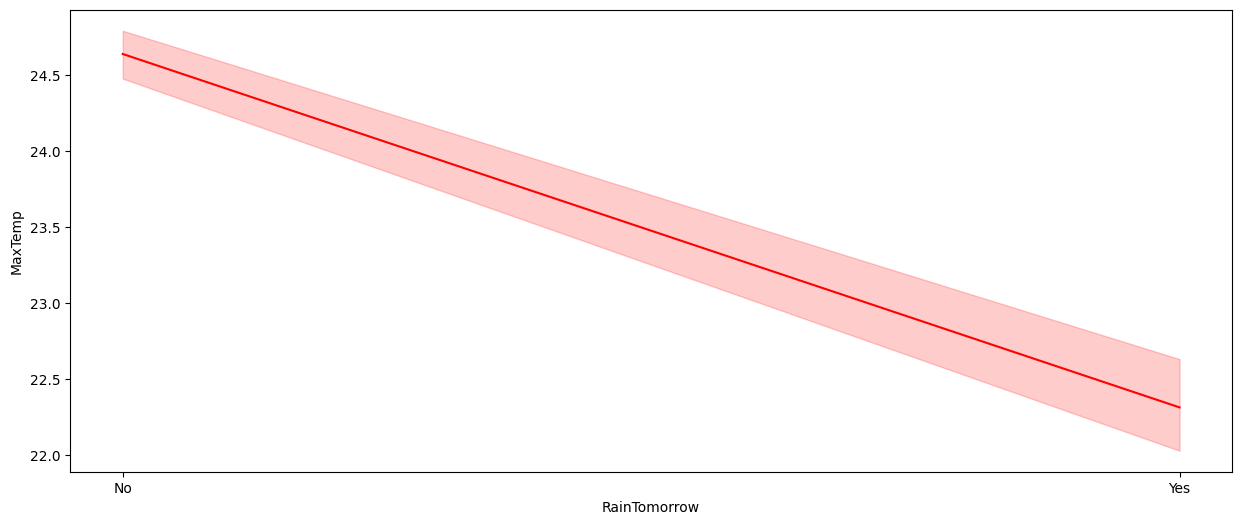

In [36]:
plt.figure (figsize=(15,6))
sns.lineplot(x='RainTomorrow',y='MaxTemp',data=RFdf,color='red')

<Axes: xlabel='RainTomorrow', ylabel='Evaporation'>

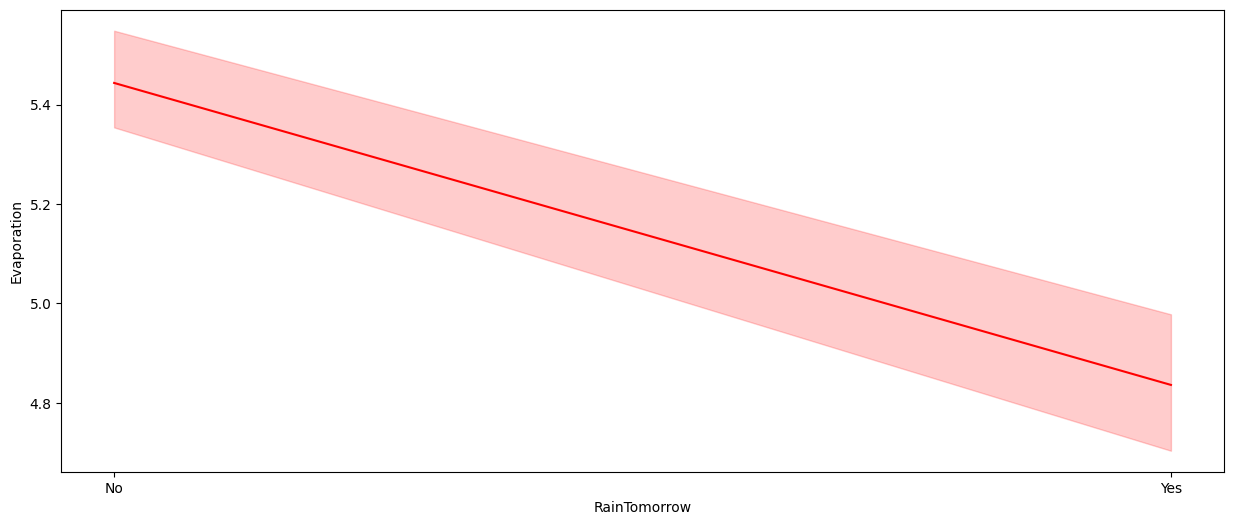

In [37]:
plt.figure (figsize=(15,6))
sns.lineplot(x='RainTomorrow',y='Evaporation',data=RFdf,color='red')

<Axes: xlabel='RainTomorrow', ylabel='Sunshine'>

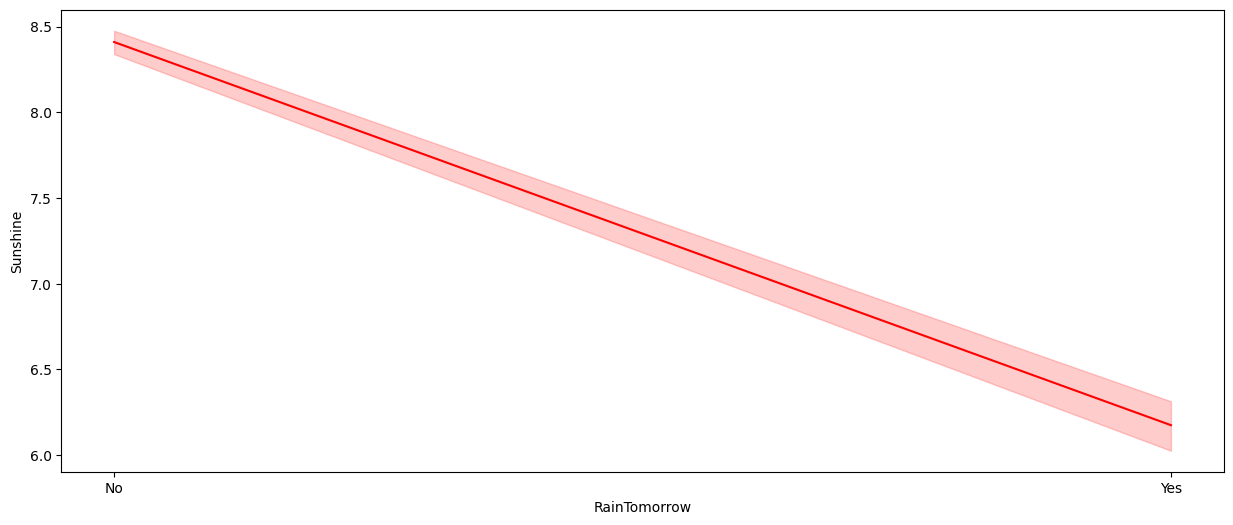

In [38]:
plt.figure (figsize=(15,6))
sns.lineplot(x='RainTomorrow',y='Sunshine',data=RFdf,color='red')

<Axes: xlabel='RainTomorrow', ylabel='Humidity9am'>

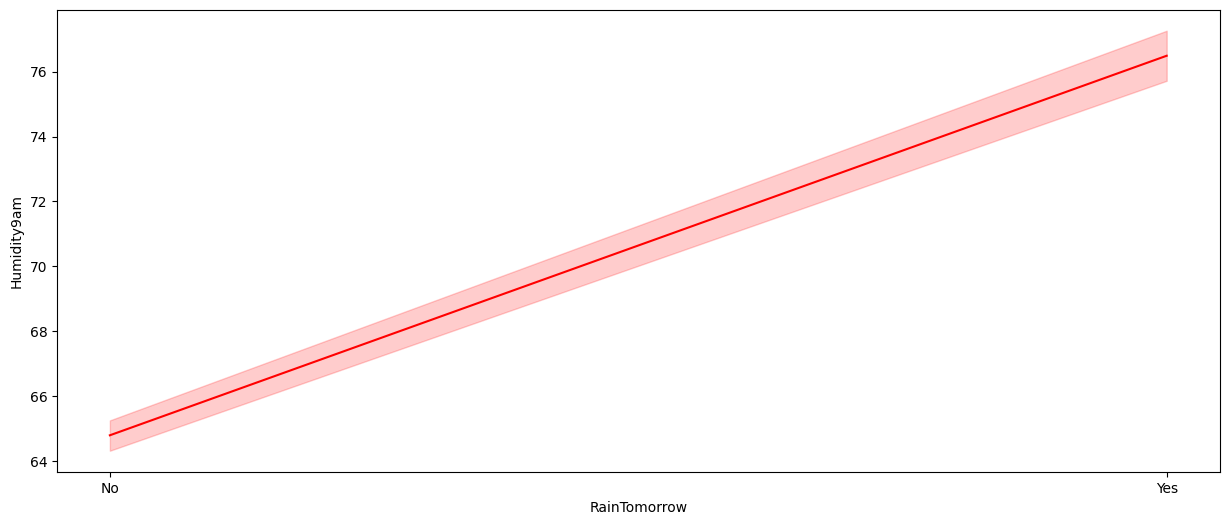

In [28]:
plt.figure (figsize=(15,6))
sns.lineplot(x='RainTomorrow',y='Humidity9am',data=RFdf,color='red')

<Axes: xlabel='RainTomorrow', ylabel='Humidity3pm'>

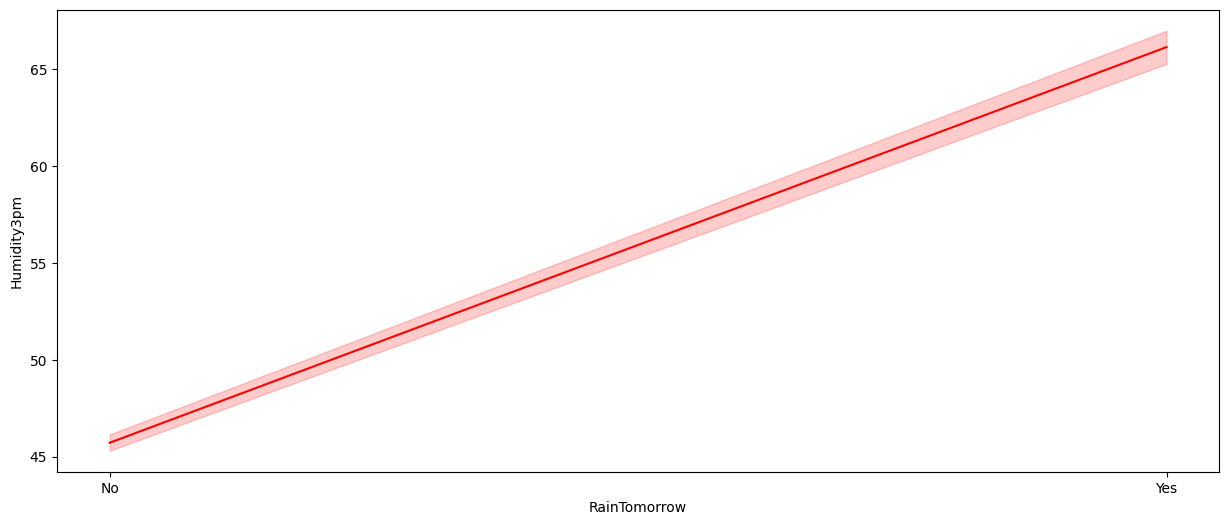

In [29]:
plt.figure (figsize=(15,6))
sns.lineplot(x='RainTomorrow',y='Humidity3pm',data=RFdf,color='red')

<Axes: xlabel='RainTomorrow', ylabel='Cloud9am'>

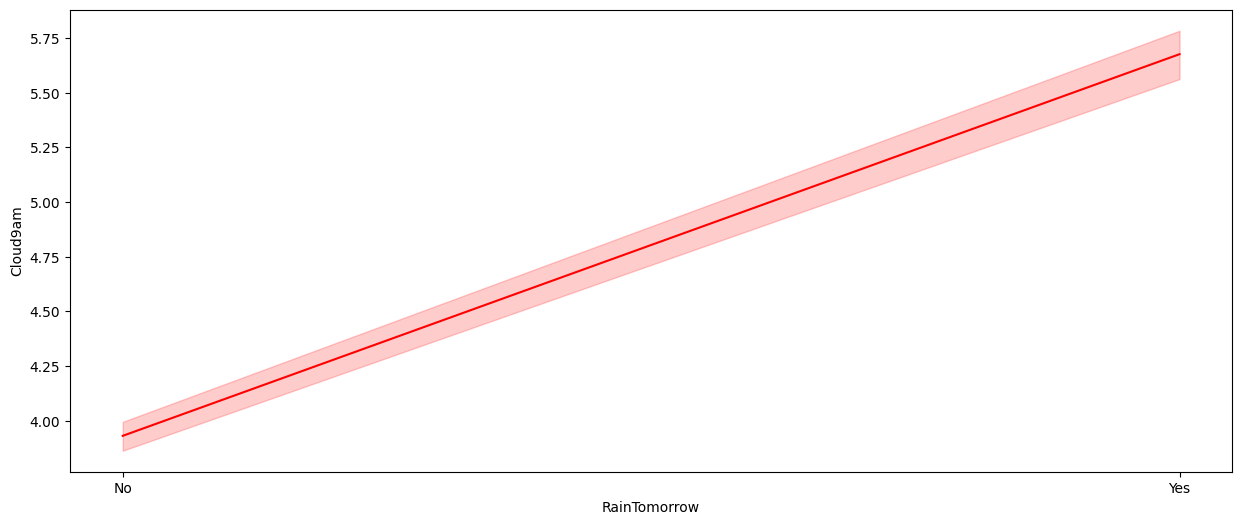

In [32]:
plt.figure (figsize=(15,6))
sns.lineplot(x='RainTomorrow',y='Cloud9am',data=RFdf,color='red')

<Axes: xlabel='RainTomorrow', ylabel='Cloud3pm'>

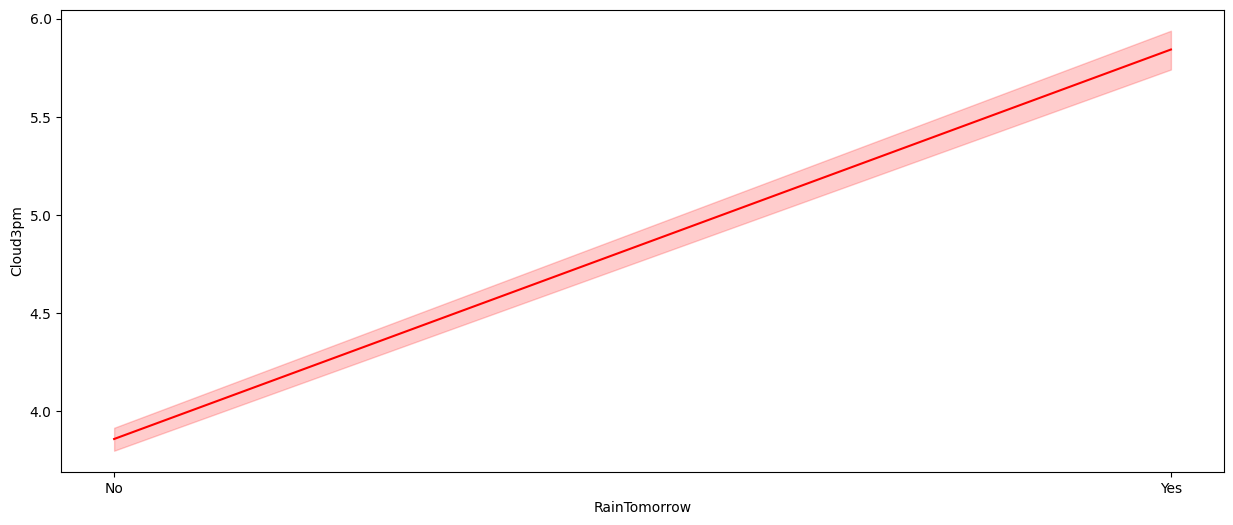

In [33]:
plt.figure (figsize=(15,6))
sns.lineplot(x='RainTomorrow',y='Cloud3pm',data=RFdf,color='red')

<Axes: xlabel='RainTomorrow', ylabel='Sunshine'>

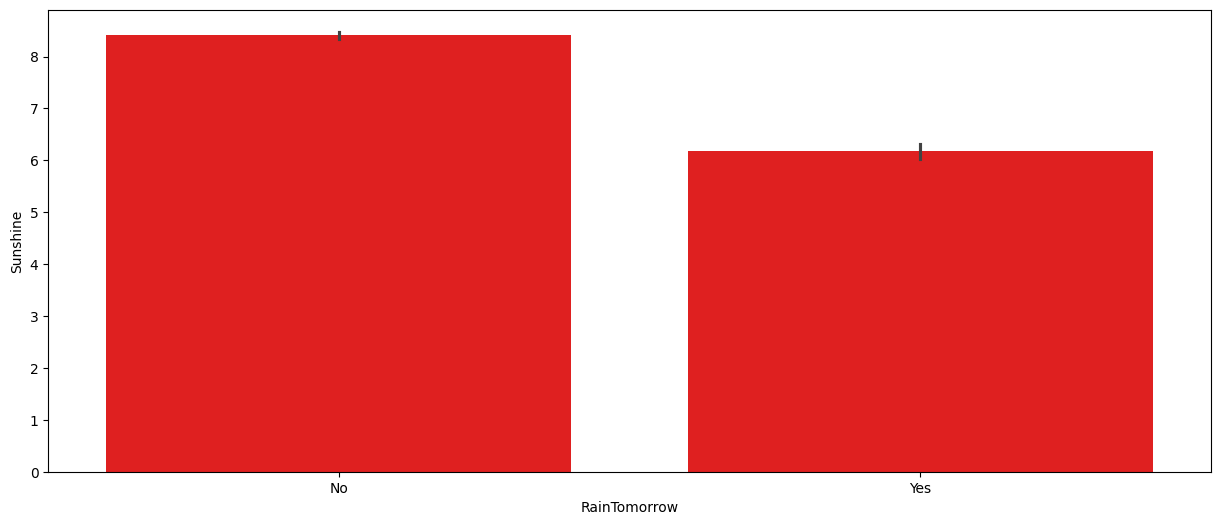

In [40]:
plt.figure (figsize=(15,6))
sns.barplot(x='RainTomorrow',y='Sunshine',data=RFdf,color='red')

<Axes: xlabel='RainTomorrow', ylabel='Sunshine'>

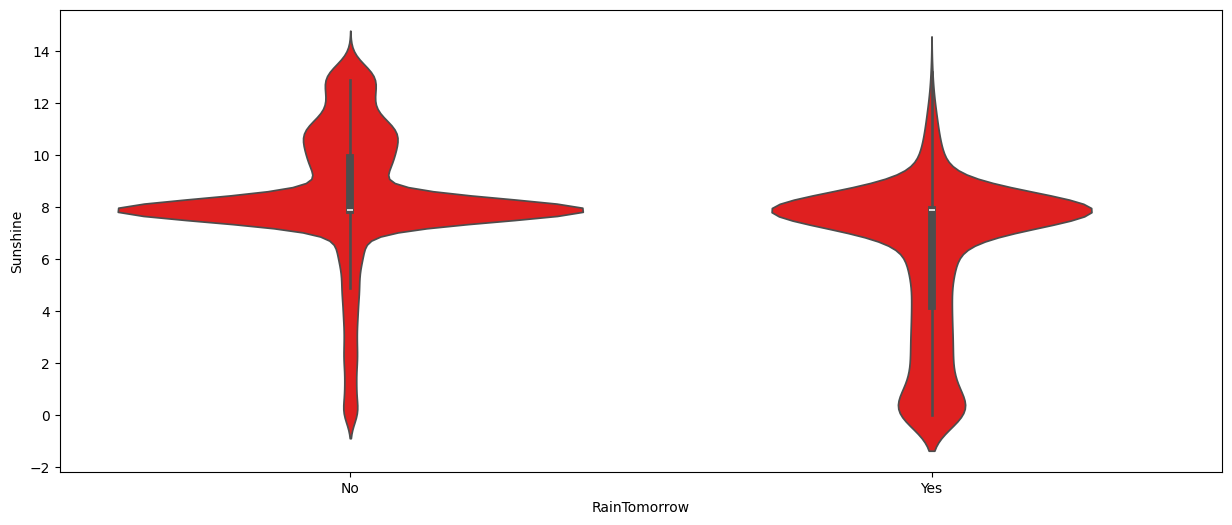

In [41]:
plt.figure (figsize=(15,6))
sns.violinplot(x='RainTomorrow',y='Sunshine',data=RFdf,color='red')

<Axes: xlabel='WindGustDir', ylabel='count'>

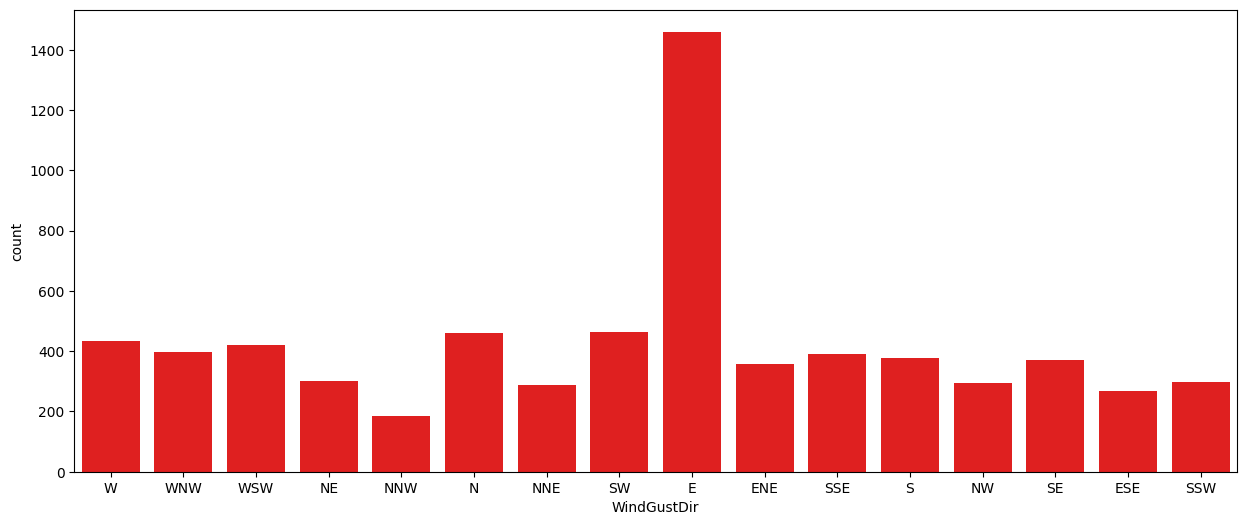

In [46]:
plt.figure (figsize=(15,6))
sns.countplot(x='WindGustDir',data=RFdf,color='red')

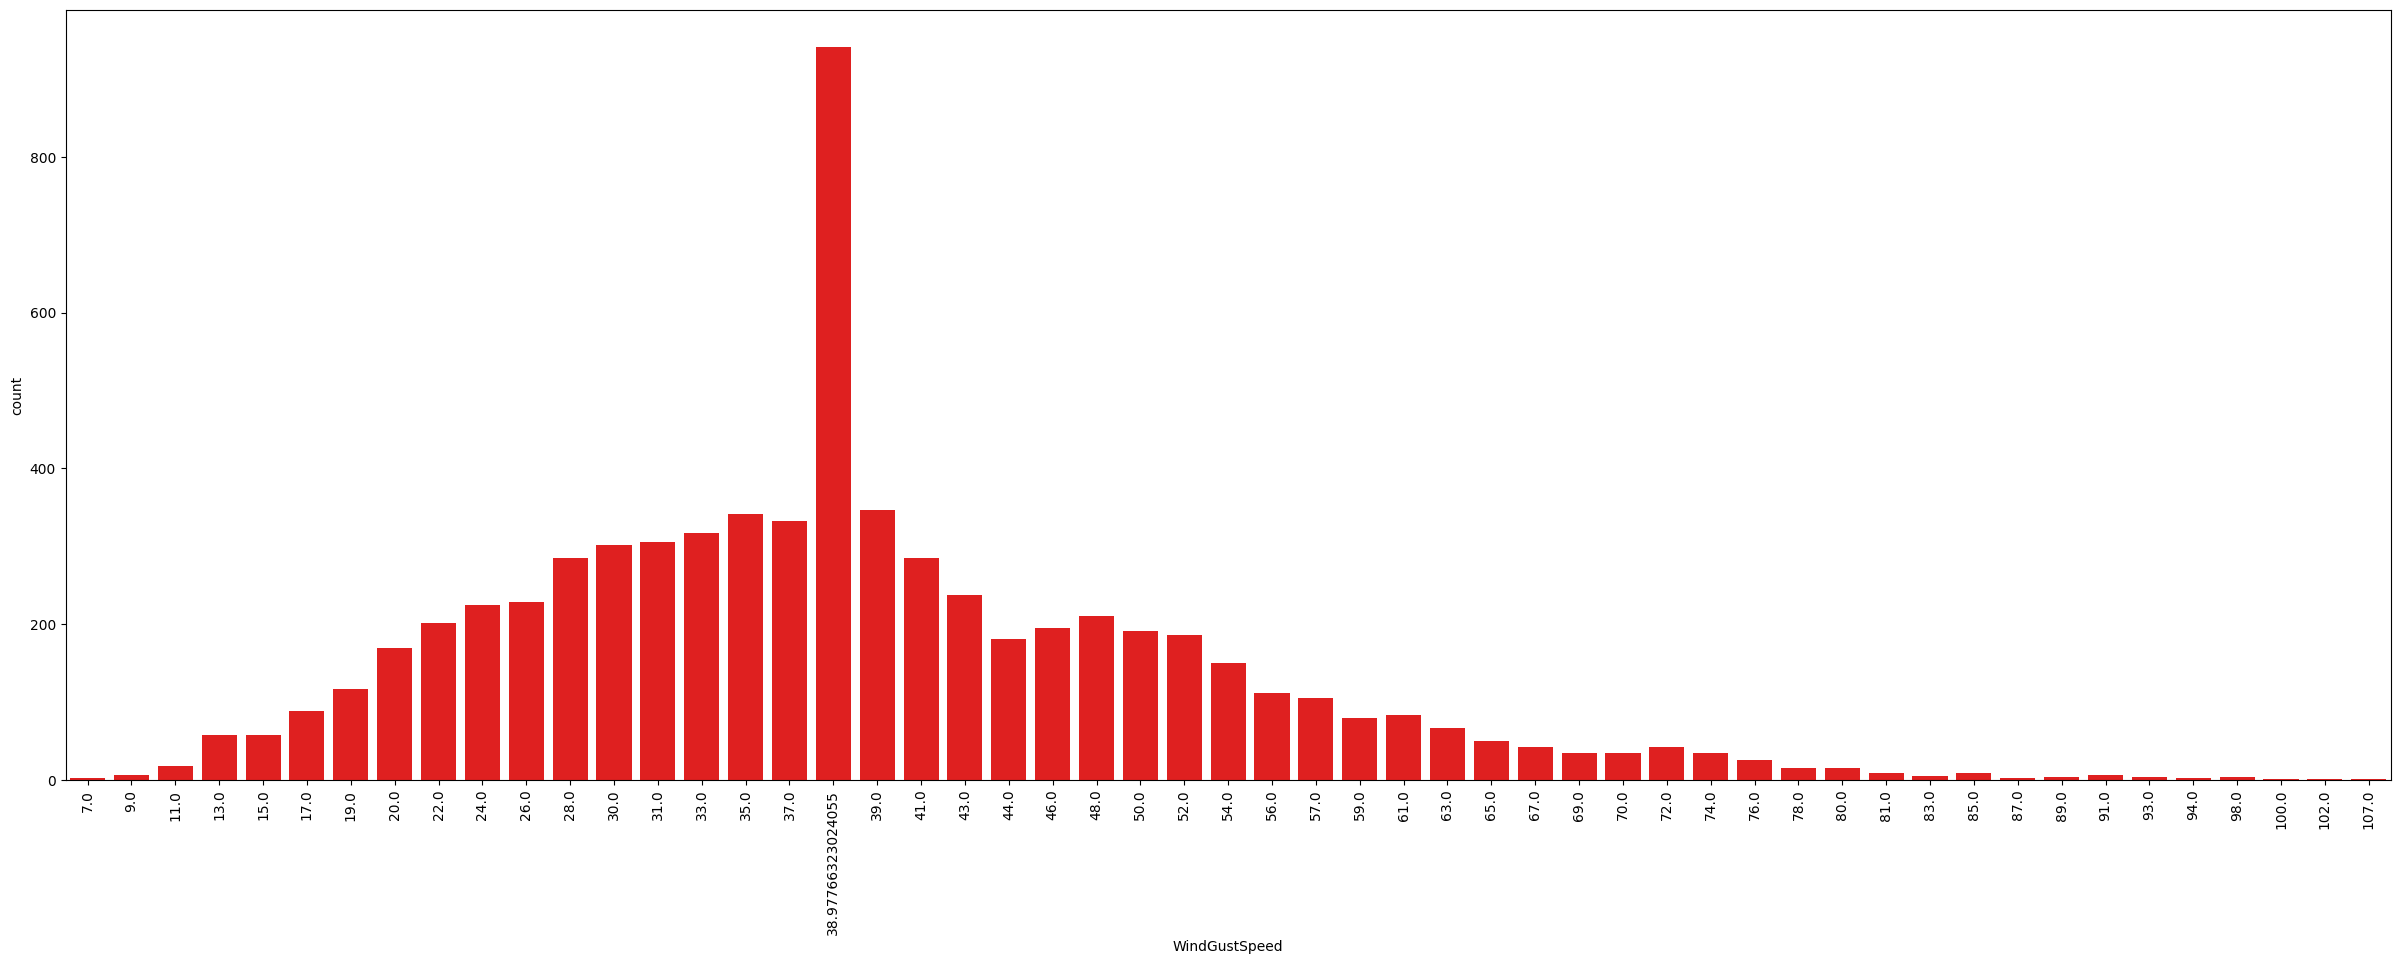

In [52]:
plt.figure (figsize=(30,10))
sns.countplot(x='WindGustSpeed',data=RFdf,color='red')
plt.xticks(rotation=90)
plt.show()

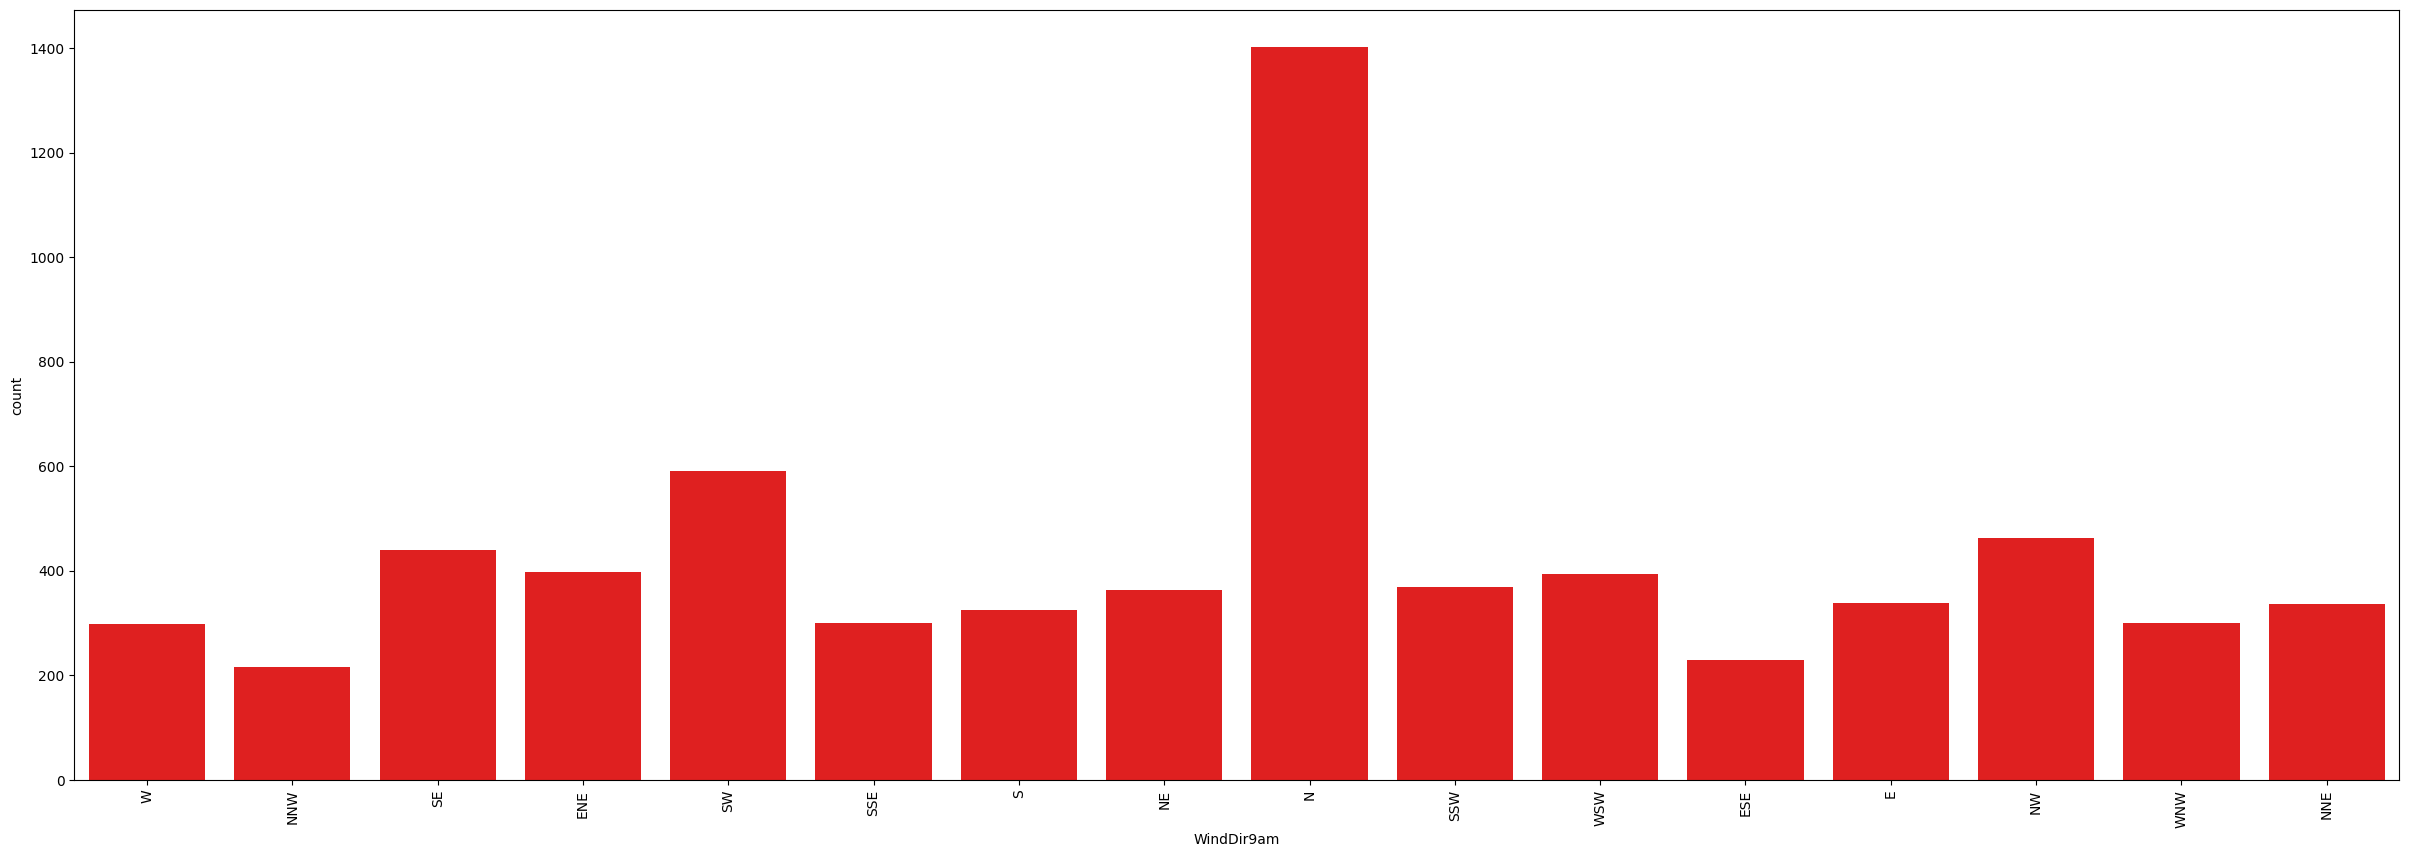

In [54]:
plt.figure (figsize=(30,10))
sns.countplot(x='WindDir9am',data=RFdf,color='red')
plt.xticks(rotation=90)
plt.show()

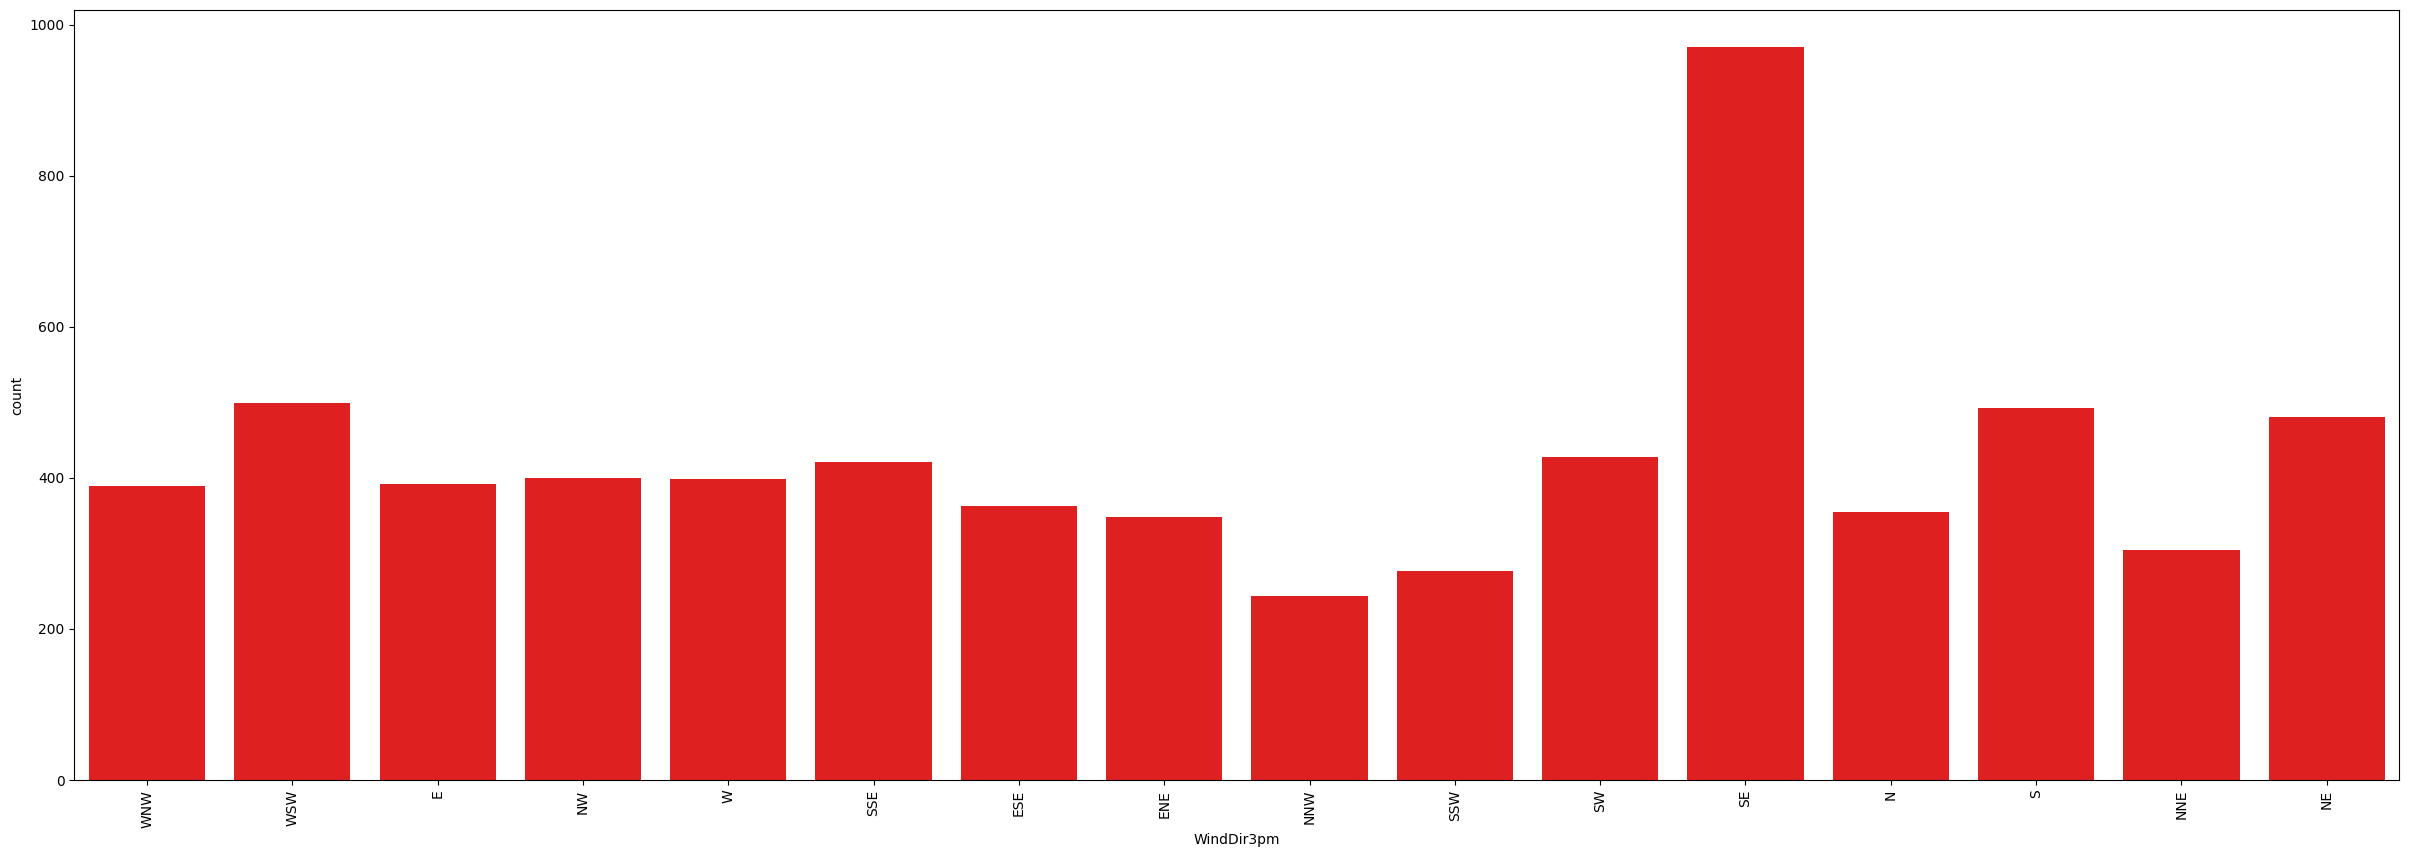

In [33]:
plt.figure (figsize=(30,10))
sns.countplot(x='WindDir3pm',data=RFdf,color='red')
plt.xticks(rotation=90)
plt.show()

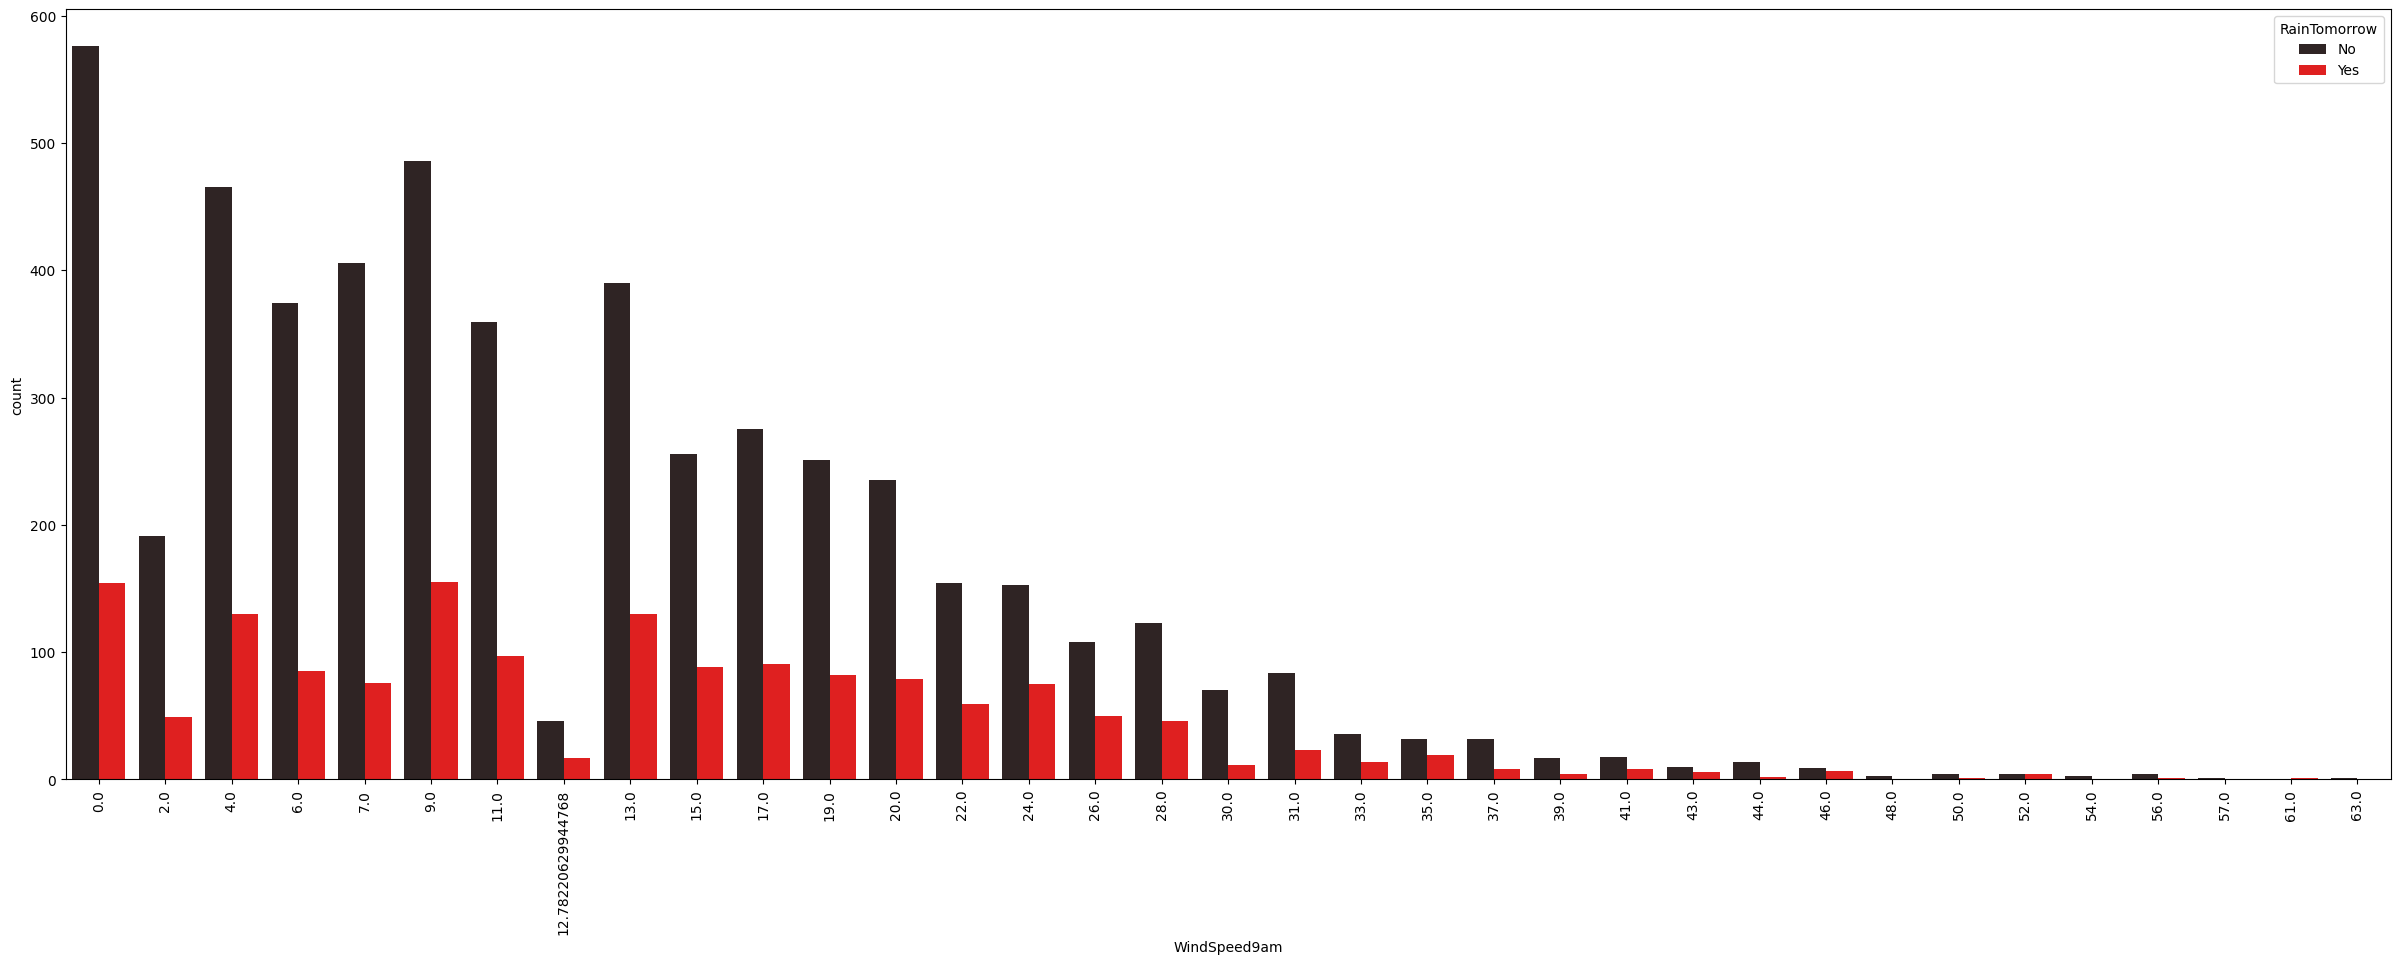

In [58]:
plt.figure (figsize=(30,10))
sns.countplot(x='WindSpeed9am',hue='RainTomorrow',data=RFdf,color='red')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Here from the above observation we conclude that  averaged over 10 minutes prior to 9am  in the morning most freqently the wind speed is nearly zero km/hr

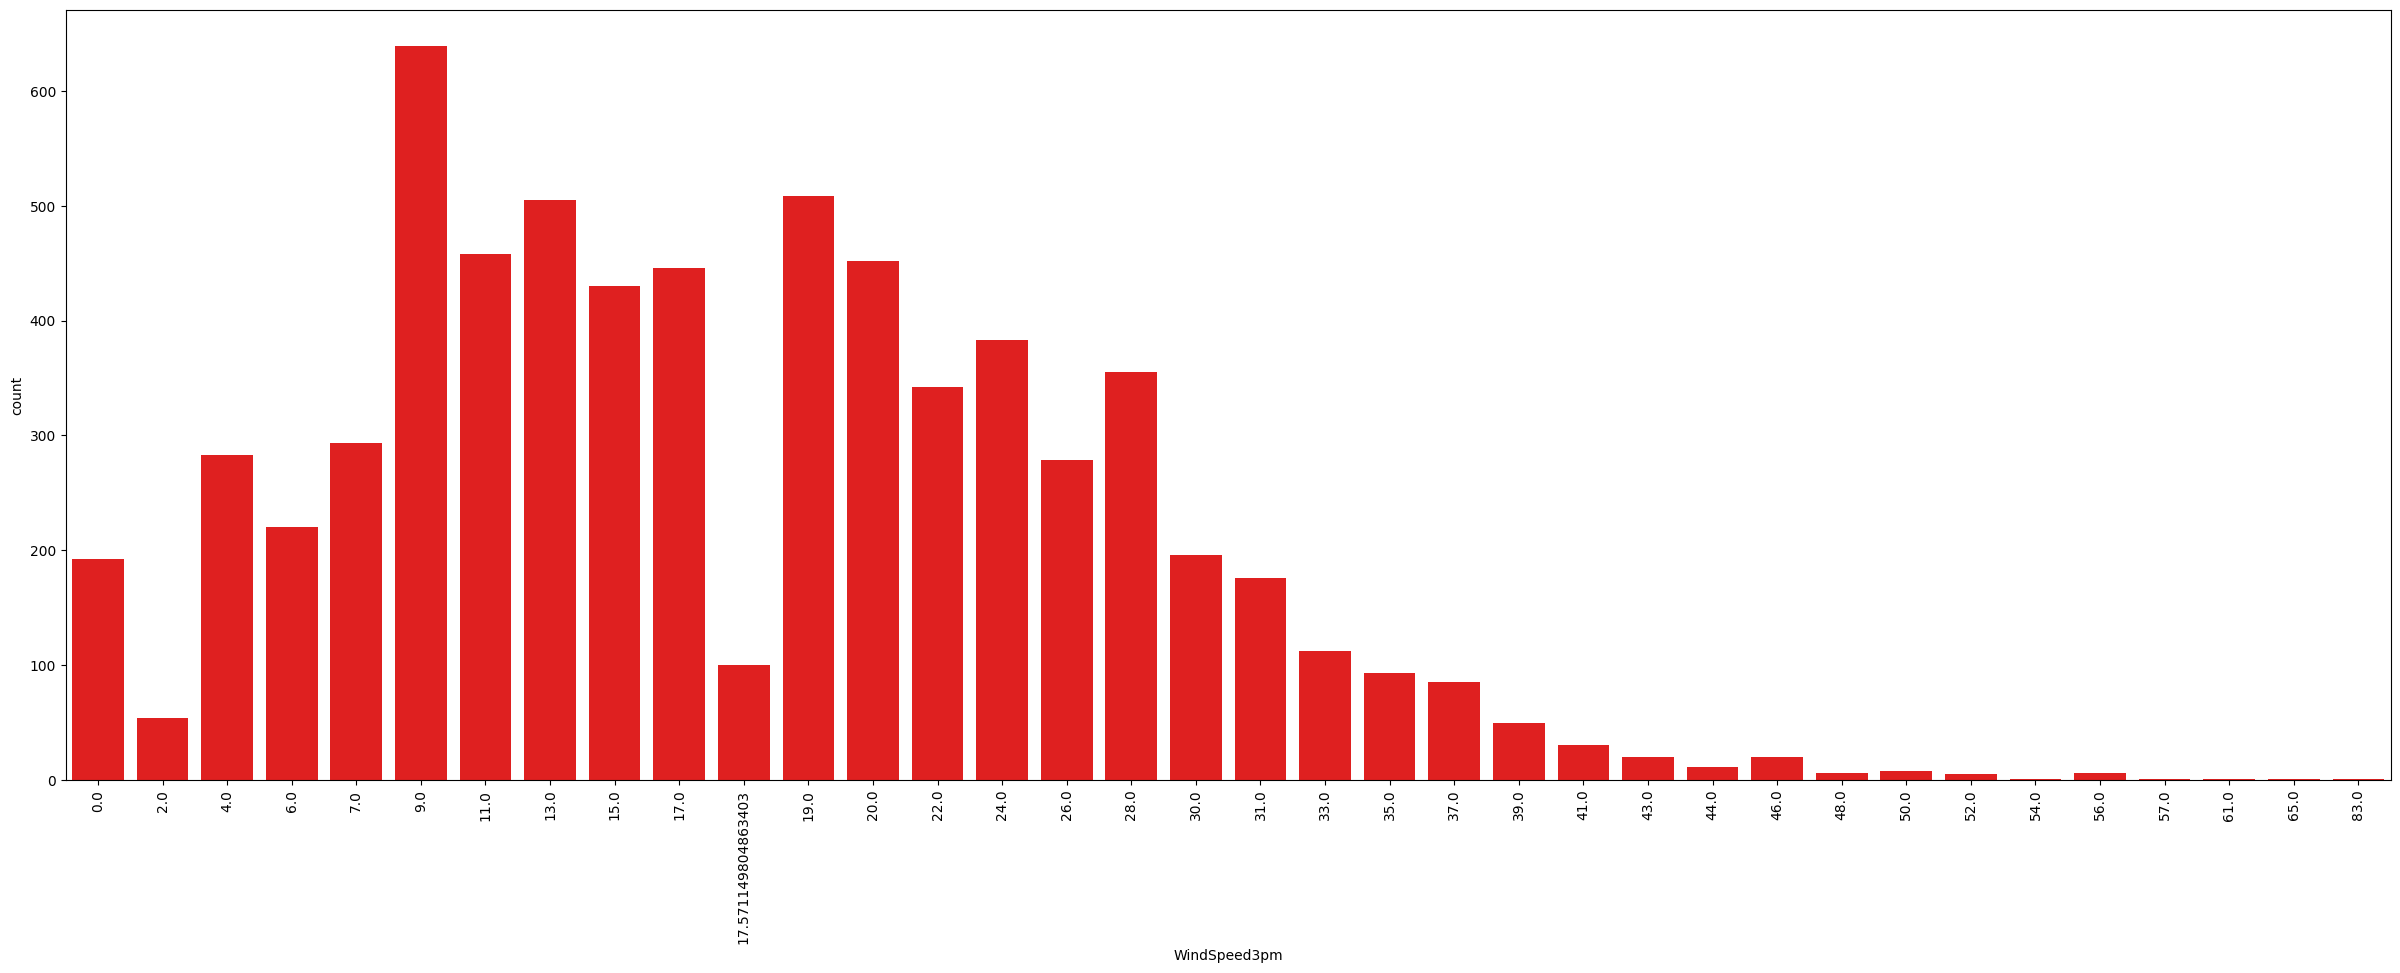

In [59]:
plt.figure (figsize=(30,10))
sns.countplot(x='WindSpeed3pm',data=RFdf,color='red')
plt.xticks(rotation=90)
plt.show()

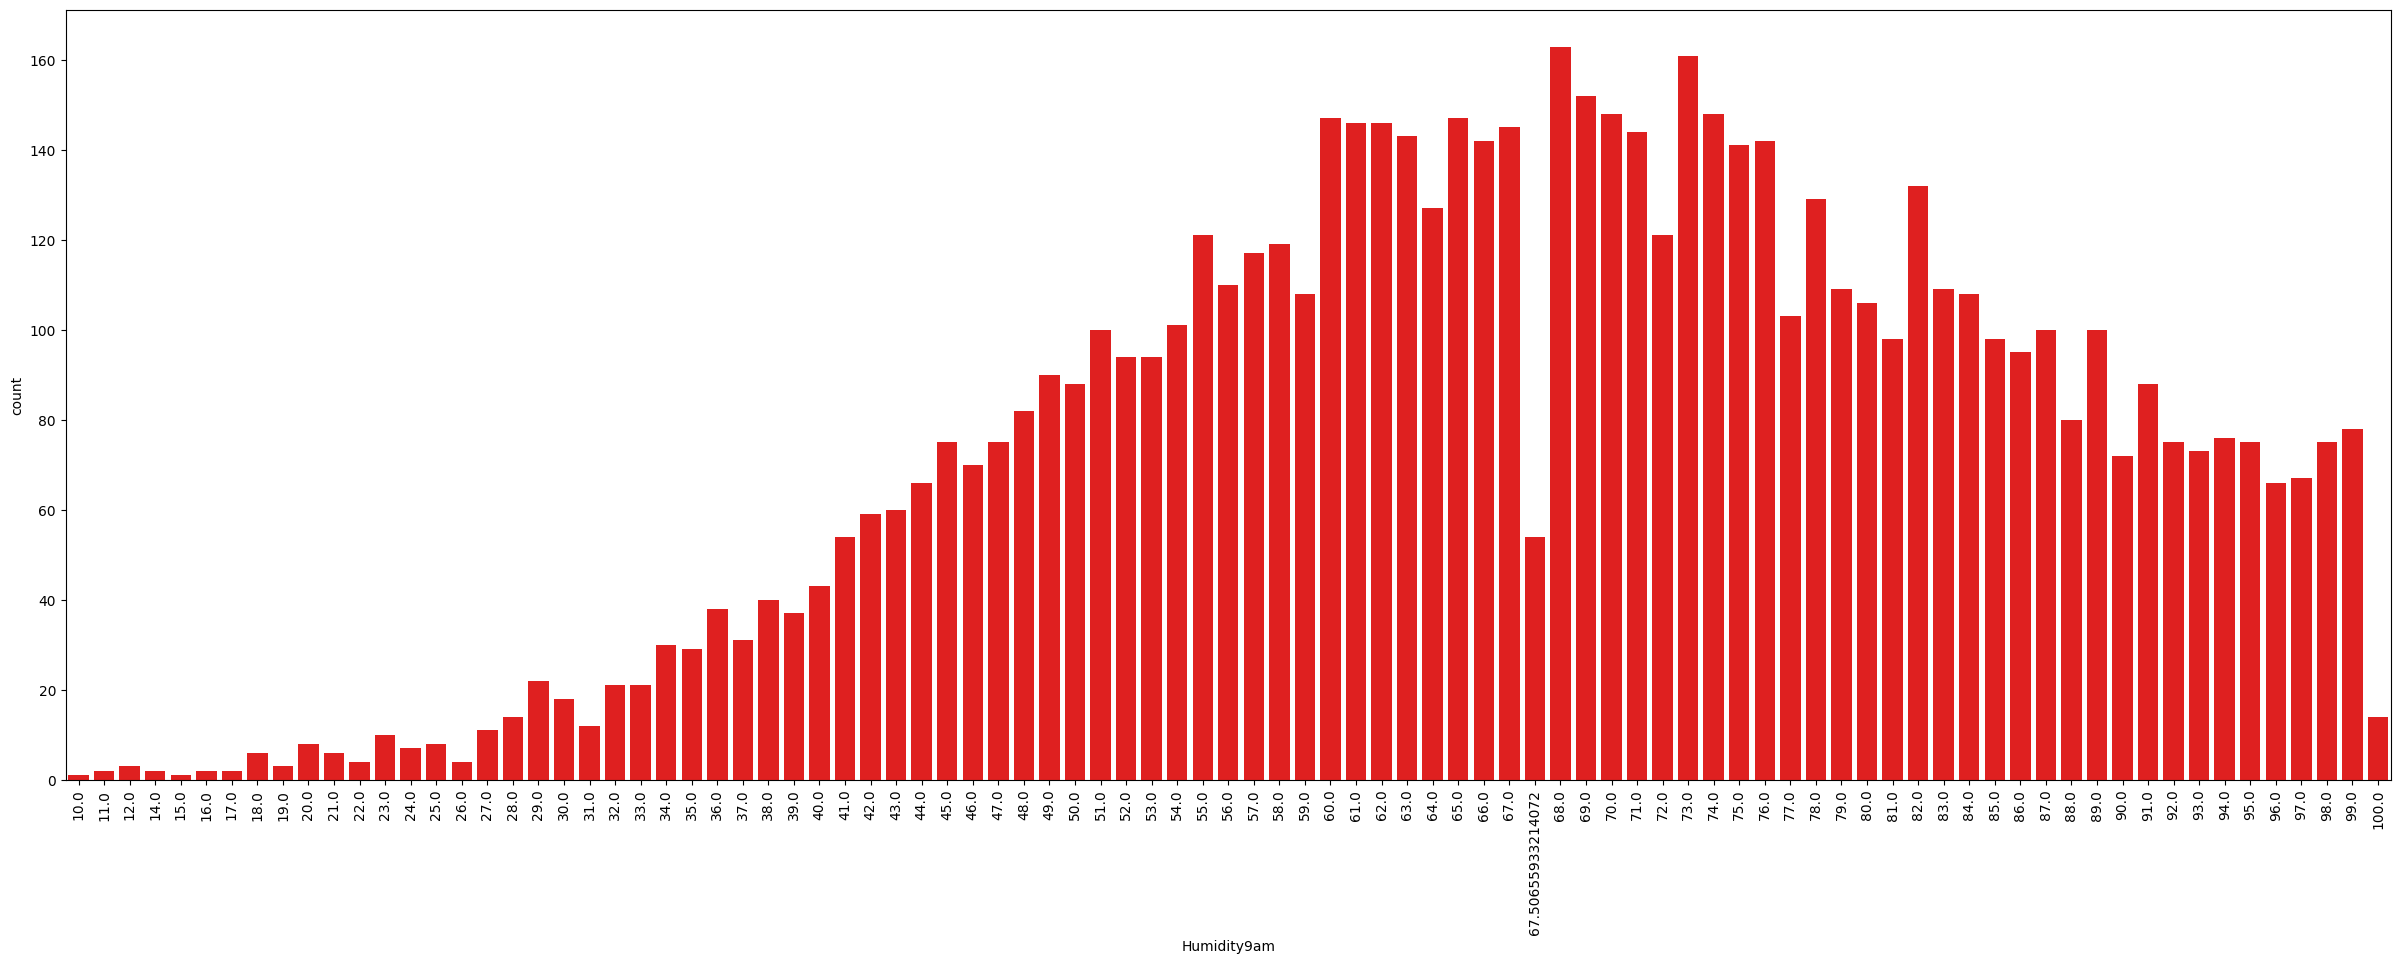

In [60]:
plt.figure (figsize=(30,10))
sns.countplot(x='Humidity9am',data=RFdf,color='red')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Here from the above observation we checked that at 9 am the maximum frquent humidity is 68%

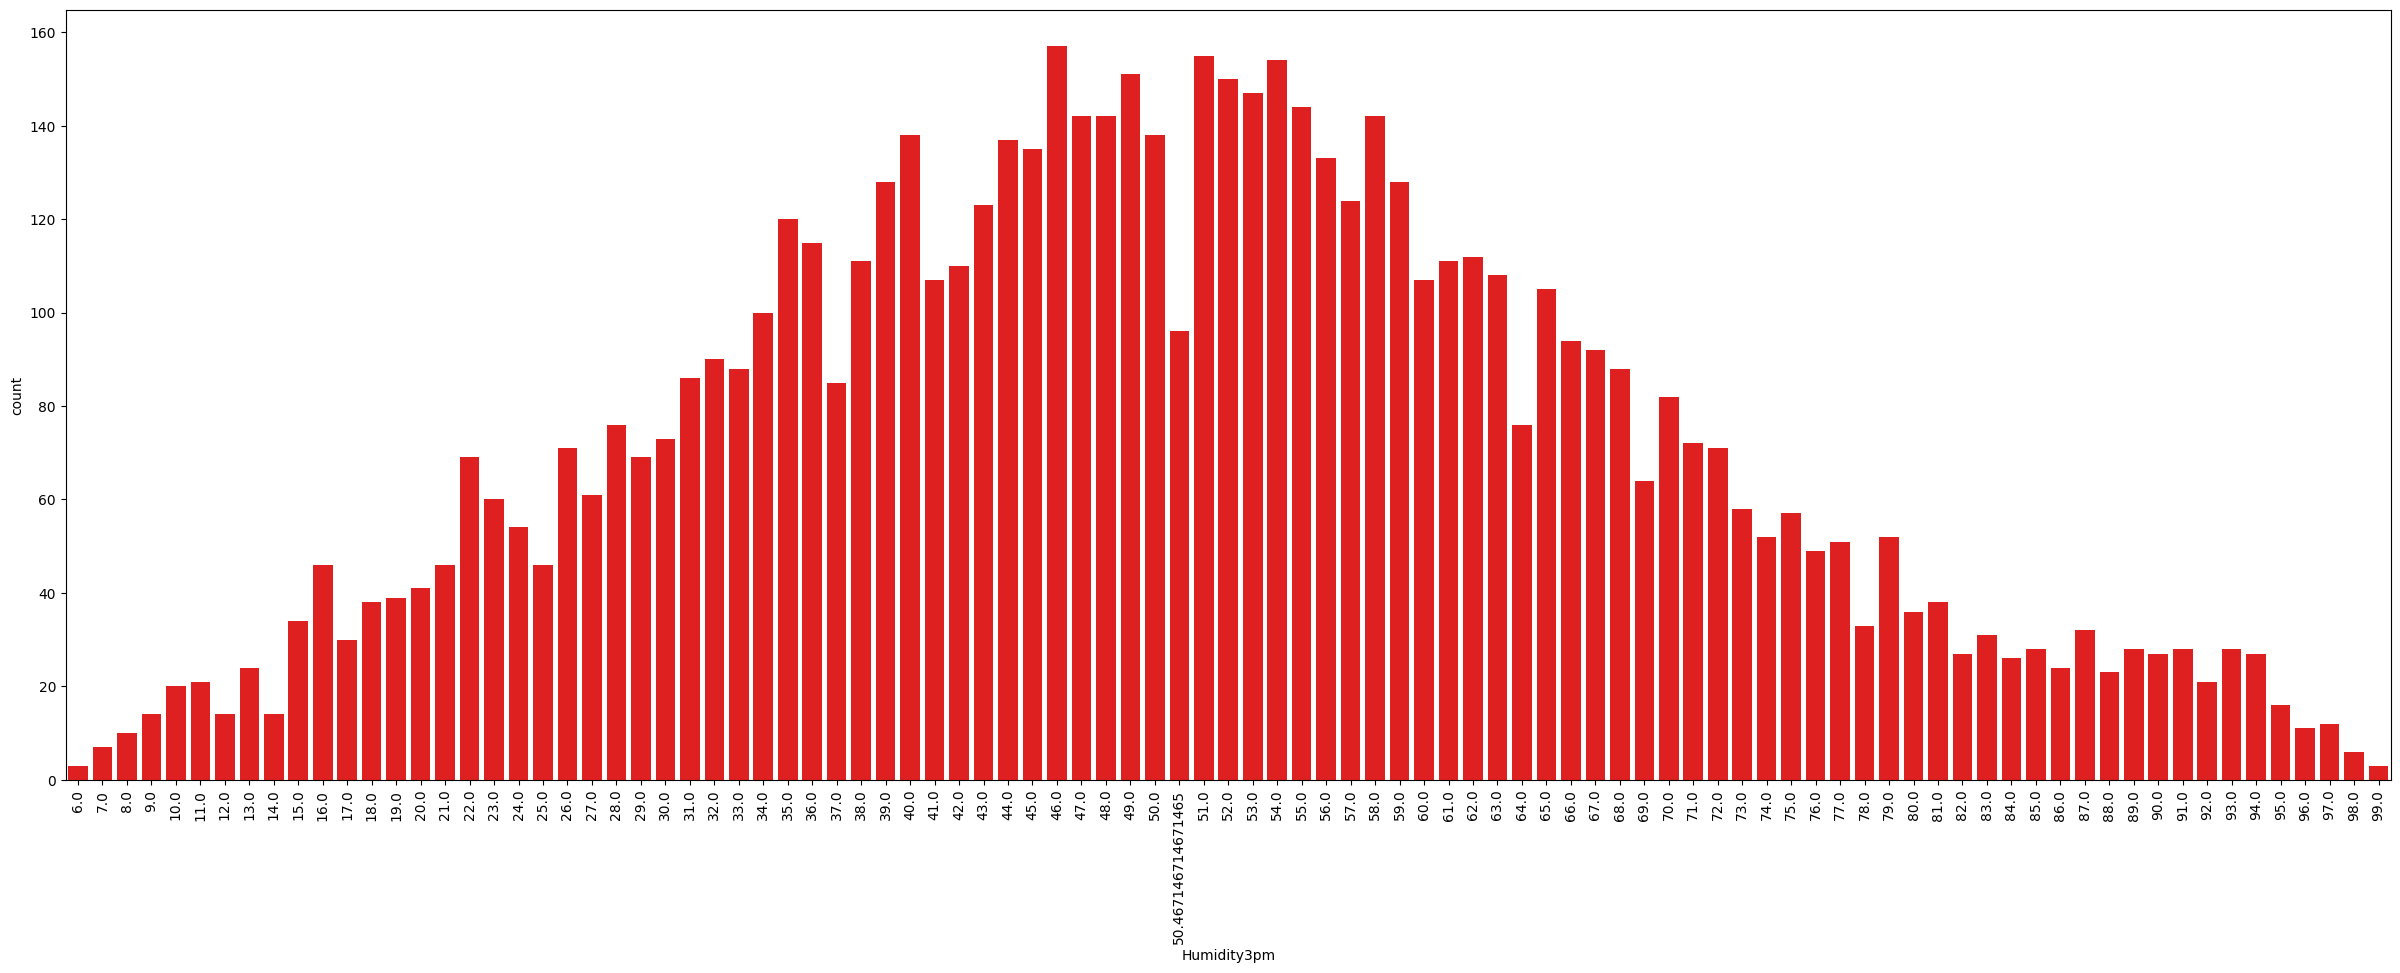

In [61]:
plt.figure (figsize=(30,10))
sns.countplot(x='Humidity3pm',data=RFdf,color='red')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Here from the above observation we checked that at 3 pm  the maximum frquent humidity is 46%

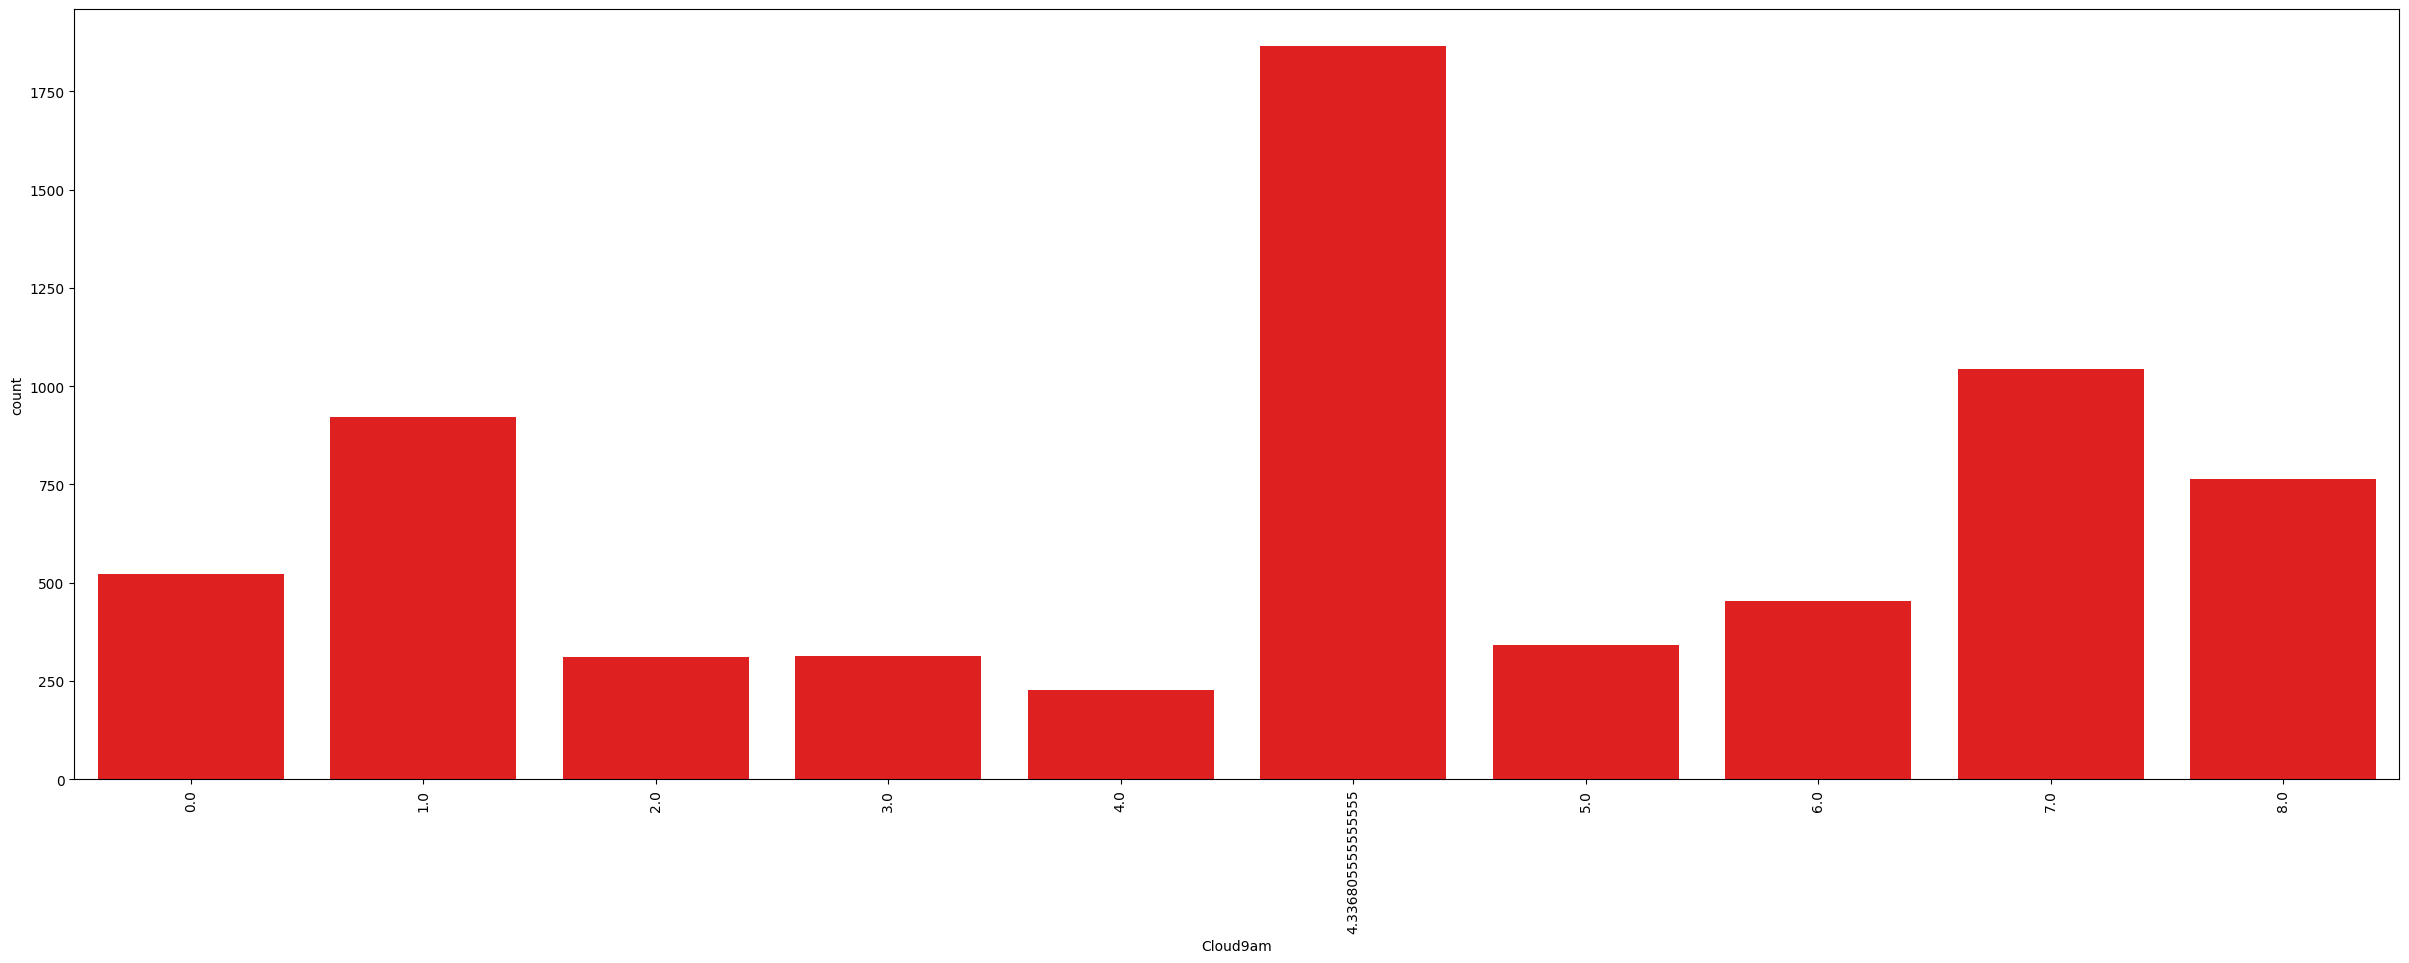

In [71]:
plt.figure (figsize=(30,10))
sns.countplot(x='Cloud9am',data=RFdf,color='red')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Here from the above observation we comclude that at 9 am the the most frequent fraction obscured by the cloud is 4.33%

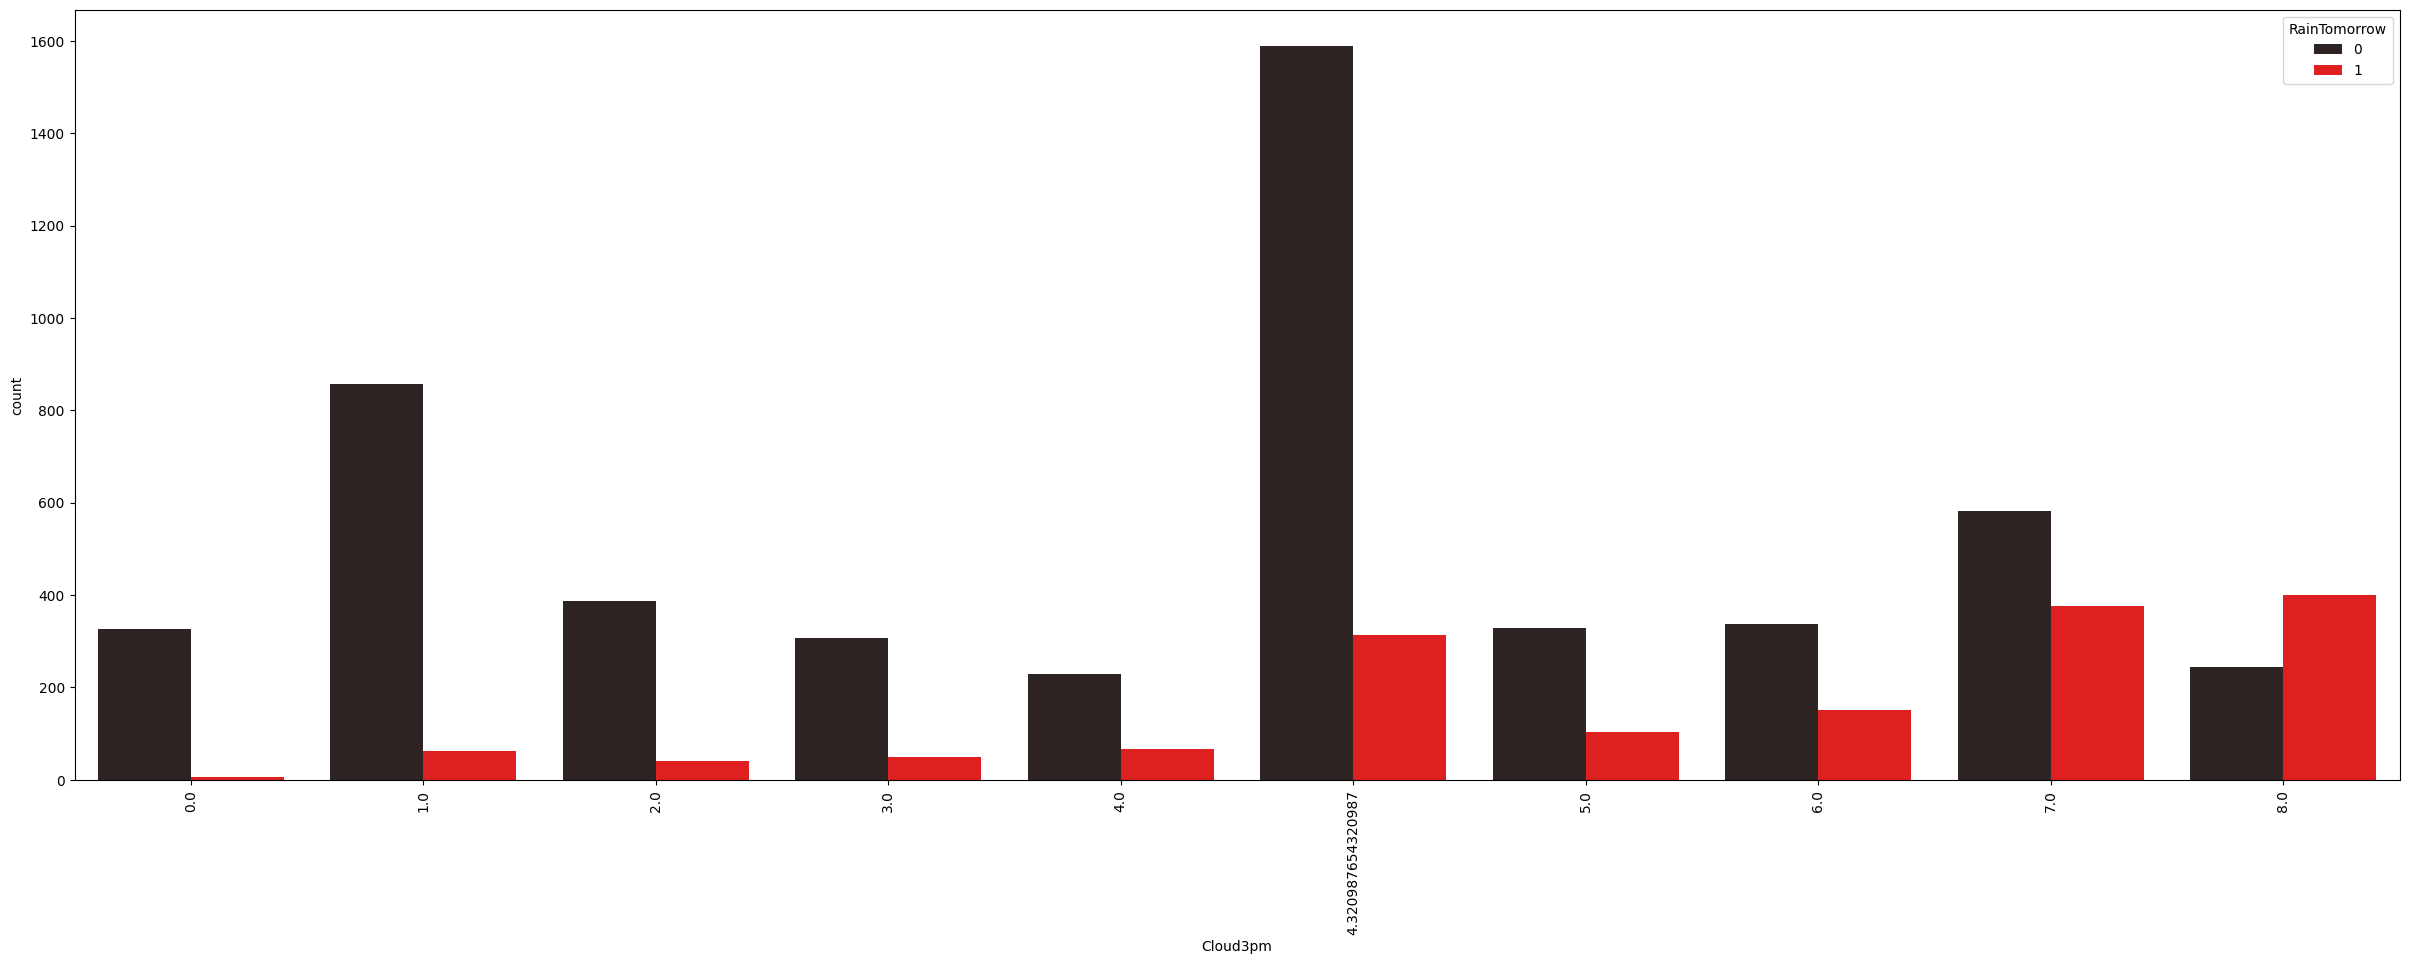

In [93]:
plt.figure (figsize=(30,10))
sns.countplot(x='Cloud3pm',data=RFdf,hue='RainTomorrow',color='red')
plt.xticks(rotation=90)
plt.show()

In [ ]:
                                PERFORMING ENCODING OF THE CATEGORICAL FEATURES

In [34]:
le=LabelEncoder()
for col in categorical:
    RFdf[col]=le.fit_transform(RFdf[col])

In [35]:
RFdf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,13.4,22.900000,0.6,5.302395,7.890896,13,44.000000,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0,0
1,2008-12-02,1,7.4,25.100000,0.0,5.302395,7.890896,14,44.000000,6,...,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0,0
2,2008-12-03,1,12.9,25.700000,0.0,5.302395,7.890896,15,46.000000,13,...,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0,0
3,2008-12-04,1,9.2,28.000000,0.0,5.302395,7.890896,4,24.000000,9,...,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0,0
4,2008-12-05,1,17.5,32.300000,1.0,5.302395,7.890896,13,41.000000,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9,2.8,23.400000,0.0,5.302395,7.890896,0,31.000000,9,...,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,0,0
8421,2017-06-22,9,3.6,25.300000,0.0,5.302395,7.890896,6,22.000000,9,...,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,0,0
8422,2017-06-23,9,5.4,26.900000,0.0,5.302395,7.890896,3,37.000000,9,...,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,0,0
8423,2017-06-24,9,7.8,27.000000,0.0,5.302395,7.890896,9,28.000000,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [36]:
correlation=RFdf.corr()

In [37]:
correlation['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.466835
Cloud3pm         0.360511
RainToday        0.323691
Cloud9am         0.297967
Humidity9am      0.287774
Rainfall         0.224213
WindGustSpeed    0.184435
MinTemp          0.097146
WindSpeed9am     0.057939
WindGustDir      0.045179
WindSpeed3pm     0.043409
WindDir9am       0.040399
WindDir3pm       0.004301
Location        -0.004506
Date            -0.015356
Temp9am         -0.025788
Evaporation     -0.076733
Pressure3pm     -0.131759
Pressure9am     -0.159103
MaxTemp         -0.160318
Temp3pm         -0.202987
Sunshine        -0.345509
Name: RainTomorrow, dtype: float64

<Axes: >

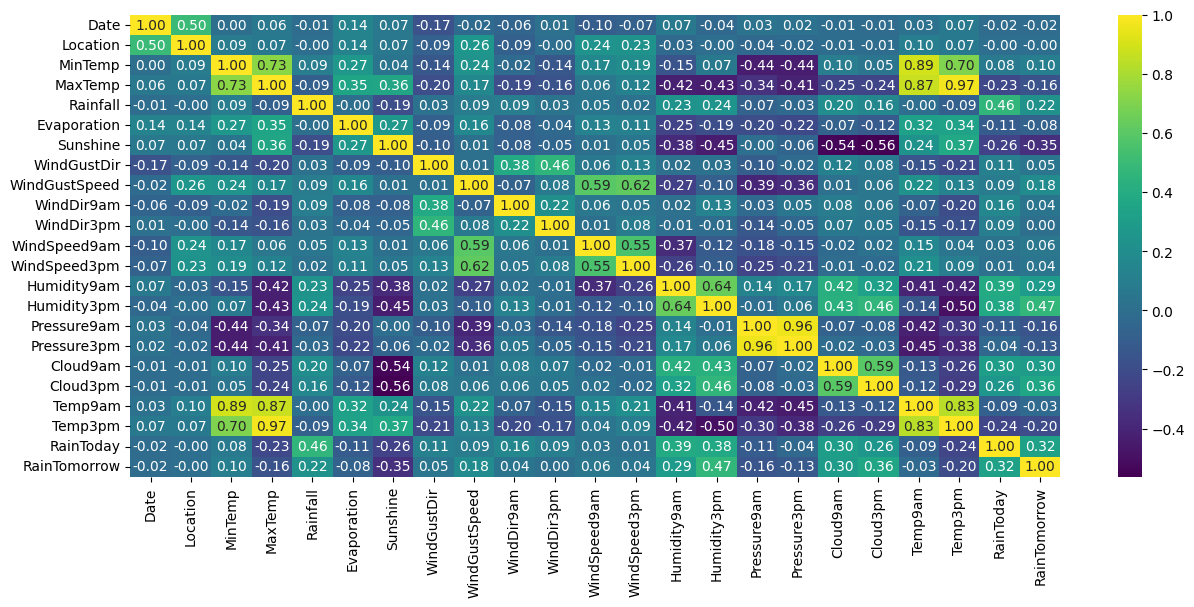

In [38]:
plt.figure(figsize=(15,6))
sns.heatmap(correlation,annot=True,cmap='viridis',fmt='.2f')

In [ ]:
# from the above correlation matrix temp3pm is highy correlated so we are dropping that feature 

In [39]:
RFdf.drop('Temp3pm',axis=1,inplace =True)

<Axes: >

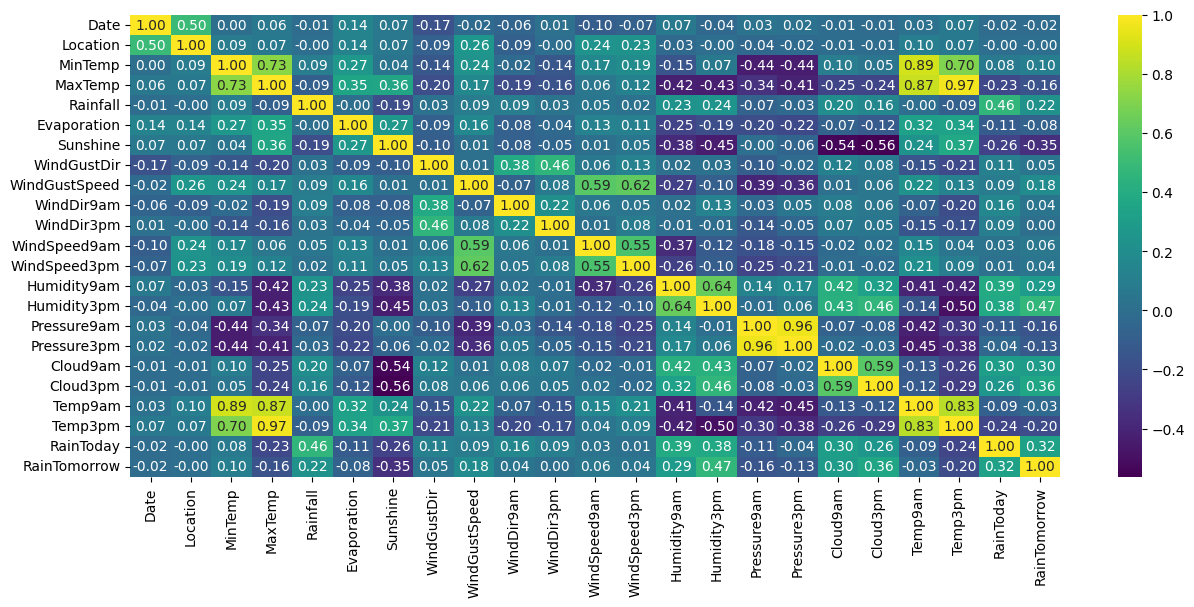

In [40]:
plt.figure(figsize=(15,6))
sns.heatmap(correlation,annot=True,cmap='viridis',fmt='.2f')

In [ ]:
                    # Checking for the distribution of data in the dataset

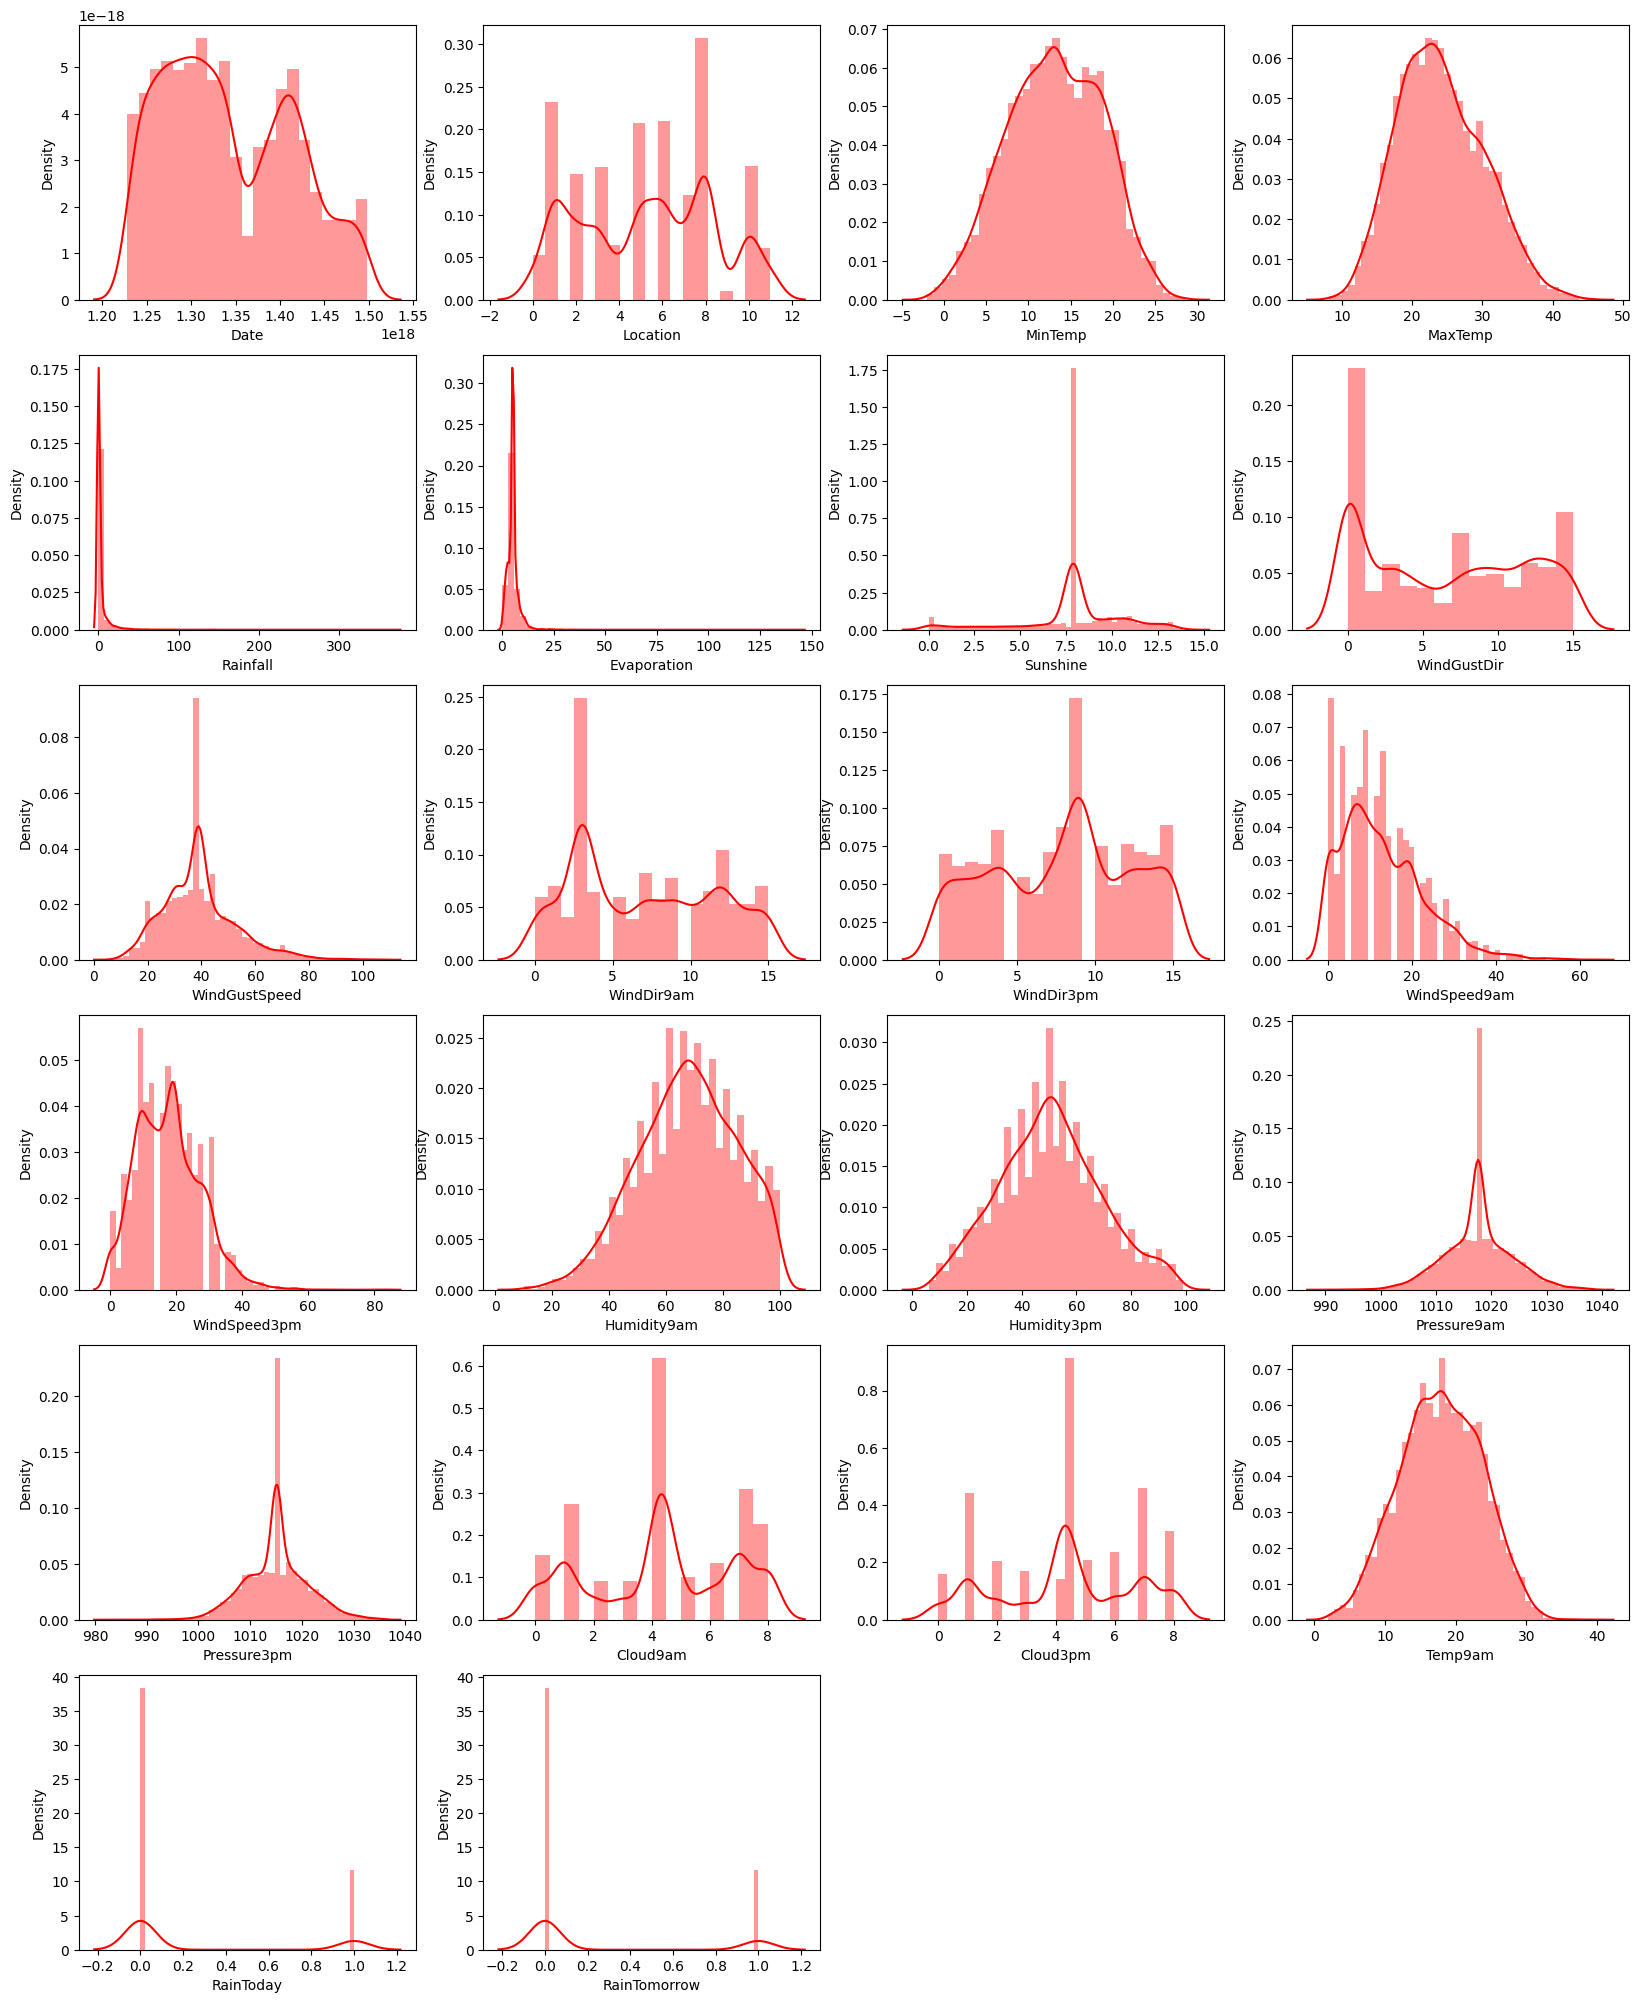

In [41]:
plt.figure(figsize=(20,25))
for col in enumerate(RFdf):
    plt.subplot(6,4,col[0]+1)
    sns.distplot(RFdf[col[1]],color='red')

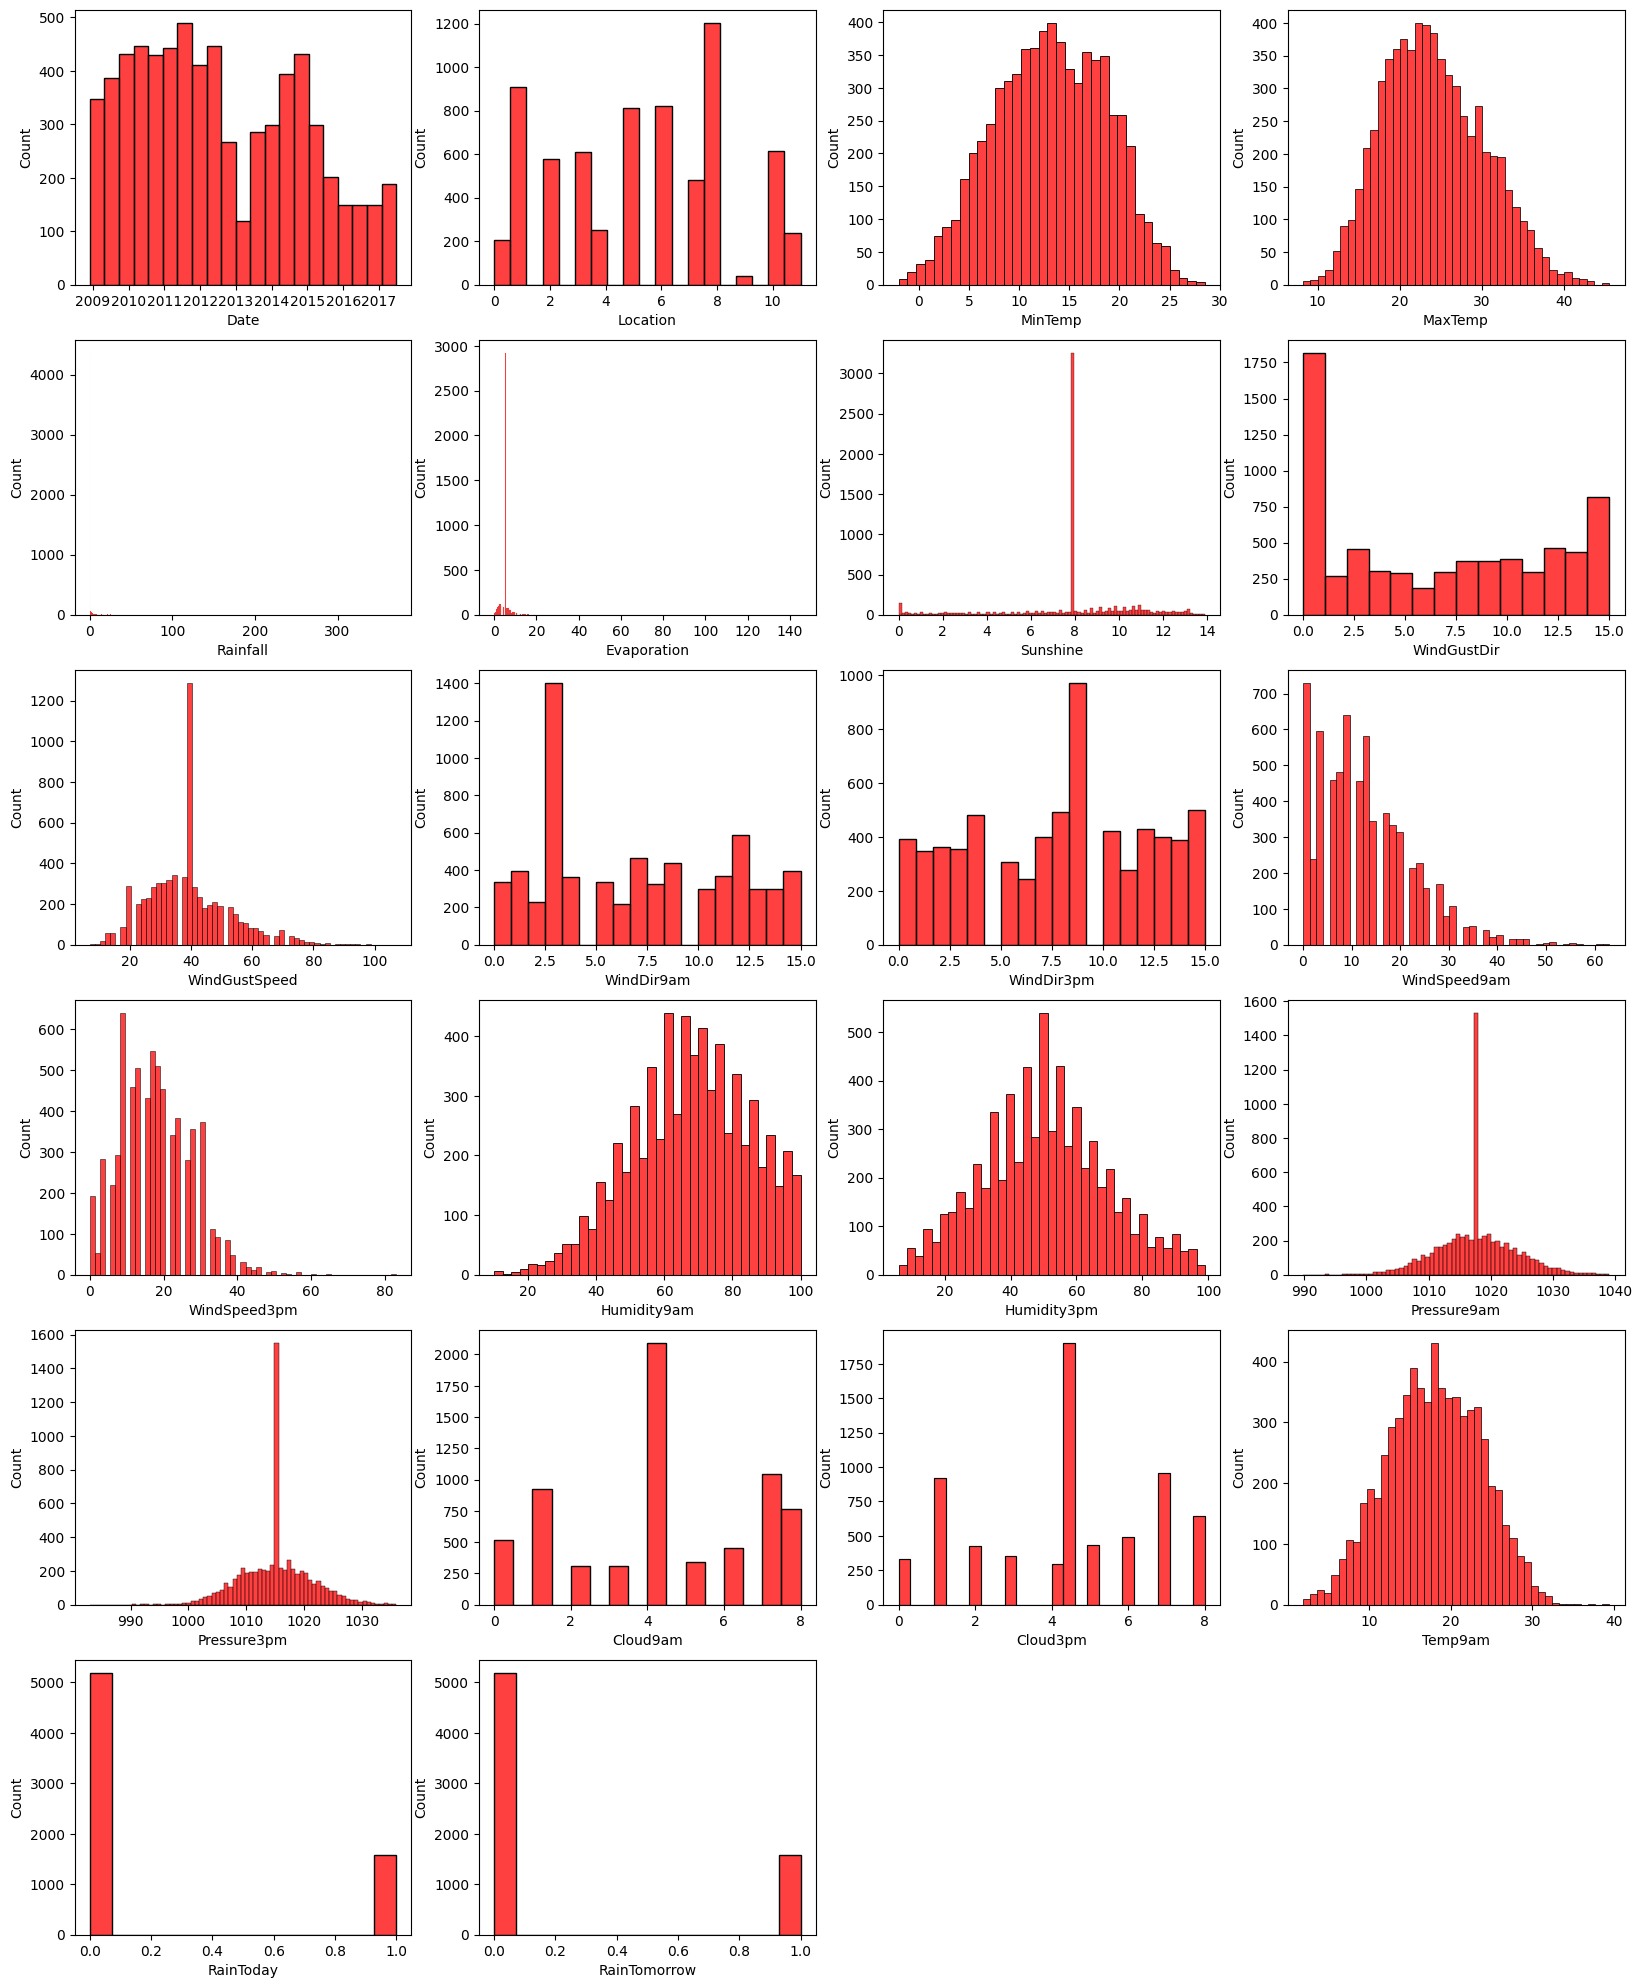

In [91]:
plt.figure(figsize=(20,25))
for col in enumerate(RFdf):
    plt.subplot(6,4,col[0]+1)
    sns.histplot(RFdf[col[1]],color='red')

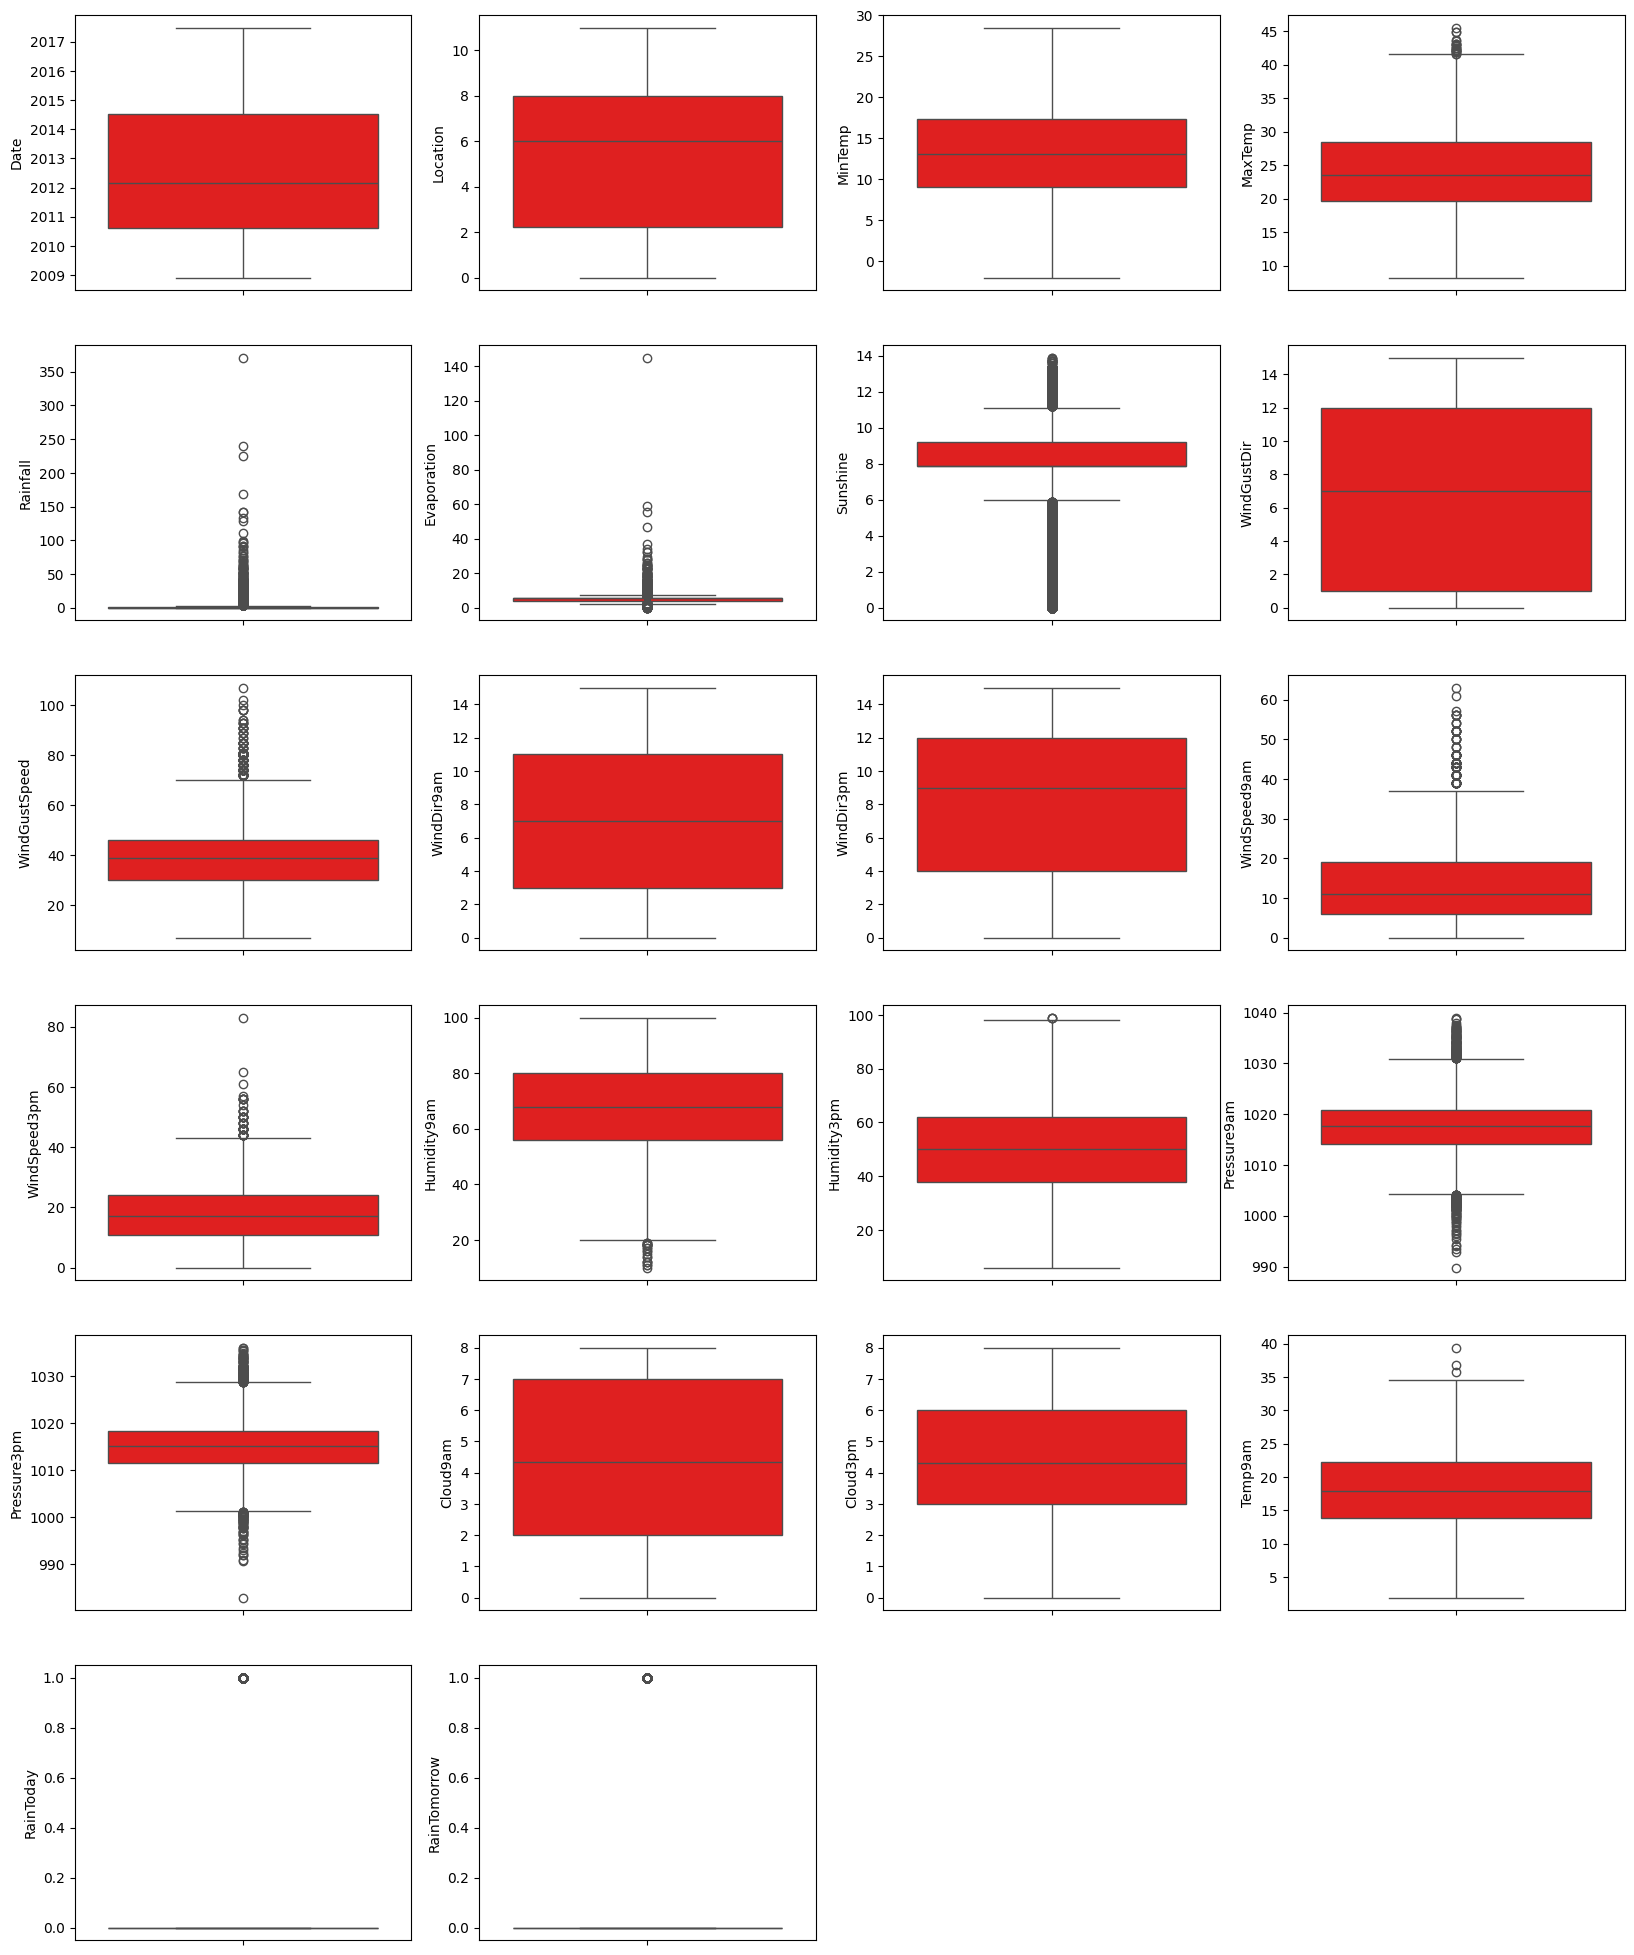

In [92]:
plt.figure(figsize=(20,25))
for col in enumerate(RFdf):
    plt.subplot(6,4,col[0]+1)
    sns.boxplot(RFdf[col[1]],color='red')

In [ ]:
                                    REMOVING OUTLIERS

In [48]:
from feature_engine.outliers import ArbitraryOutlierCapper
def remove_outliers(col):
    
    plt.figure(figsize=(20,10))  

    Q1=RFdf[col].quantile(0.25)
    Q3=RFdf[col].quantile(0.75)
    iqr=Q3-Q1
    lowfence=Q1-1.5*iqr
    uppfence=Q3+1.5*iqr
    print(lowfence)
    print(uppfence)

    arb=ArbitraryOutlierCapper(min_capping_dict={col:lowfence},max_capping_dict={col:uppfence})
    RFdf[[col]]=arb.fit_transform(RFdf[[col]])
    plt.boxplot(RFdf[col])


In [49]:
outlier_feature=['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Pressure9am','Pressure3pm','Temp9am']

6.400000000000006
41.599999999999994
-1.7999999999999998
3.0
2.046407185628742
7.255988023952097
5.927240499149178
11.163655700510493
6.0
70.0
20.0
116.0
1004.1500000000001
1030.9499999999998
1001.1500000000001
1028.75
1.450000000000001
34.65


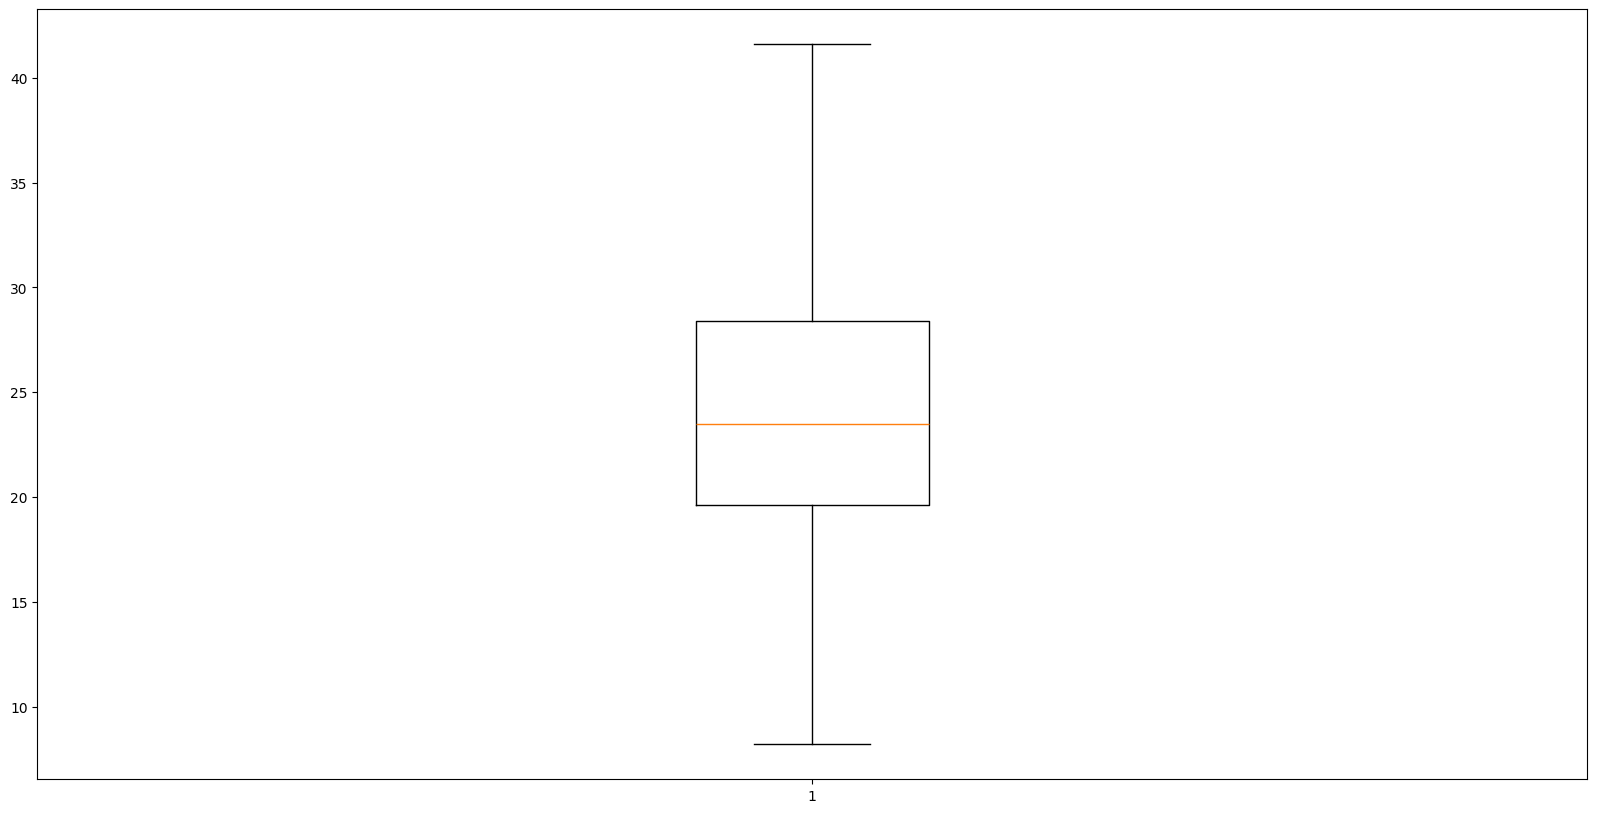

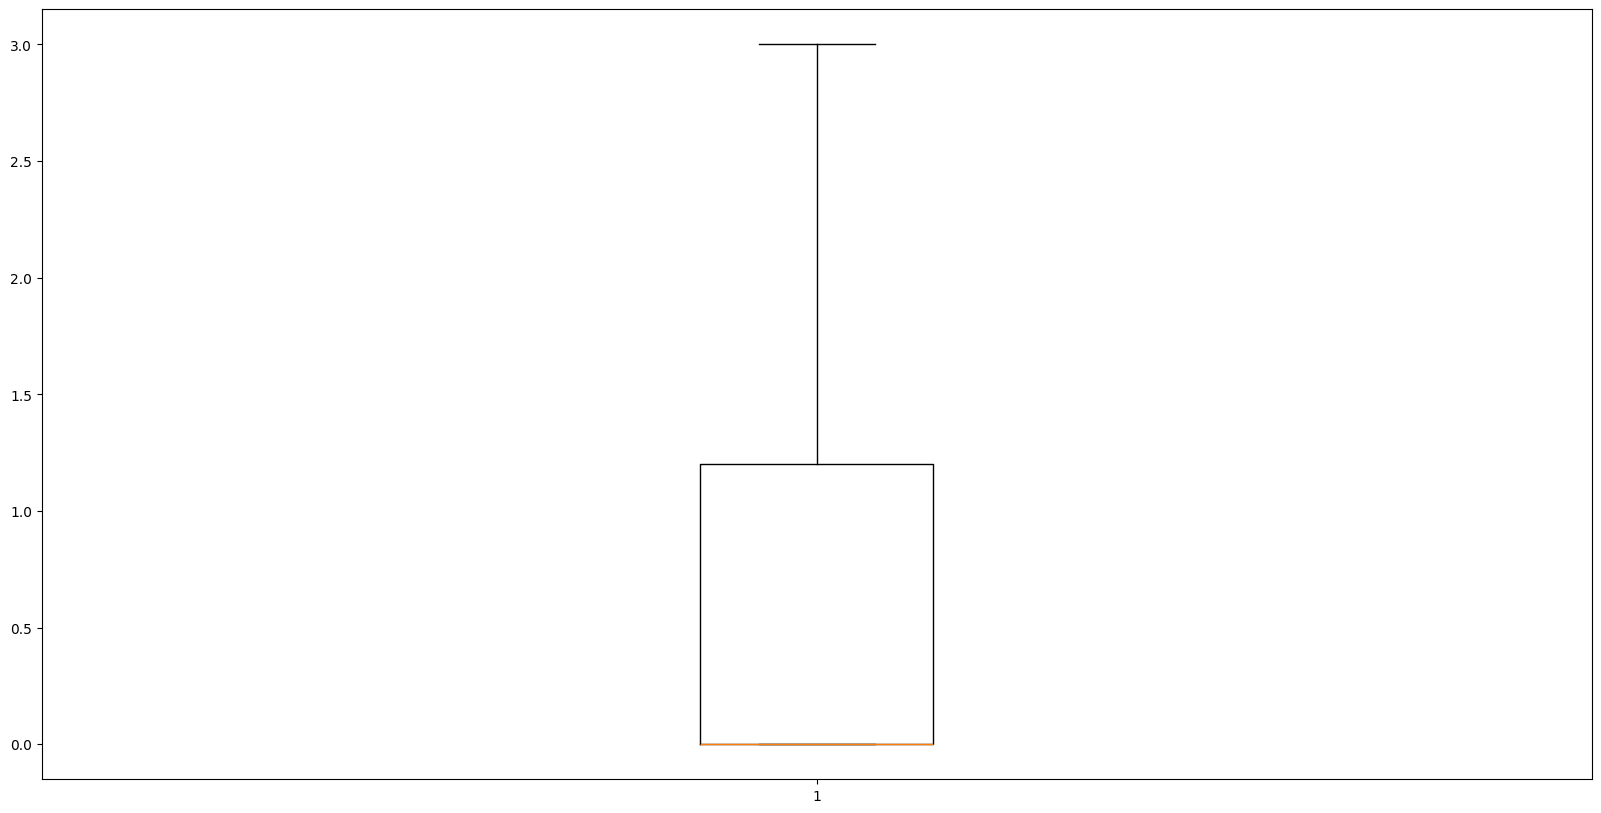

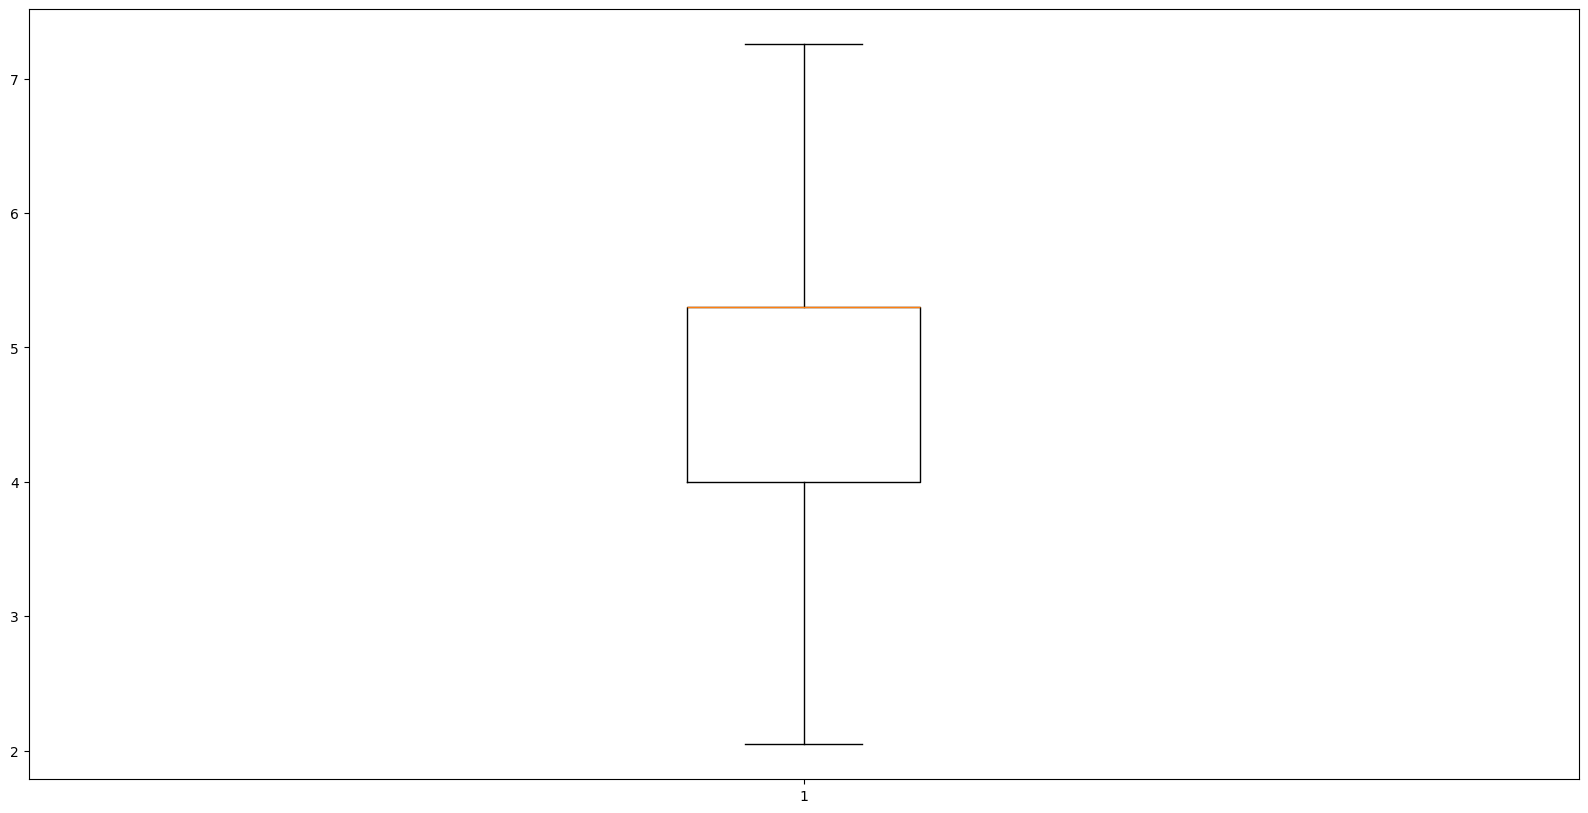

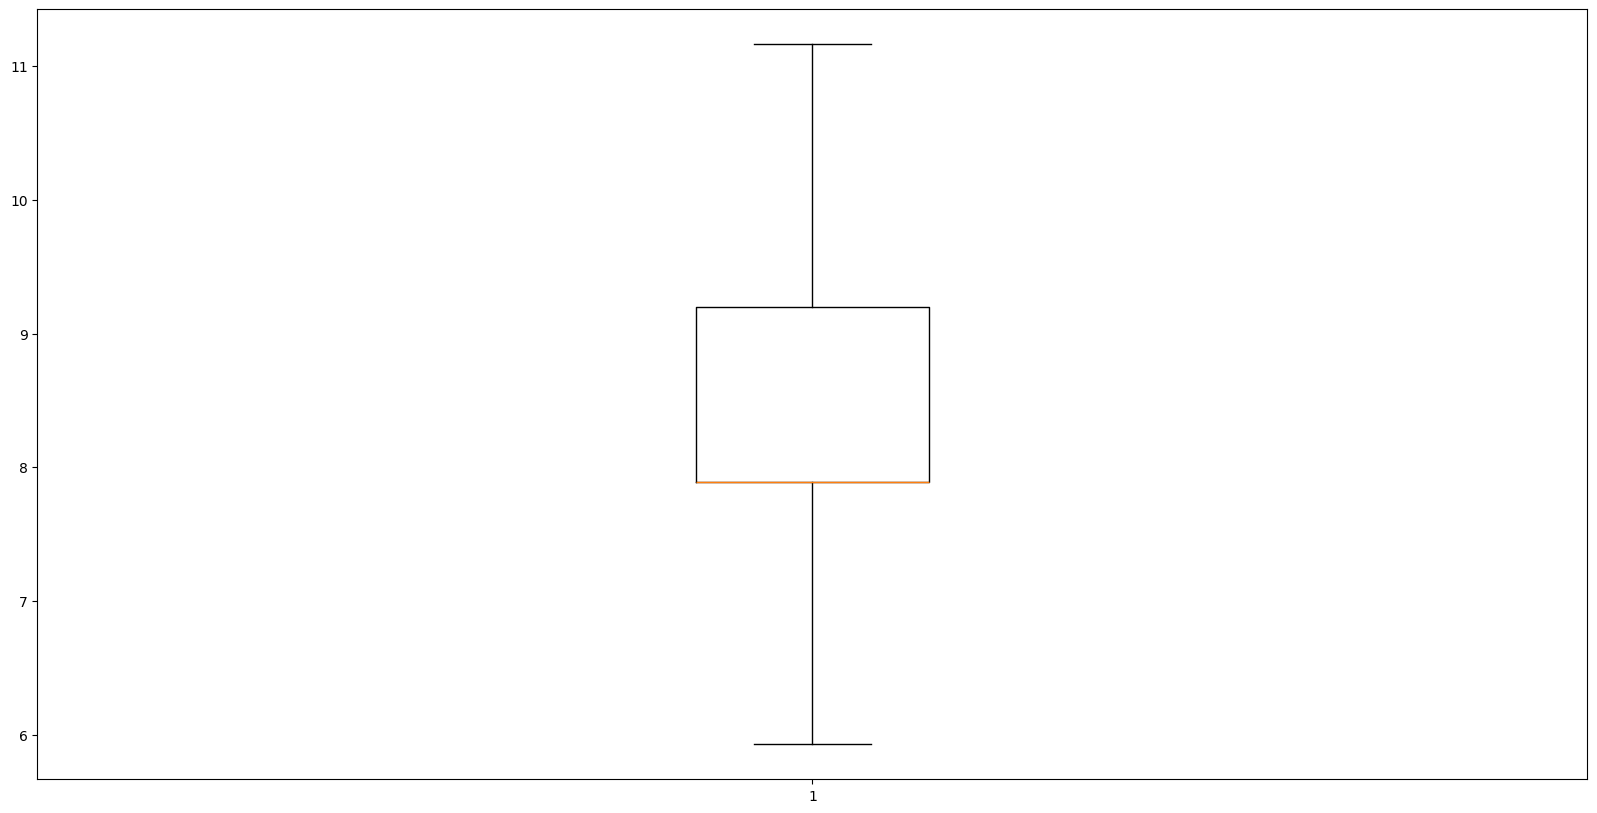

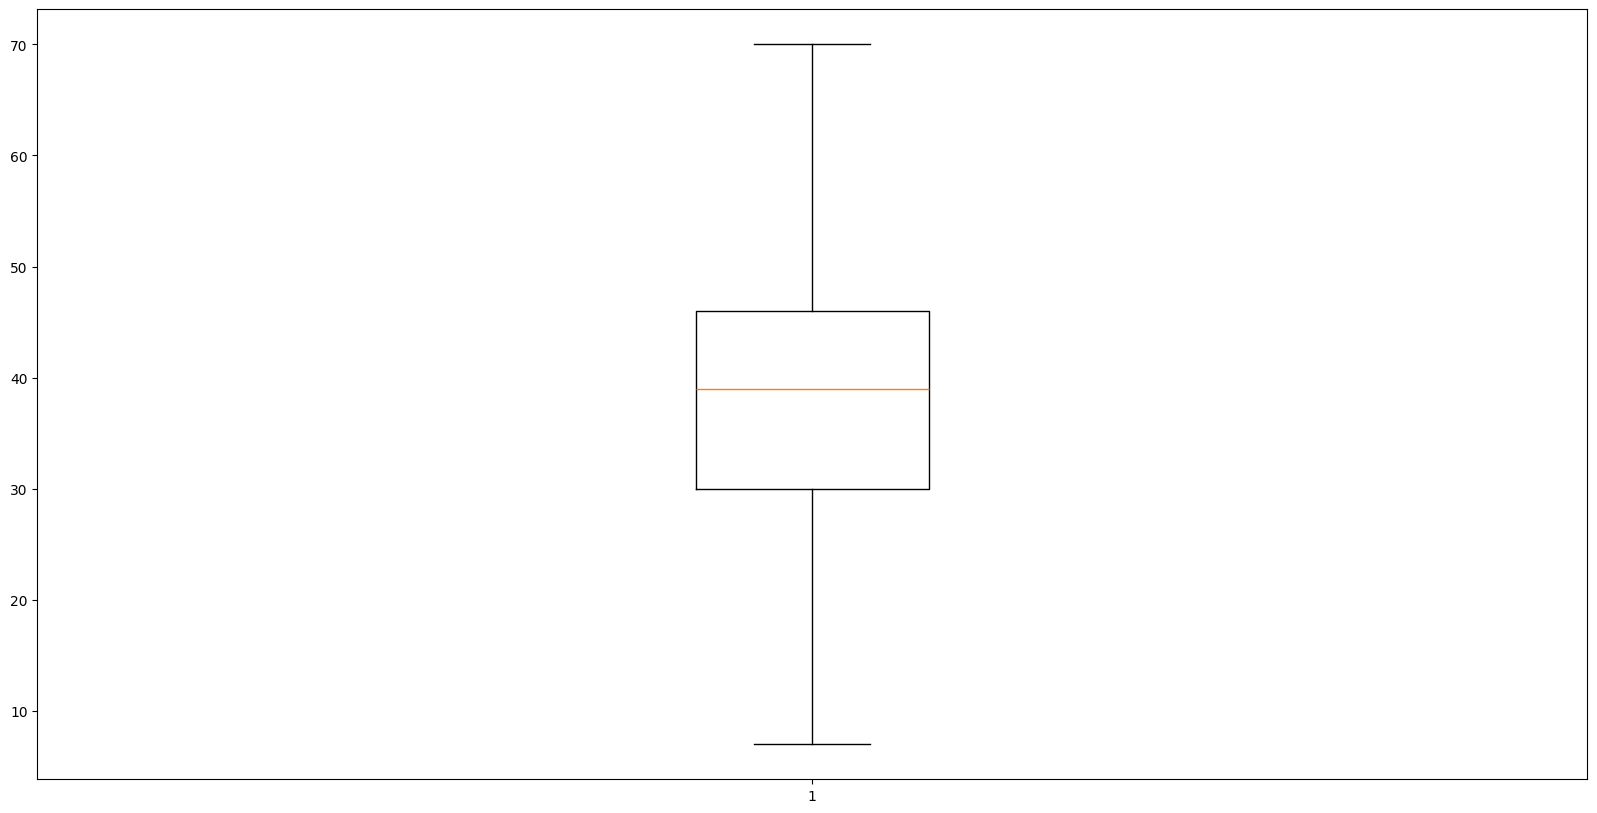

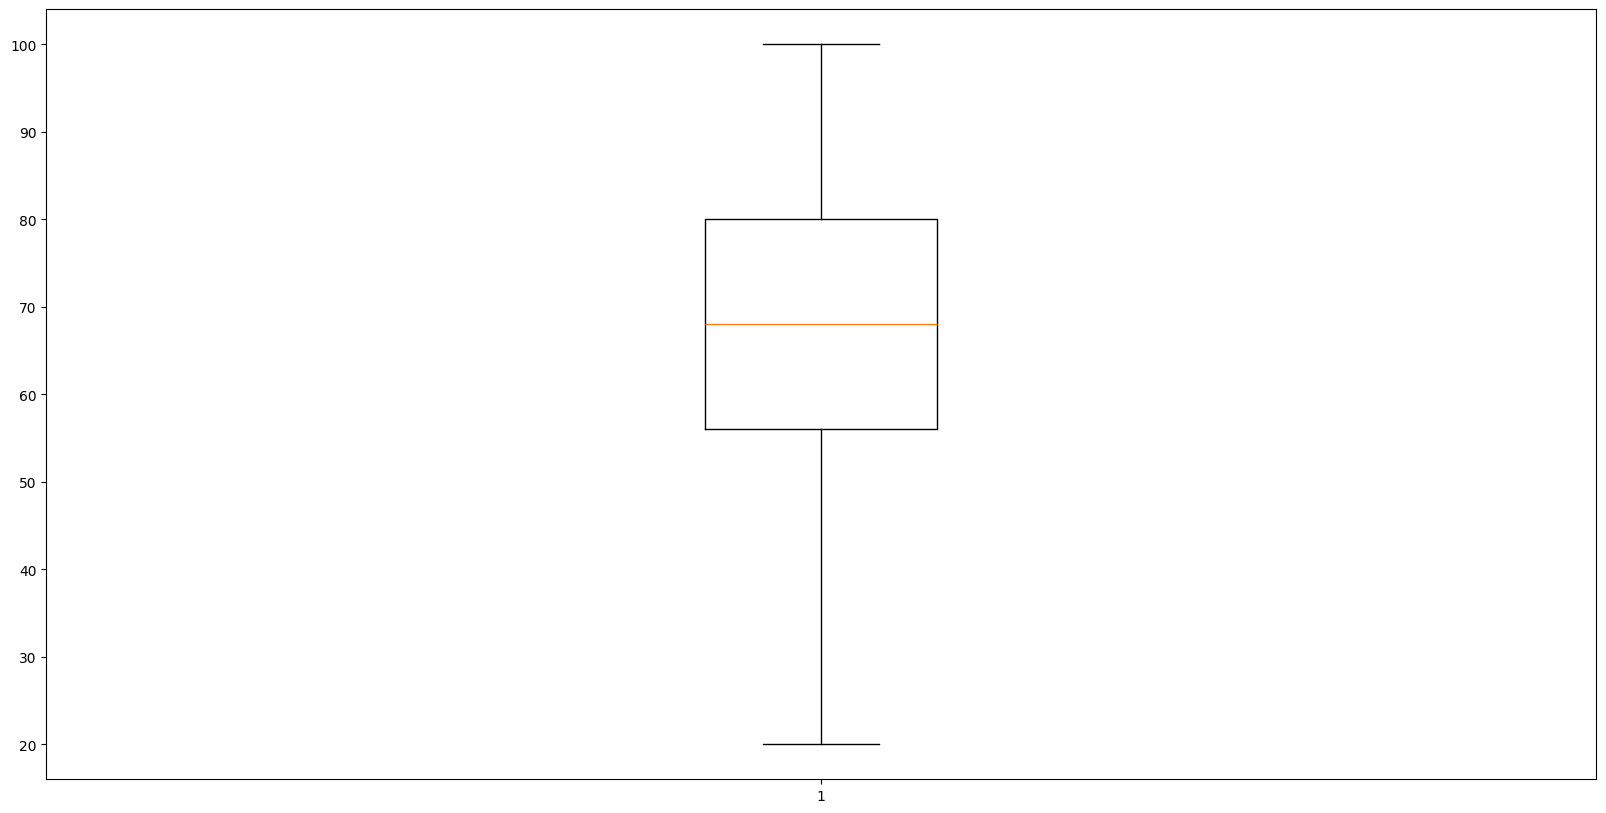

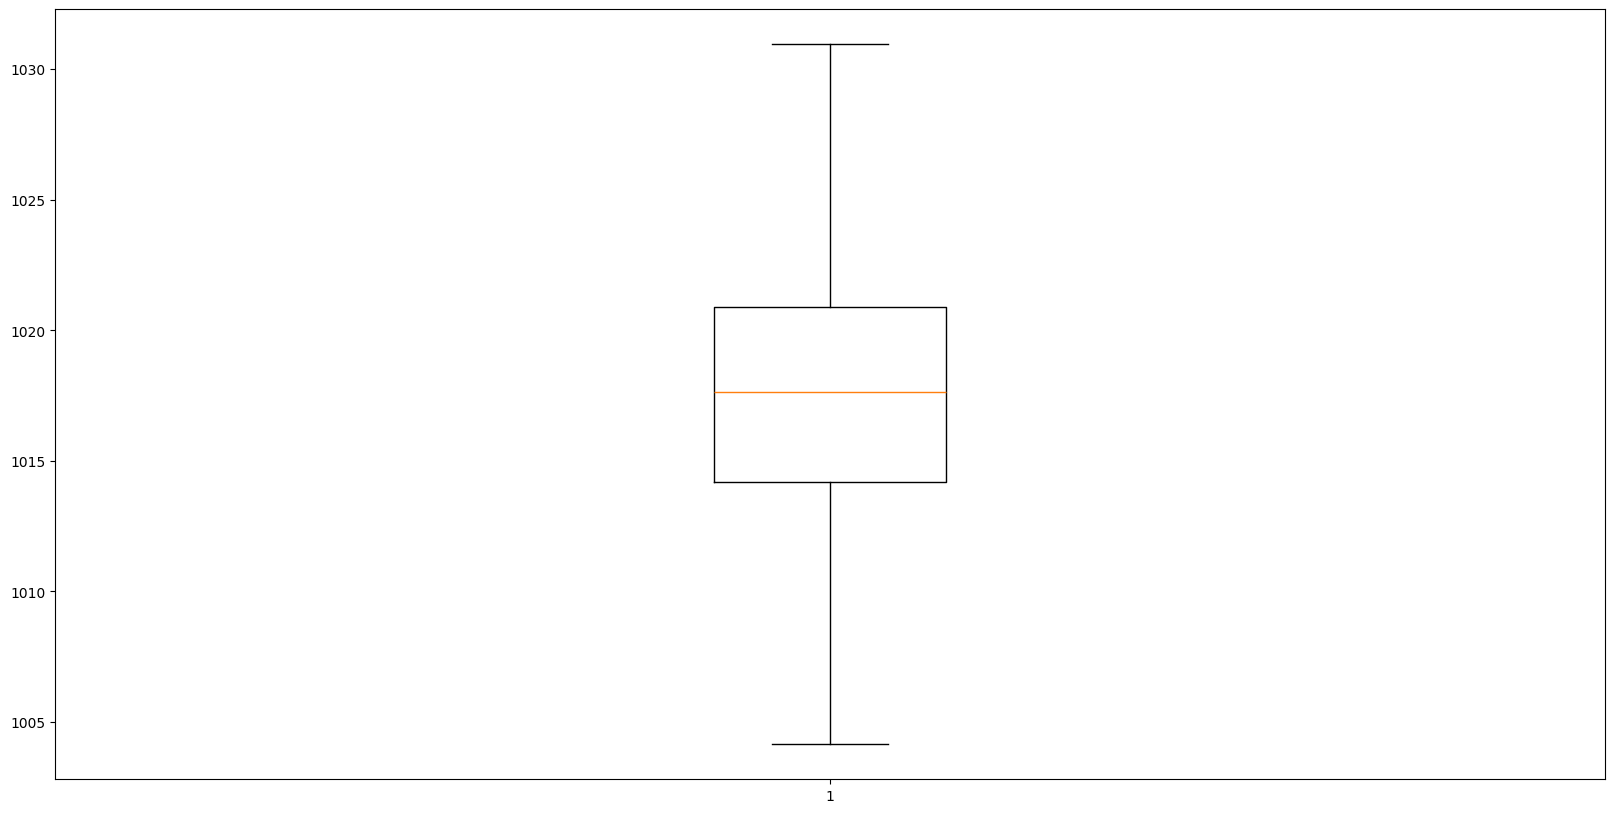

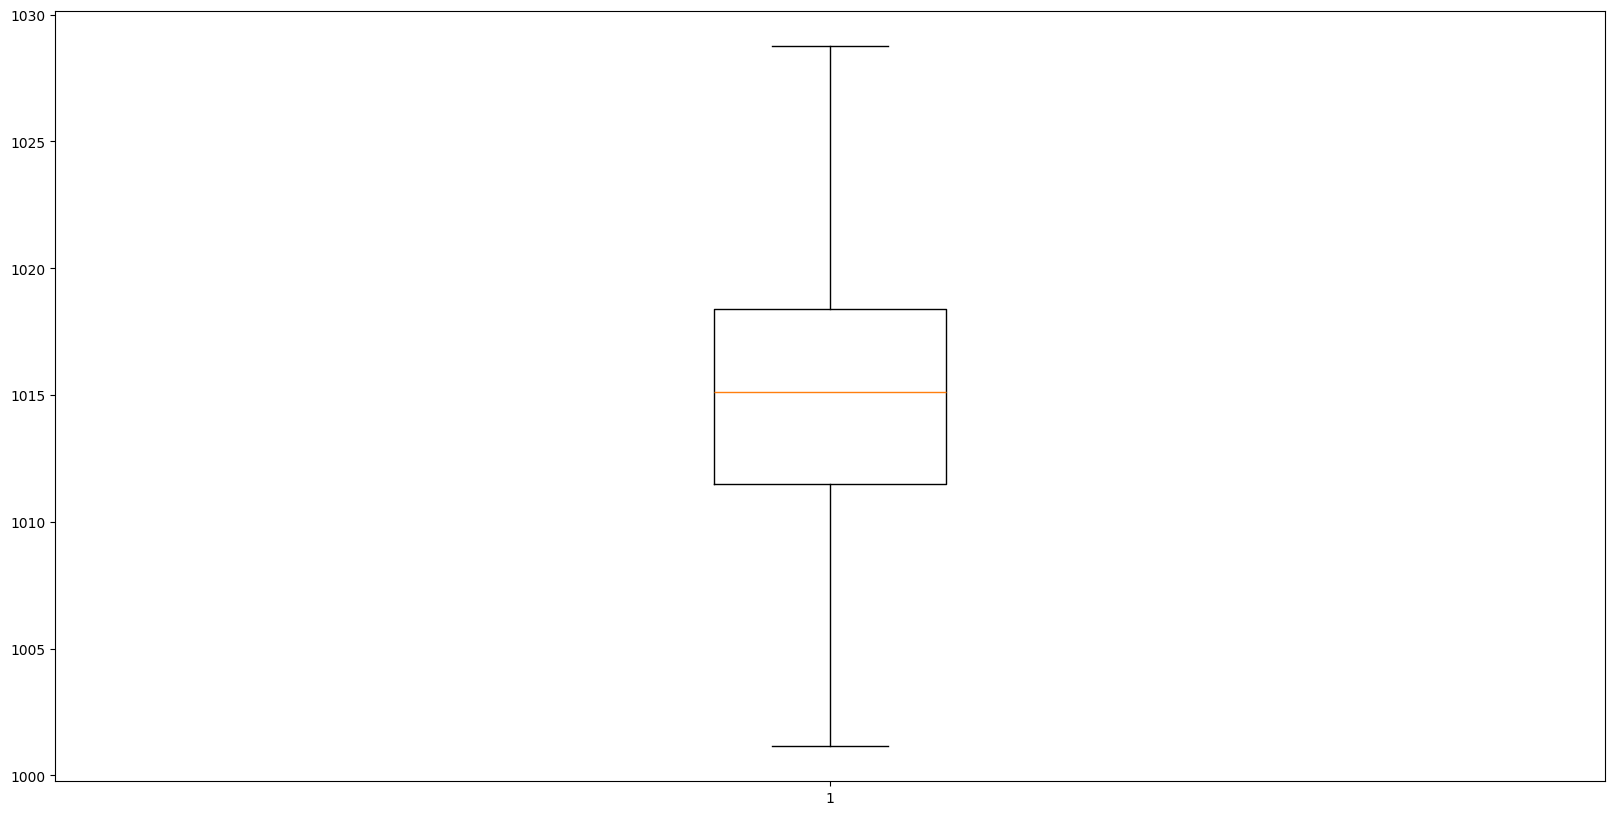

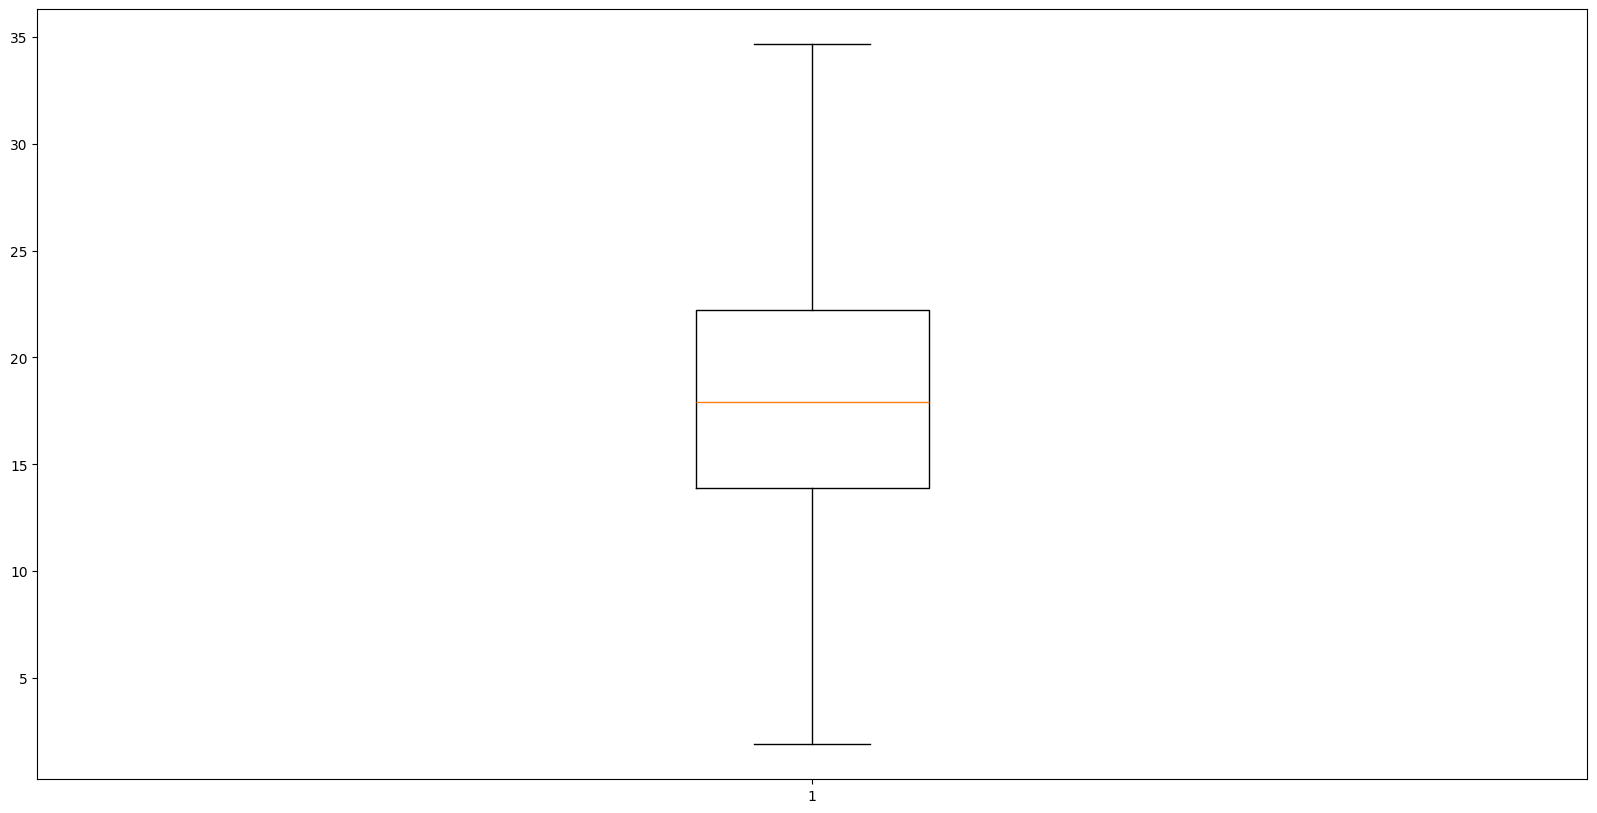

In [50]:
for col in outlier_feature:
    remove_outliers(col)

-8.5
43.5
-13.5
38.5
5.799999999999995
39.400000000000006


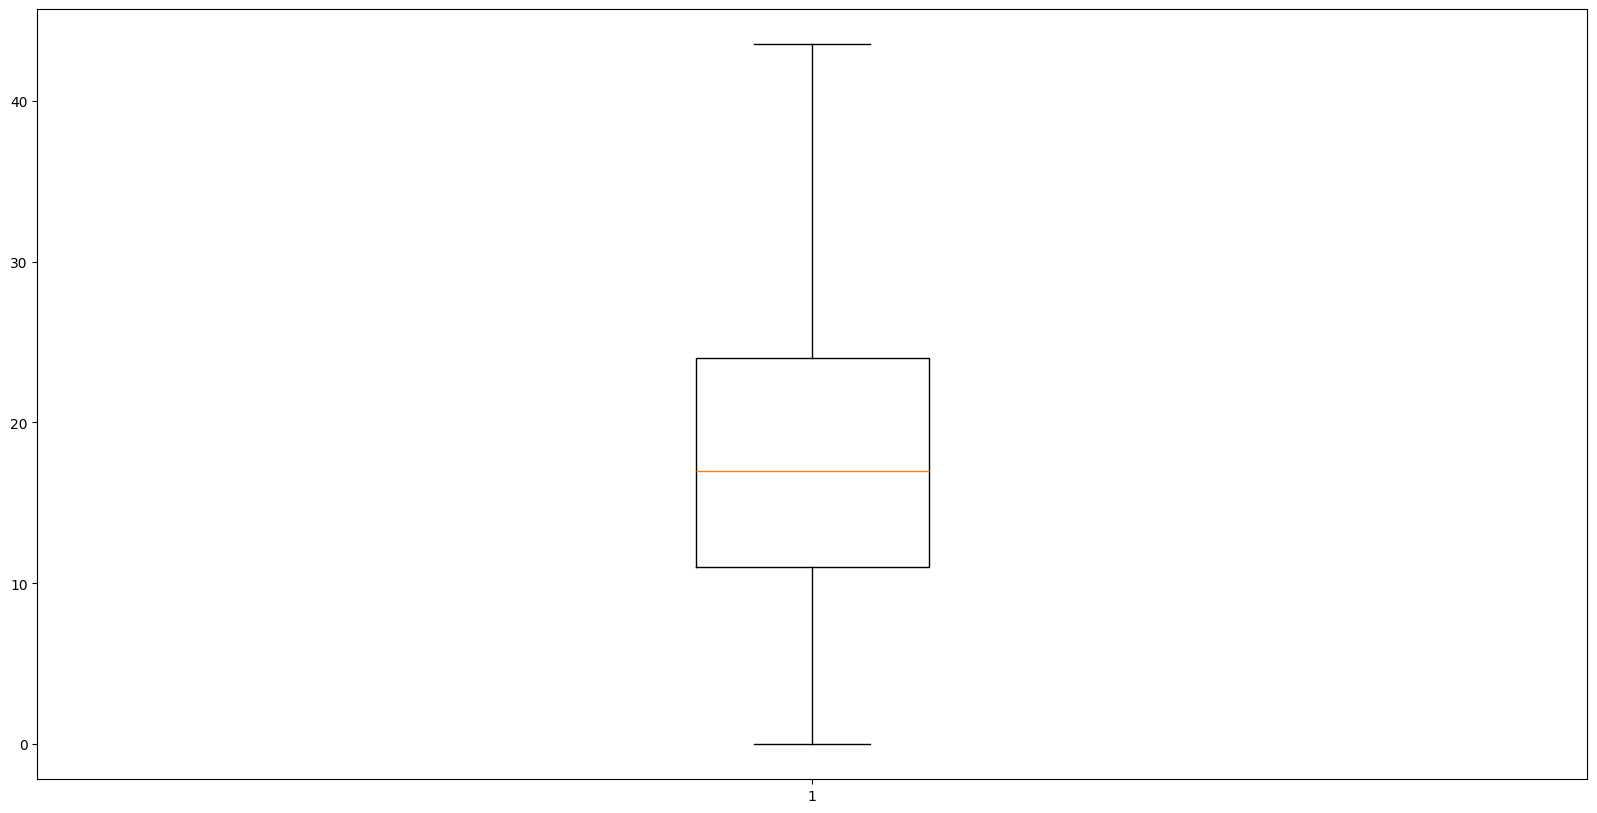

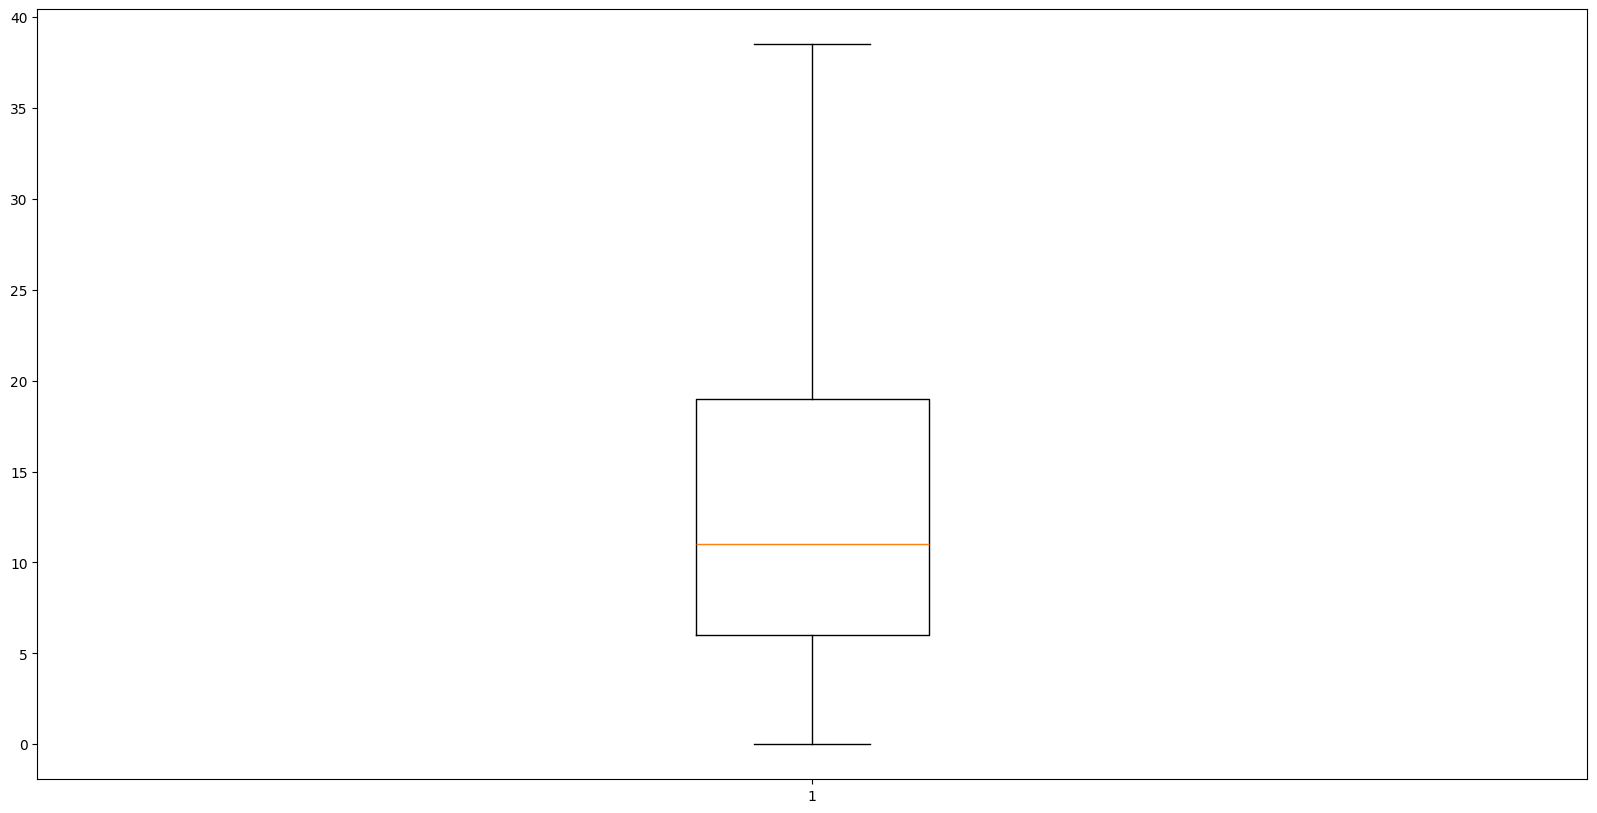

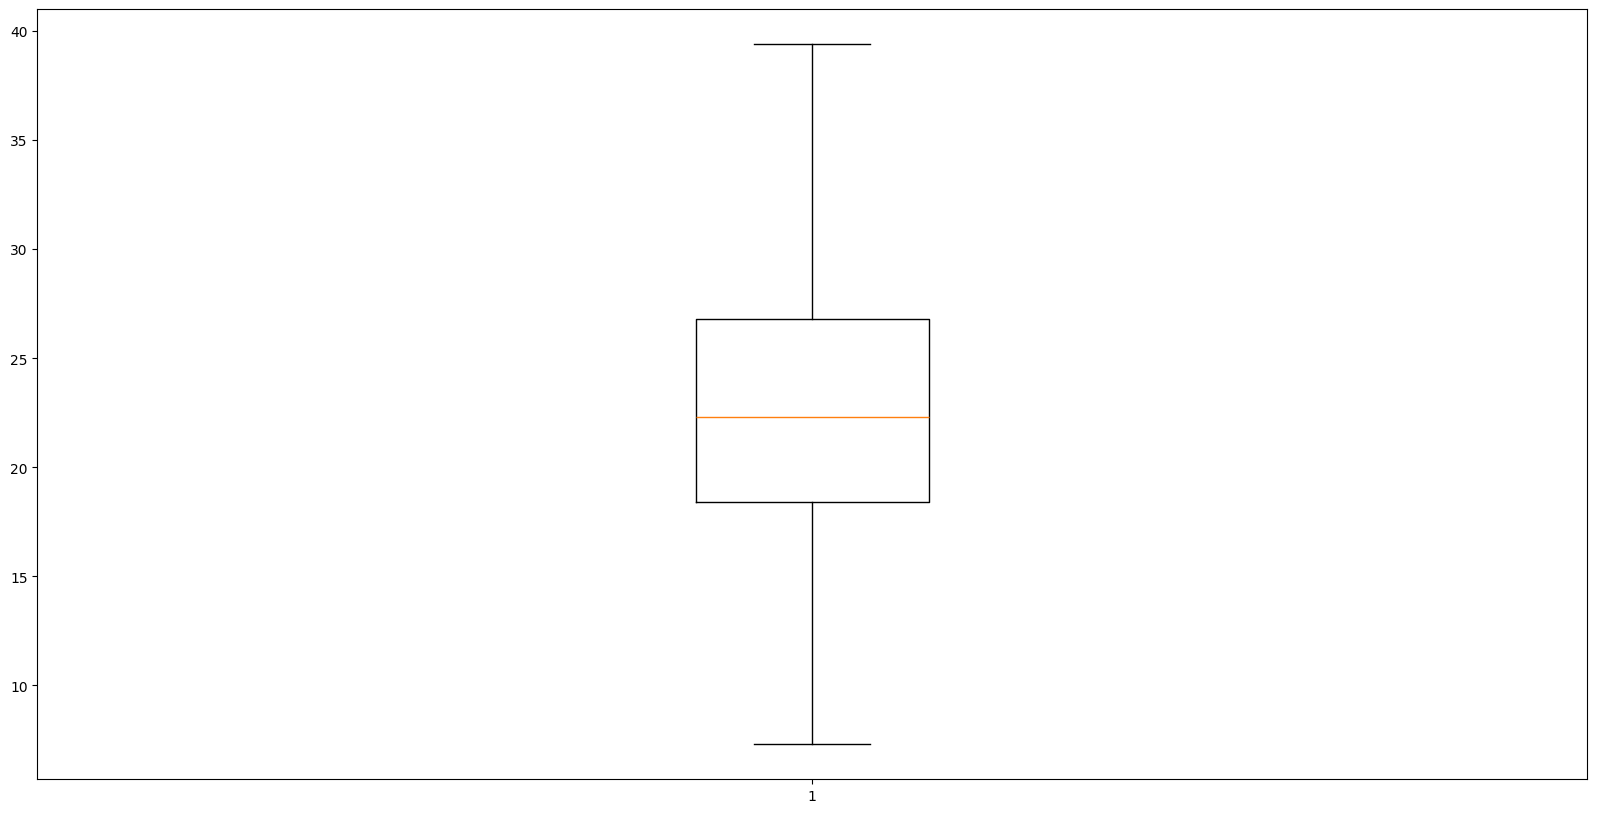

In [40]:
outlier2=['WindSpeed3pm','WindSpeed9am','Temp3pm']
for col in outlier2:
    remove_outliers(col)

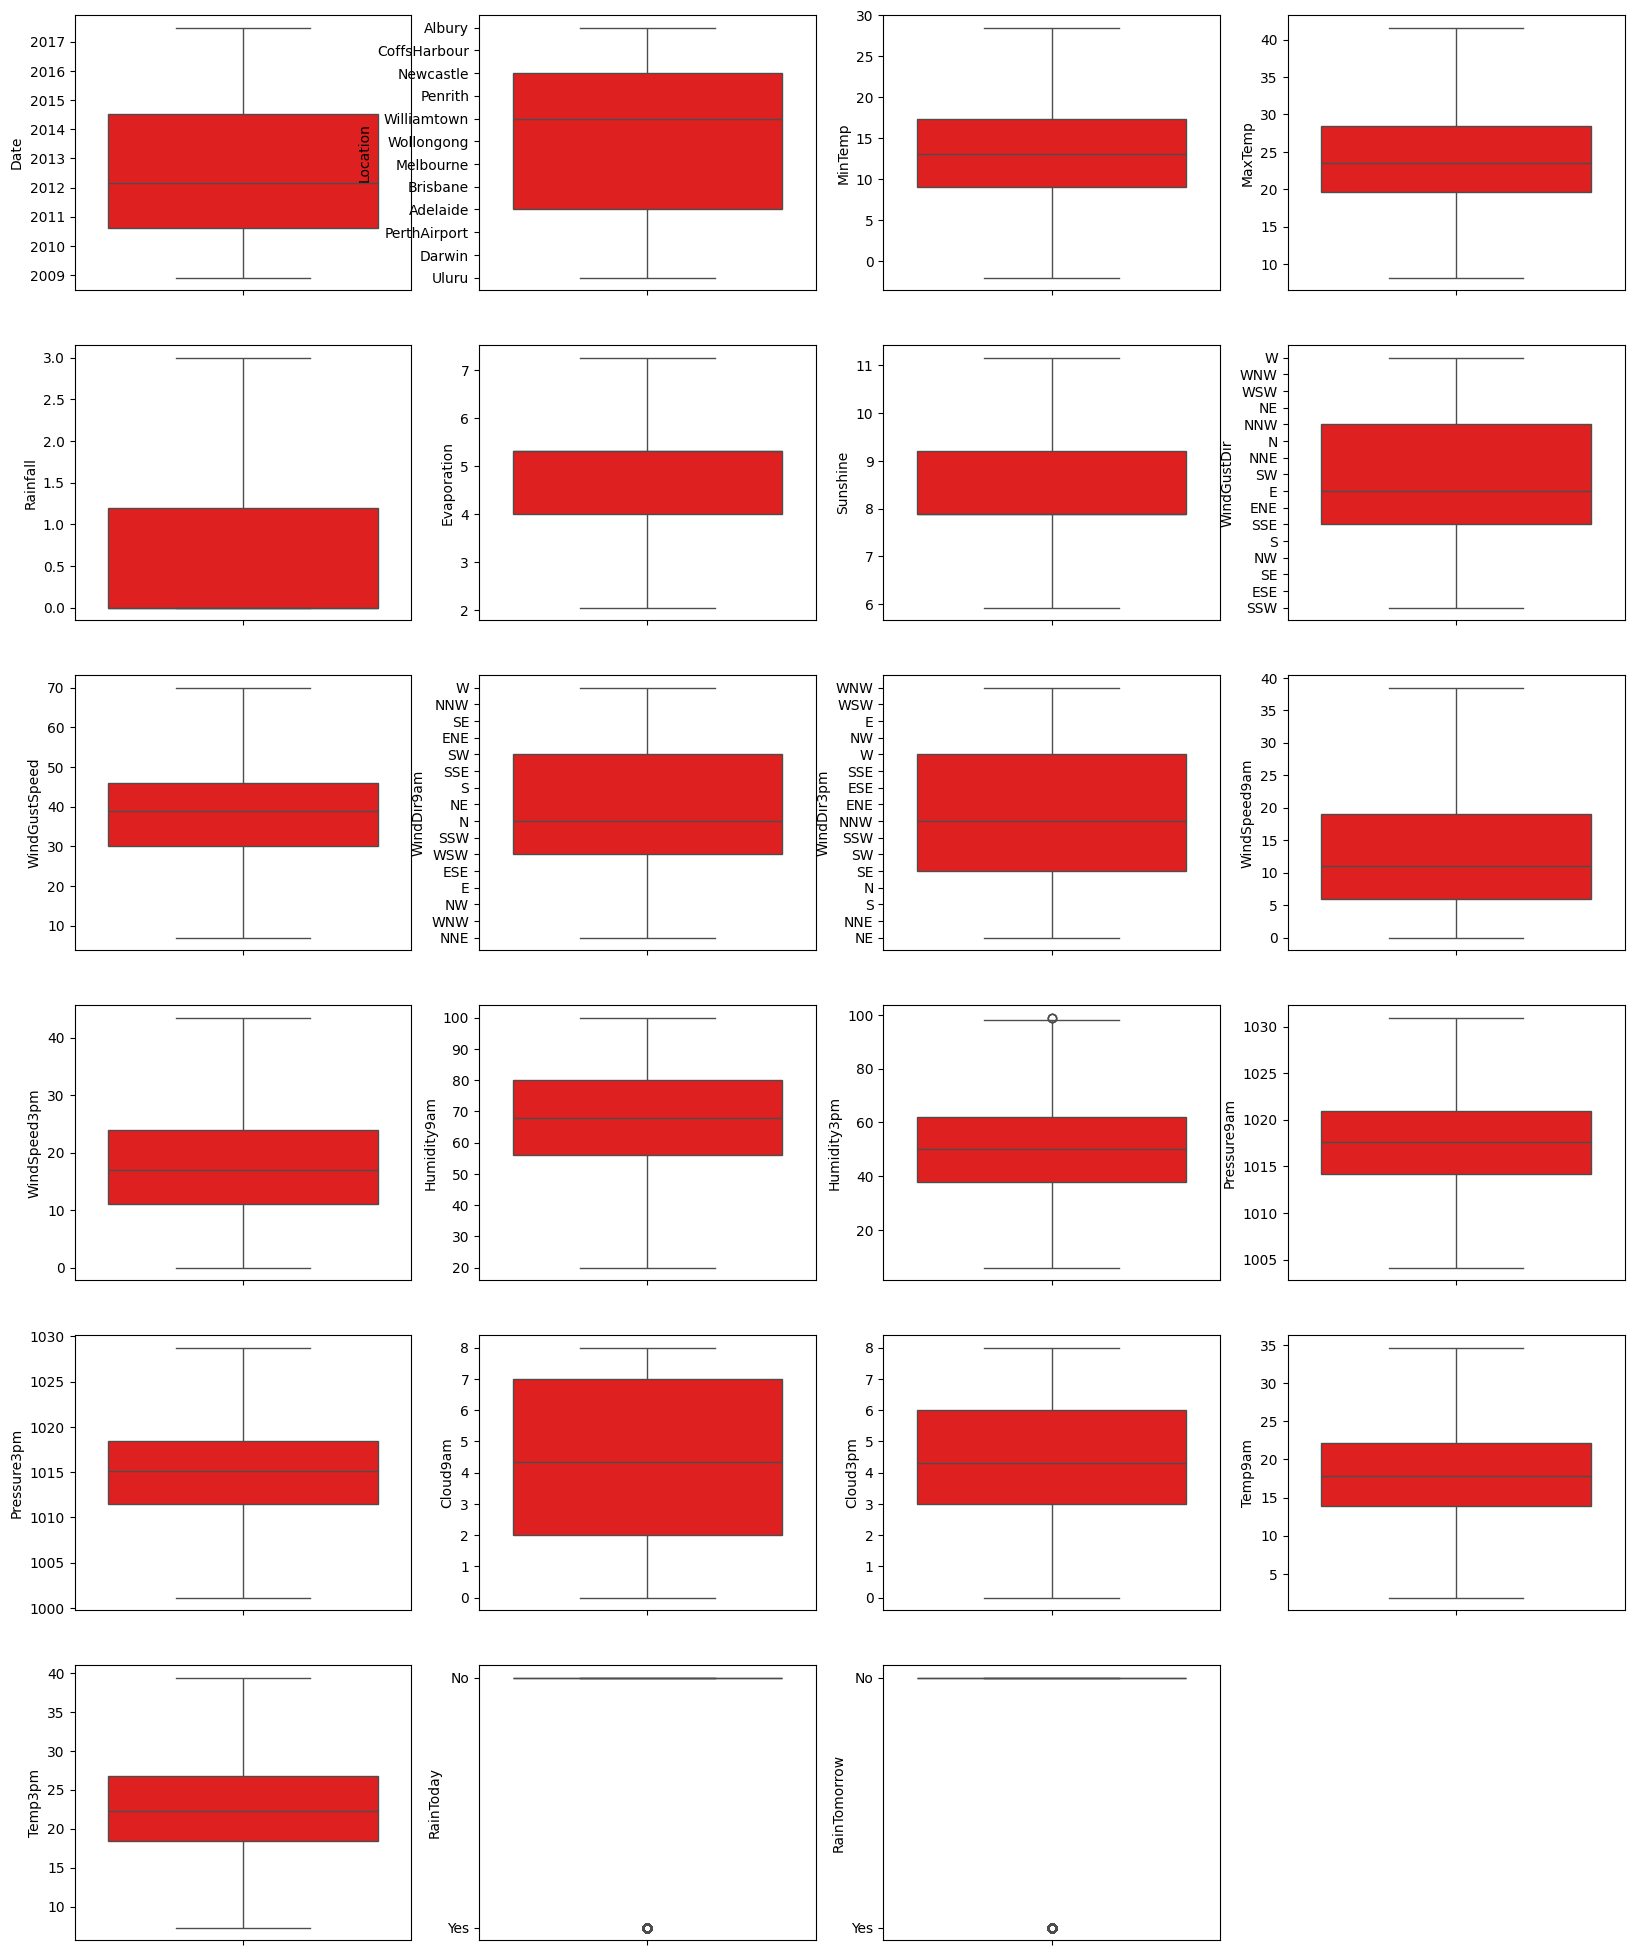

In [41]:
plt.figure(figsize=(20,25))
for col in enumerate(RFdf):
    plt.subplot(6,4,col[0]+1)
    sns.boxplot(RFdf[col[1]],color='red')

In [43]:
le=LabelEncoder()
RFdf['Location']=le.fit_transform(RFdf['Location'])

In [ ]:
                                CHECKING SKEWNESS IN THE FEATURES

In [46]:
RFdf.drop('Date',axis=1,inplace=True)

In [51]:
RFdf.skew()

Location        -0.000009
MinTemp         -0.083706
MaxTemp          0.313680
Rainfall         1.223422
Evaporation     -0.440138
Sunshine         0.453697
WindGustDir      0.105287
WindGustSpeed    0.462787
WindDir9am       0.220355
WindDir3pm      -0.123726
WindSpeed9am     0.957036
WindSpeed3pm     0.549797
Humidity9am     -0.238373
Humidity3pm      0.150860
Pressure9am      0.024813
Pressure3pm      0.043102
Cloud9am        -0.215085
Cloud3pm        -0.162159
Temp9am         -0.053205
RainToday        1.266937
RainTomorrow     1.266937
dtype: float64

In [53]:
x=RFdf.drop('RainTomorrow',axis=1)

In [54]:
y=RFdf.loc[:,'RainTomorrow']

In [55]:
x.value_counts()

Location  MinTemp    MaxTemp    Rainfall  Evaporation  Sunshine   WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am    RainToday
6         13.109145  24.098345  2.780148  5.302395     7.890896   0            38.977663      3           9           12.782206     17.57115      67.506559    50.467147    1017.626311  1015.119923  4.336806  4.320988  17.895038  0            10
                                0.000000  5.302395     7.890896   0            38.977663      3           9           12.782206     17.57115      67.506559    50.467147    1017.626311  1015.119923  4.336806  4.320988  17.895038  0             3
0         0.900000   14.600000  0.000000  4.400000     7.890896   13           24.000000      3           13          0.000000      15.00000      64.000000    33.000000    1030.950000  1028.750000  4.336806  4.320988  7.000000   0             1
7         14.400000  24.90

In [56]:
y.value_counts()

RainTomorrow
0    5190
1    1572
Name: count, dtype: int64

In [ ]:
                        PERFORMING SCALING OF THE FEATURES 

In [57]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x),columns=x.columns)

In [58]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,RainToday
0,-1.395097,0.052498,-0.195238,-0.107218,0.225966,-0.23076,1.220923,0.412911,1.315650,1.372365,0.737499,0.673324,0.202989,-1.539016,-1.717507,-1.391473,1.480398,0.000000,-0.173807,-0.550355
1,-1.395097,-1.030484,0.164369,-0.610719,0.225966,-0.23076,1.412005,0.412911,-0.222688,1.595253,-0.897347,0.463855,-1.372403,-1.376828,-1.215427,-1.269855,0.000000,0.000000,-0.121343,-0.550355
2,-1.395097,-0.037750,0.262444,-0.610719,0.225966,-0.23076,1.603087,0.570270,1.315650,1.595253,0.635321,0.882794,-1.722490,-1.106513,-1.734820,-1.113489,0.000000,-0.999089,0.543204,-0.550355
3,-1.395097,-0.705589,0.638397,-0.610719,0.225966,-0.23076,-0.498814,-1.160681,0.436600,-1.748064,-0.182102,-0.897697,-1.314055,-1.863394,-0.003509,-0.401157,0.000000,0.000000,0.036050,-0.550355
4,-1.395097,0.792536,1.341266,0.228449,0.225966,-0.23076,1.220923,0.176872,-1.321500,-0.187849,-0.590814,0.254385,0.844815,-0.944325,-1.180800,-1.582586,1.076270,1.583662,-0.016415,-0.550355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,1.186193,-1.860770,-0.113509,-0.610719,0.225966,-0.23076,-1.263141,-0.609923,0.436600,-1.525176,0.022254,-0.688228,-0.963968,-1.430891,1.208408,0.901890,0.000000,0.000000,-1.362997,-0.550355
6758,1.186193,-1.716373,0.197061,-0.610719,0.225966,-0.23076,-0.116650,-1.318040,0.436600,-1.079401,0.022254,-0.897697,-0.672229,-1.593079,1.017964,0.693402,0.000000,0.000000,-1.223093,-0.550355
6759,1.186193,-1.391478,0.458593,-0.610719,0.225966,-0.23076,-0.689895,-0.137846,0.436600,1.372365,-0.386458,-0.897697,-0.847272,-1.430891,0.585136,0.293801,0.000000,0.000000,-0.943283,-0.550355
6760,1.186193,-0.958285,0.474939,-0.610719,0.225966,-0.23076,0.456596,-0.845962,0.656363,-1.079401,0.022254,-1.107167,-0.963968,-1.430891,0.308127,0.241679,-0.540240,-0.999089,-0.488593,-0.550355


In [59]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 6762, dtype: int32

In [60]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1,y1=smt.fit_resample(x,y)



In [61]:
y1.value_counts()

RainTomorrow
0    5190
1    5190
Name: count, dtype: int64

In [ ]:
# now each category of target feature has balaced data set1

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['features']=x1.columns
vif

,vif values,features
0,1.141912,Location
1,9.675298,MinTemp
2,24.300834,MaxTemp
3,8.137507,Rainfall
4,1.492688,Evaporation
5,2.154745,Sunshine
6,1.500517,WindGustDir
7,2.434101,WindGustSpeed
8,1.351239,WindDir9am
9,1.392638,WindDir3pm


In [ ]:
#Here from the above observation vif values for checking of multicollinearity Temp3pm is 31 t

In [74]:
x1.drop(['Temp3pm'],axis=1,inplace =True)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['features']=x1.columns
vif

,vif values,features
0,1.141396,Location
1,9.610149,MinTemp
2,10.240613,MaxTemp
3,8.135272,Rainfall
4,1.492361,Evaporation
5,2.153265,Sunshine
6,1.492595,WindGustDir
7,2.414963,WindGustSpeed
8,1.349072,WindDir9am
9,1.391420,WindDir3pm


In [65]:
x1.drop(['Pressure9am'],axis=1,inplace =True)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['features']=x1.columns
vif

,vif values,features
0,1.140750,Location
1,9.595397,MinTemp
2,9.870011,MaxTemp
3,8.240363,Rainfall
4,1.477858,Evaporation
5,2.187294,Sunshine
6,1.473518,WindGustDir
7,2.378419,WindGustSpeed
8,1.326950,WindDir9am
9,1.310494,WindDir3pm


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [68]:
maxac=0
maxRs=0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxRS=i
print('best accuracy',maxac,"at random state",maxRS)


best accuracy 0.9100834938985228 at random state 11


In [69]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRs)
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is',acc)

Accuracy is 0.8917790622992935


In [70]:
def classification_models(model,x_train,y_train,x_test,y_test):
     
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(accuracy_score(y_test,pred))
    c_matrix=confusion_matrix(y_test,pred)
    print(c_matrix)
    print(classification_report(y_test,pred))
    x_labels=['0','1']
    y_labels=['0','1']
    plt.figure(figsize=(15,10))
    sns.heatmap(c_matrix,annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
    plt.xlabel('predicted value')
    plt.ylabel('actual value')



0.8859987154784843
[[1361  203]
 [ 152 1398]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1564
           1       0.87      0.90      0.89      1550

    accuracy                           0.89      3114
   macro avg       0.89      0.89      0.89      3114
weighted avg       0.89      0.89      0.89      3114



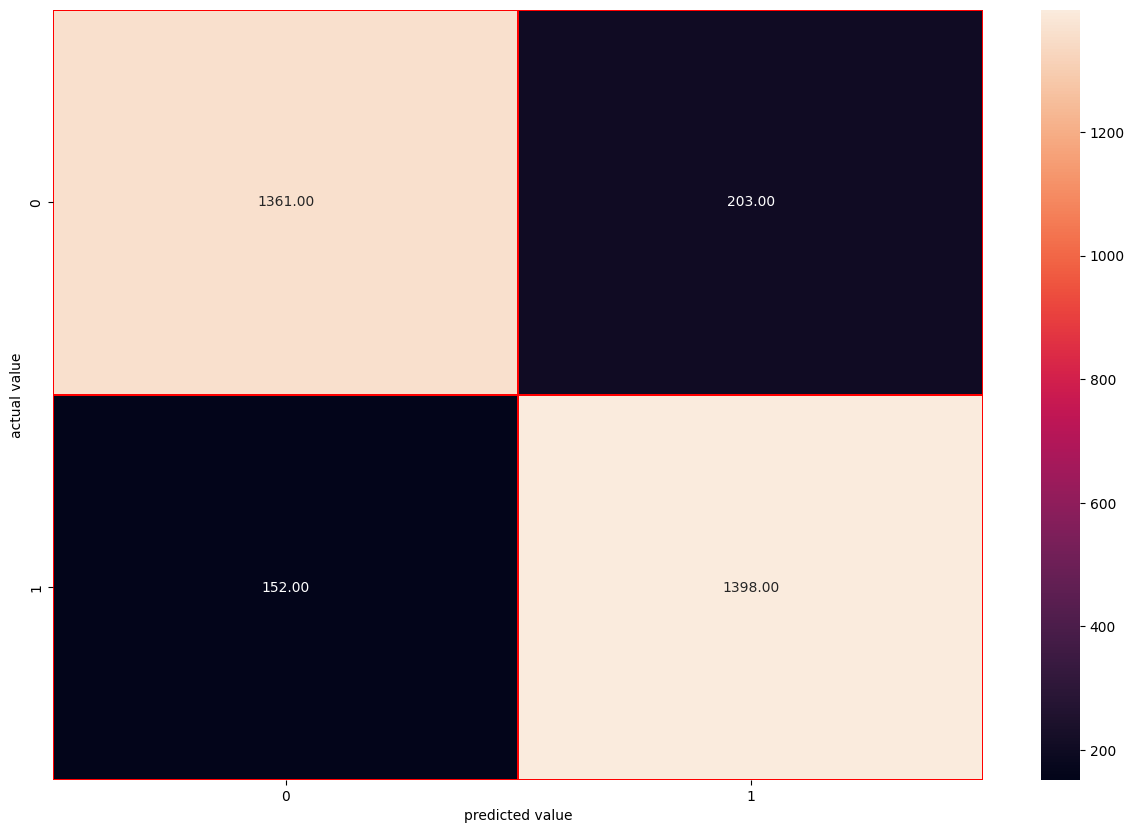

In [71]:
RFC=RandomForestClassifier()

classification_models(RFC,x_train,y_train,x_test,y_test)

0.7755298651252408
[[1215  349]
 [ 350 1200]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1564
           1       0.77      0.77      0.77      1550

    accuracy                           0.78      3114
   macro avg       0.78      0.78      0.78      3114
weighted avg       0.78      0.78      0.78      3114



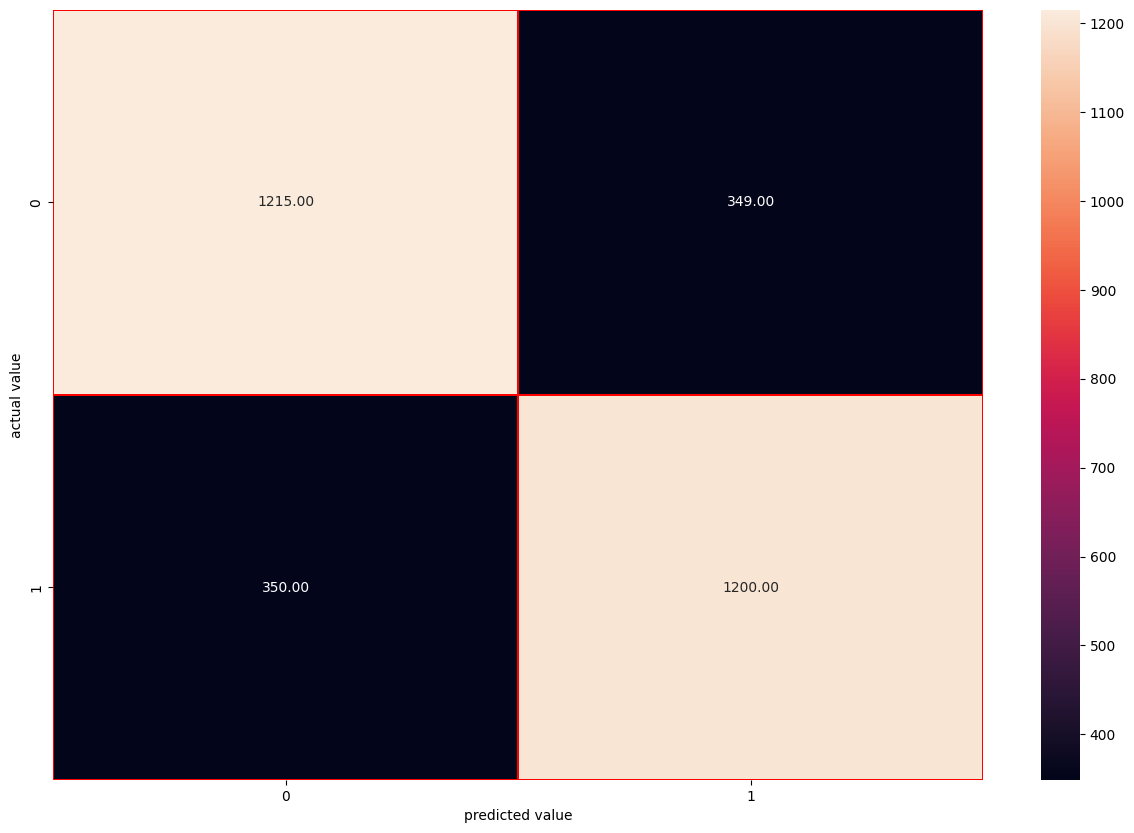

In [72]:
LR=LogisticRegression()
classification_models(LR,x_train,y_train,x_test,y_test)

0.8169556840077071
[[1289  275]
 [ 295 1255]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1564
           1       0.82      0.81      0.81      1550

    accuracy                           0.82      3114
   macro avg       0.82      0.82      0.82      3114
weighted avg       0.82      0.82      0.82      3114



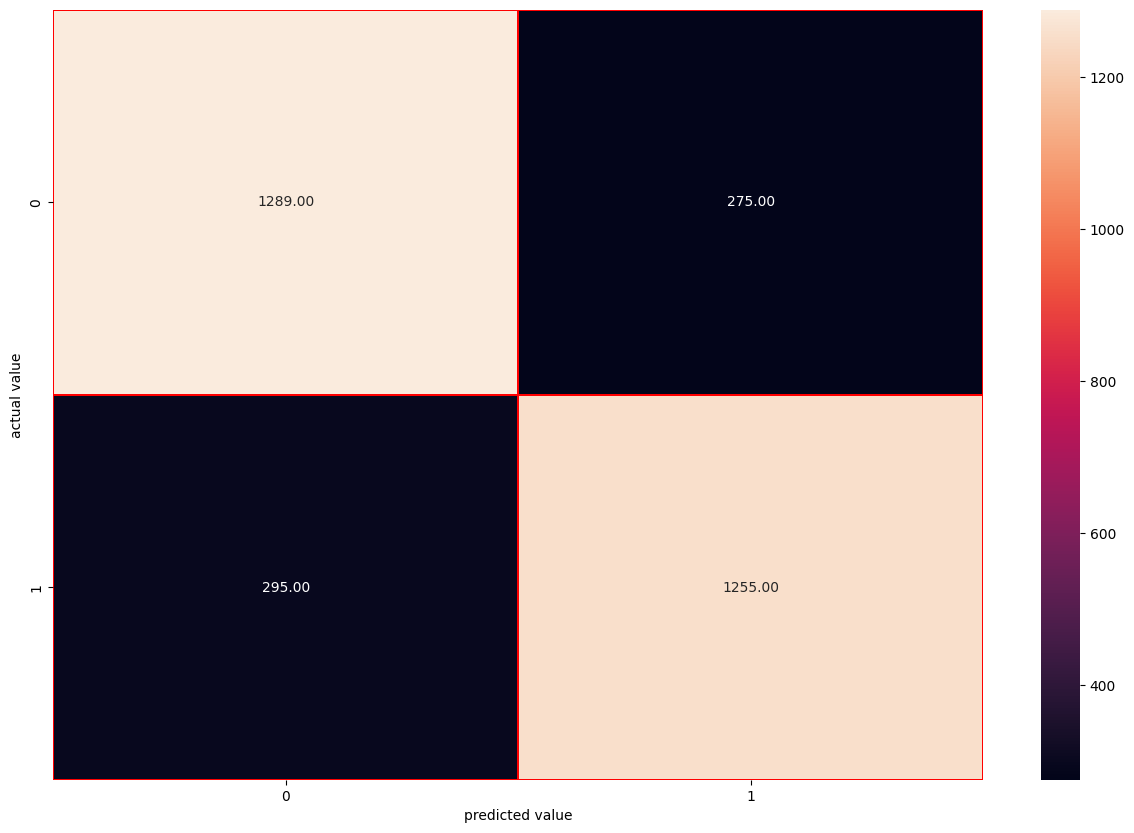

In [76]:
svc=SVC(kernel='poly')
classification_models(svc,x_train,y_train,x_test ,y_test)


0.9081567116249197
[[1381  183]
 [ 103 1447]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1564
           1       0.89      0.93      0.91      1550

    accuracy                           0.91      3114
   macro avg       0.91      0.91      0.91      3114
weighted avg       0.91      0.91      0.91      3114



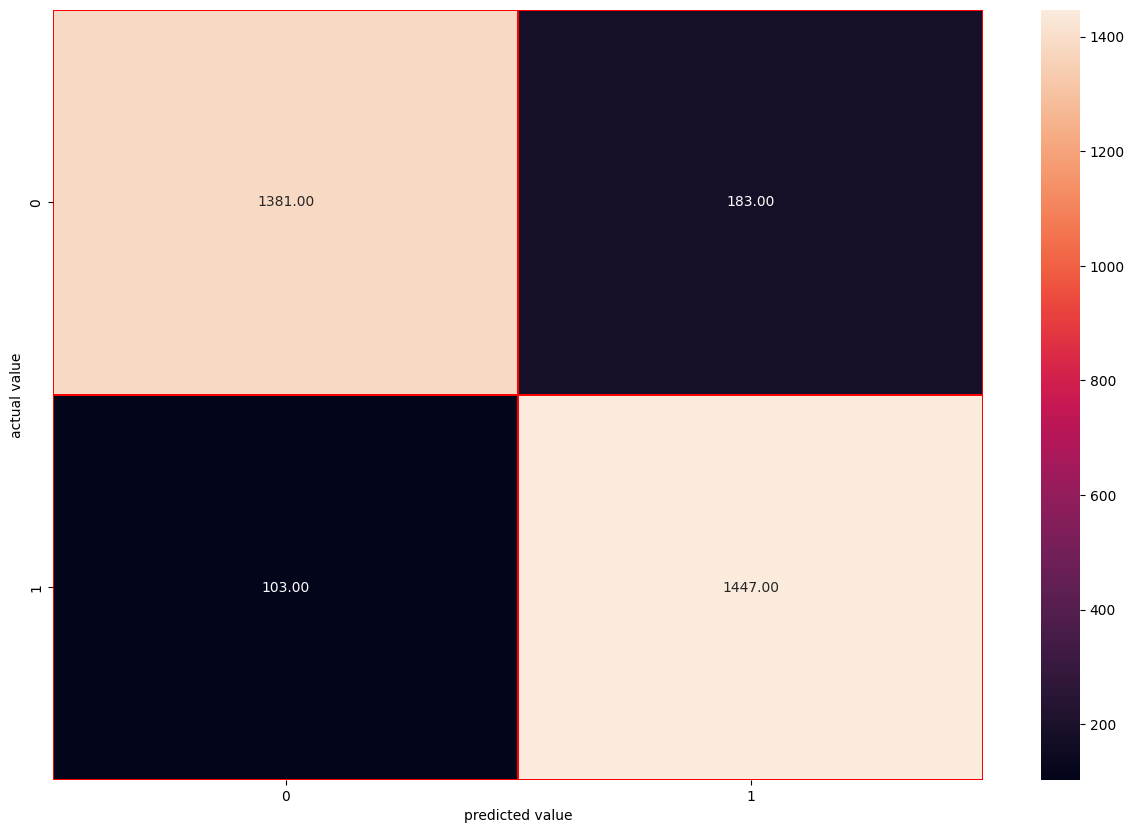

In [77]:
etc=ExtraTreesClassifier()
classification_models(etc,x_train,y_train,x_test,y_test)


0.8477842003853564
[[1316  248]
 [ 226 1324]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1564
           1       0.84      0.85      0.85      1550

    accuracy                           0.85      3114
   macro avg       0.85      0.85      0.85      3114
weighted avg       0.85      0.85      0.85      3114



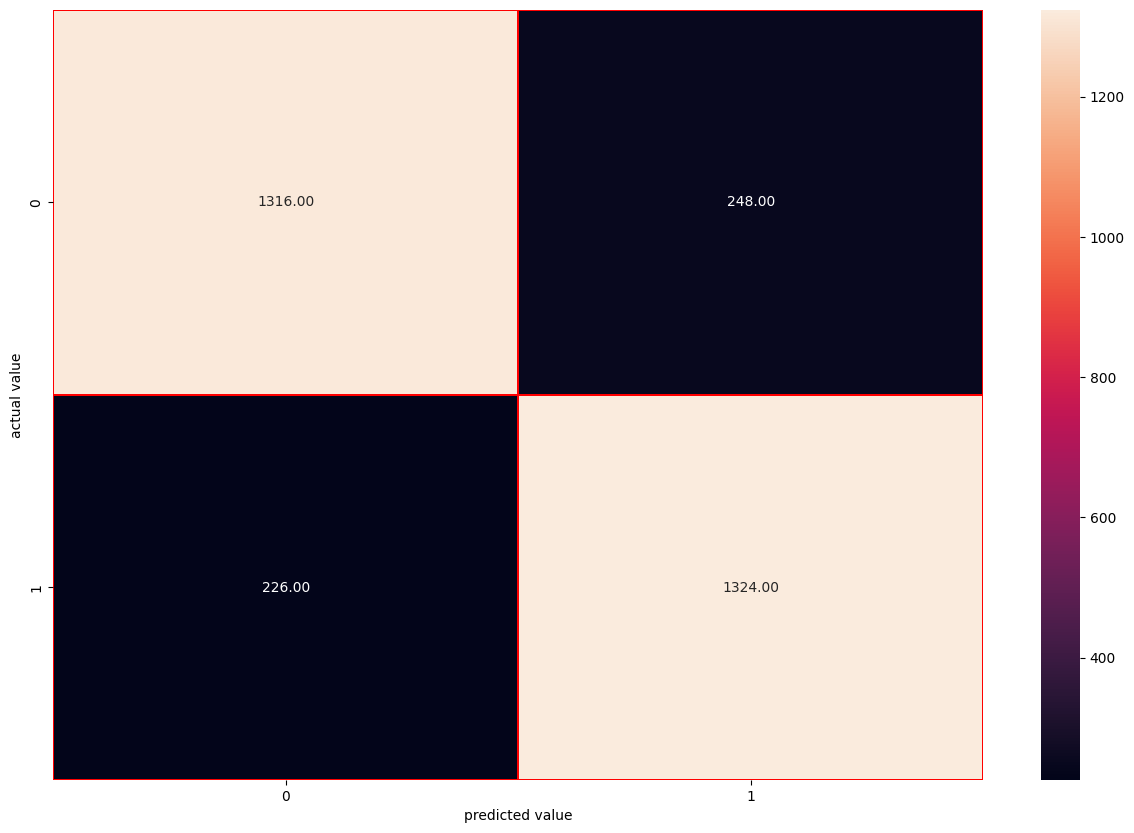

In [78]:
gbc=GradientBoostingClassifier()
classification_models(gbc,x_train,y_train,x_test,y_test)

0.8114964675658317
[[1252  312]
 [ 275 1275]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1564
           1       0.80      0.82      0.81      1550

    accuracy                           0.81      3114
   macro avg       0.81      0.81      0.81      3114
weighted avg       0.81      0.81      0.81      3114



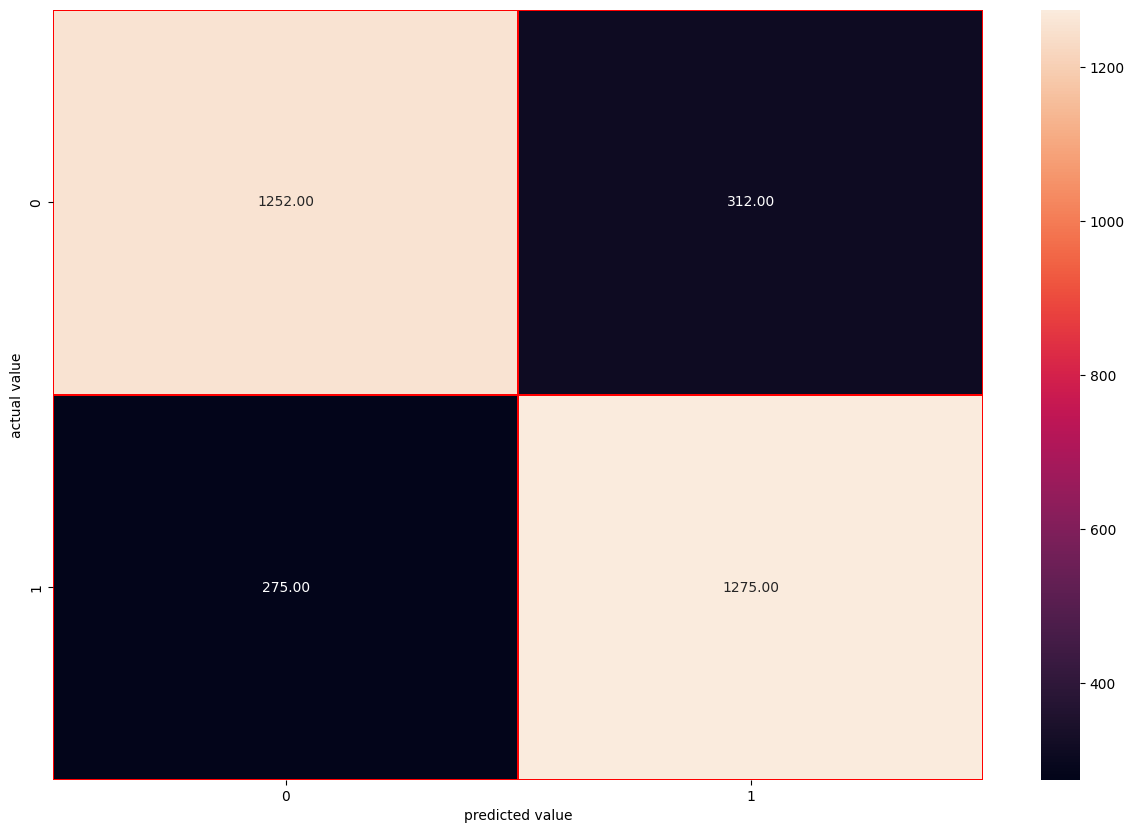

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
classification_models(dtc,x_train,y_train,x_test,y_test)

0.8654463712267181
[[1379  185]
 [ 234 1316]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1564
           1       0.88      0.85      0.86      1550

    accuracy                           0.87      3114
   macro avg       0.87      0.87      0.87      3114
weighted avg       0.87      0.87      0.87      3114



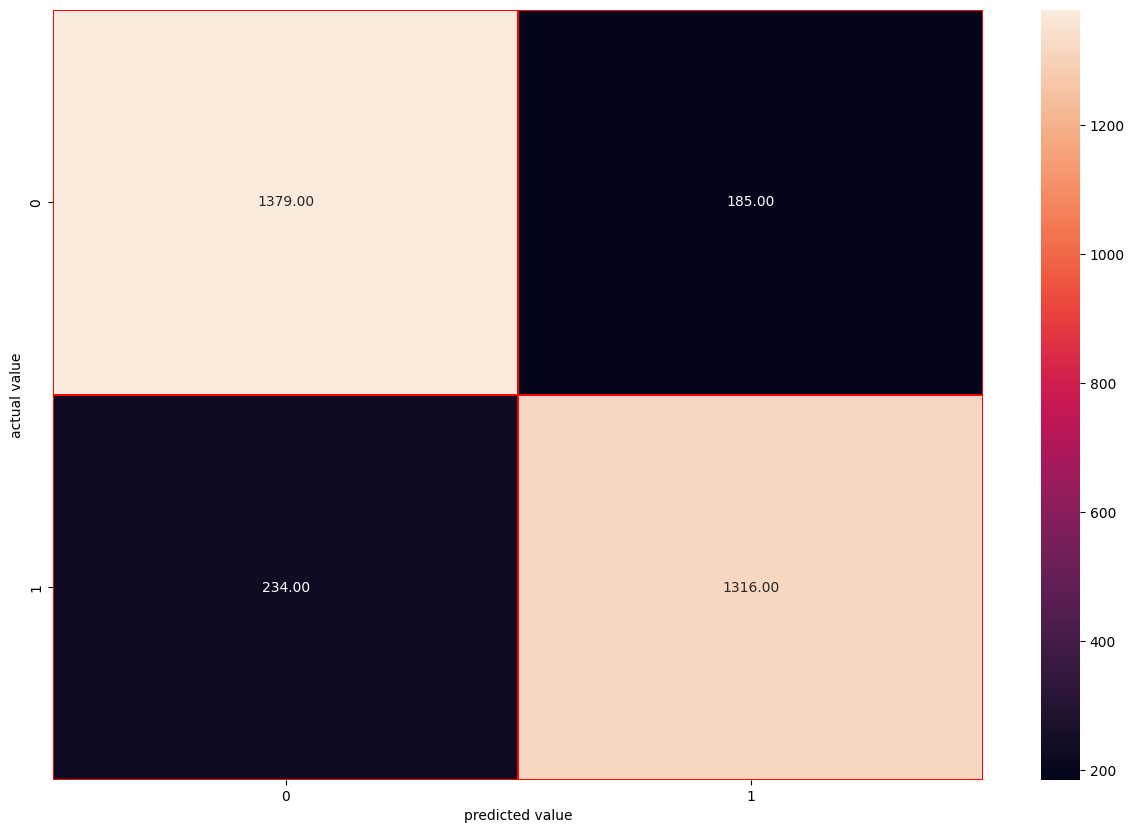

In [80]:
bgc=BaggingClassifier()
classification_models(bgc,x_train,y_train,x_test,y_test)

In [ ]:
                            CHECKING FOR CROSS VALIDATION SCORES OF THE MODEL

In [81]:
def cross_validation(model,x1,y1,x_test):
    
    pred=model.predict(x_test)
    score=cross_val_score(model,x1,y1)
    print(score)
    print(score.mean())
    print('differnce between accuracy score and cross validation is',accuracy_score(y_test,pred)-score.mean())

In [82]:
models=[LR,RFC,etc,gbc,bgc,svc,dtc]

In [83]:
for model in models:
    print('for cross validation of {}'.format(model))
    
    cross_validation(model,x1,y1,x_test)
    print('#'*50)

for cross validation of LogisticRegression()
[0.70086705 0.66184971 0.65028902 0.77312139 0.83044316]
0.7233140655105974
differnce between accuracy score and cross validation is 0.0522157996146434
##################################################
for cross validation of RandomForestClassifier()
[0.67485549 0.54094412 0.64065511 0.79527938 0.90077071]
0.7105009633911368
differnce between accuracy score and cross validation is 0.17549775208734752
##################################################
for cross validation of ExtraTreesClassifier()
[0.7394027  0.58140655 0.71531792 0.85019268 0.90895954]
0.7590558766859345
differnce between accuracy score and cross validation is 0.14910083493898518
##################################################
for cross validation of GradientBoostingClassifier()
[0.59344894 0.47302505 0.60597303 0.72880539 0.8477842 ]
0.6498073217726397
differnce between accuracy score and cross validation is 0.19797687861271673
##########################################

In [84]:
param_grid = {
    'solver': ['lbfgs', 'sag', 'saga', 'newton-cg', 'liblinear'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [85]:
from sklearn.model_selection import GridSearchCV
model=LogisticRegression()
grid_search=GridSearchCV(model,param_grid,cv=5)

In [86]:
grid_search.fit(x1,y1)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg',
                                    'liblinear']})

In [87]:
grid_search.best_params_

{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}

In [90]:
final_model=LogisticRegression(C=0.1,penalty='l1',solver='saga')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(y_test,pred))


0.7748876043673731


                PLOTTING AUC ROC CURVE FOR MY FINAL MODEL

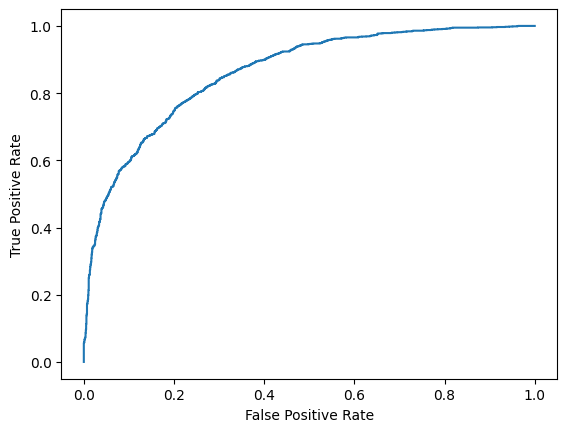

In [91]:
from sklearn import metrics
y_pred_proba = final_model.predict_proba(x_test)[:,1]
fpr, tpr,_= metrics.roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [92]:
import joblib

In [93]:
joblib.dump(final_model,'Rainfall_prediction')

['Rainfall_prediction']

In [94]:
prediction=final_model.predict(x_test)
df=pd.DataFrame()


In [95]:
orignal=np.array(y_test)

In [96]:
df['orignal']=orignal
df['predicted']=prediction
df

,orignal,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
3109,1,1
3110,0,0
3111,1,0
3112,1,1


In [ ]:
# CONSIDERING RAINFALL AS TARGET VARIABLE BUILDING LINEAR REGRSSION MODEL
#SPLITING THE DATASET IN TO X AND Y .X CONTAIN ALL THE INDEPENDENT FEATURE AND Y CONTAIN TARGET FEATURE

In [120]:
x2=RFdf.drop('Rainfall',axis=1)

In [121]:
y2=RFdf.loc[:,'Rainfall']

In [122]:
y2

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 6762, dtype: float64

In [123]:
x2

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.900000,5.302395,7.890896,13,44.000000,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0,0
1,1,7.4,25.100000,5.302395,7.890896,14,44.000000,6,15,4.0,...,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0,0
2,1,12.9,25.700000,5.302395,7.890896,15,46.000000,13,15,19.0,...,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0,0
3,1,9.2,28.000000,5.302395,7.890896,4,24.000000,9,0,11.0,...,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0,0
4,1,17.5,32.300000,5.302395,7.890896,13,41.000000,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,5.302395,7.890896,0,31.000000,9,1,13.0,...,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,0,0
8421,9,3.6,25.300000,5.302395,7.890896,6,22.000000,9,3,13.0,...,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,0,0
8422,9,5.4,26.900000,5.302395,7.890896,3,37.000000,9,14,9.0,...,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,0,0
8423,9,7.8,27.000000,5.302395,7.890896,9,28.000000,10,3,13.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [125]:
from sklearn.preprocessing import MinMaxScaler
minsc=MinMaxScaler()
x2=pd.DataFrame(minsc.fit_transform(x2),columns=x2.columns)

In [126]:
x2

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.090909,0.504918,0.440120,0.625,0.375,0.866667,0.587302,0.866667,0.933333,0.519481,...,0.6375,0.172043,0.132463,0.215580,1.000000,0.540123,0.458015,0.451713,0.0,0.0
1,0.090909,0.308197,0.505988,0.625,0.375,0.933333,0.587302,0.400000,1.000000,0.103896,...,0.3000,0.204301,0.240672,0.240942,0.542101,0.540123,0.467176,0.529595,0.0,0.0
2,0.090909,0.488525,0.523952,0.625,0.375,1.000000,0.619048,0.866667,1.000000,0.493506,...,0.2250,0.258065,0.128731,0.273551,0.542101,0.250000,0.583206,0.495327,0.0,0.0
3,0.090909,0.367213,0.592814,0.625,0.375,0.266667,0.269841,0.600000,0.000000,0.285714,...,0.3125,0.107527,0.501866,0.422101,0.542101,0.540123,0.494656,0.598131,0.0,0.0
4,0.090909,0.639344,0.721557,0.625,0.375,0.866667,0.539683,0.066667,0.466667,0.181818,...,0.7750,0.290323,0.248134,0.175725,0.875000,1.000000,0.485496,0.697819,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,0.818182,0.157377,0.455090,0.625,0.375,0.000000,0.380952,0.600000,0.066667,0.337662,...,0.3875,0.193548,0.763060,0.693841,0.542101,0.540123,0.250382,0.470405,0.0,0.0
6758,0.818182,0.183607,0.511976,0.625,0.375,0.400000,0.238095,0.600000,0.200000,0.337662,...,0.4500,0.161290,0.722015,0.650362,0.542101,0.540123,0.274809,0.535826,0.0,0.0
6759,0.818182,0.242623,0.559880,0.625,0.375,0.200000,0.476190,0.600000,0.933333,0.233766,...,0.4125,0.193548,0.628731,0.567029,0.542101,0.540123,0.323664,0.585670,0.0,0.0
6760,0.818182,0.321311,0.562874,0.625,0.375,0.600000,0.333333,0.666667,0.200000,0.337662,...,0.3875,0.193548,0.569030,0.556159,0.375000,0.250000,0.403053,0.582555,0.0,0.0


In [134]:
corrMat=x2.corr()

<Axes: >

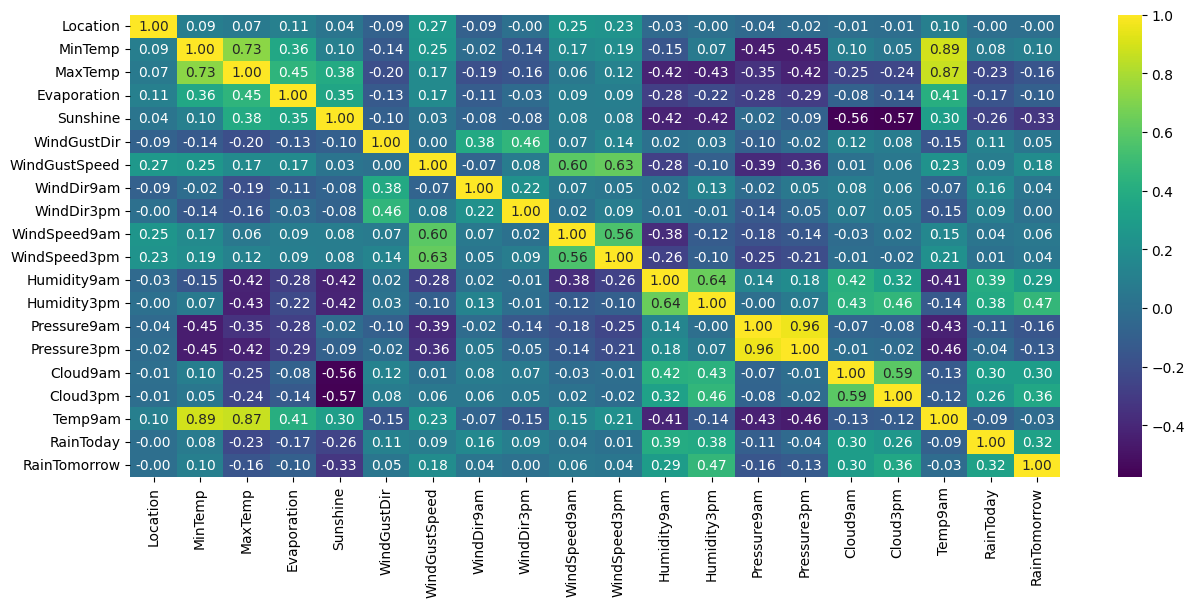

In [135]:
plt.figure(figsize=(15,6))
sns.heatmap(corrMat,annot=True,cmap='viridis',fmt='.2f')

In [132]:
x2.drop('Temp3pm',axis=1,inplace=True)

In [136]:
x2.drop('Pressure3pm',axis=1,inplace=True)

In [138]:
x2.drop('Temp9am',axis=1,inplace=True)

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['features']=x2.columns
vif

,vif values,features
0,4.520055,Location
1,37.980307,MinTemp
2,34.137795,MaxTemp
3,6.521676,Evaporation
4,6.096010,Sunshine
5,3.864820,WindGustDir
6,15.717177,WindGustSpeed
7,4.157797,WindDir9am
8,5.194813,WindDir3pm
9,5.662157,WindSpeed9am


In [140]:
x2.skew()

Location        -0.000009
MinTemp         -0.083706
MaxTemp          0.313680
Evaporation     -0.440138
Sunshine         0.453697
WindGustDir      0.105287
WindGustSpeed    0.462787
WindDir9am       0.220355
WindDir3pm      -0.123726
WindSpeed9am     0.715200
WindSpeed3pm     0.389355
Humidity9am     -0.238373
Humidity3pm      0.150860
Pressure9am      0.024813
Cloud9am        -0.215085
Cloud3pm        -0.162159
RainToday        1.266937
RainTomorrow     1.266937
dtype: float64

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost 
from xgboost import XGBRegressor

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x2_train, y2_train)
    predrf = LR.predict(x2_test)
    score = r2_score(y2_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8676260980151125  on Random_state  107


In [149]:
lr=LinearRegression()
rg=Ridge()
etc=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
knr=KNeighborsRegressor(n_neighbors=2)
svr=SVR(kernel='rbf')

In [169]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.30,random_state=maxRS)

In [170]:
def regressor_models(model,x2_train,y2_tain,x2_test,y2_test):
    model.fit(x2_train,y2_train)
    pred_test=model.predict(x2_test)

    pred_train=model.predict(x2_train)
    print('R2_score',r2_score(y2_test,pred_test)*100)
    print('R2 score on training data',r2_score(y2_train,pred_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y2_test,pred_test))
    print('Mean Squared  Error',mean_squared_error(y2_test,pred_test))
    print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y2_test,pred_test)))

    

In [171]:
models=[lr,rg,etc,gbr,rfr,knr,svr]


for model in models:
    print('Score for {}'.format(model))
    regressor_models(model,x2_train,y2_train,x2_test,y2_test)
    print('*'*50)

Score for LinearRegression()
R2_score 86.76260980151125
R2 score on training data 82.27526393898349
Mean Absolute Error 0.25079880798614645
Mean Squared  Error 0.18904532188911333
Root Mean Absolute Error 0.4347934243857804
**************************************************
Score for Ridge()
R2_score 86.75597734512657
R2 score on training data 82.27491997346894
Mean Absolute Error 0.2512793646881952
Mean Squared  Error 0.18914004107721286
Root Mean Absolute Error 0.4349023351020466
**************************************************
Score for ExtraTreesRegressor()
R2_score 86.45176336990201
R2 score on training data 99.8023738357454
Mean Absolute Error 0.25323812064182527
Mean Squared  Error 0.19348457032407745
Root Mean Absolute Error 0.439868810356085
**************************************************
Score for GradientBoostingRegressor()
R2_score 87.7102173065947
R2 score on training data 86.56280347573231
Mean Absolute Error 0.2414516890751542
Mean Squared  Error 0.17551238502339386

In [172]:
def cross_validation(model,x2,y2):
    pred_test=model.predict(x2_test)
    score=cross_val_score(model,x2,y2,scoring='r2')
    print(score)
    print(score.mean())
    print('difference between r2 score and cross validation score is ',(r2_score(y2_test,pred_test)-score.mean())*100)

In [ ]:
models=[lr,rg,etc,gbr,rfr,knr,svr]

In [173]:
for model in models:
    print('Cross validation for {}'.format(model))
    cross_validation(model,x2,y2)
    print('*'*50)

Cross validation for LinearRegression()
[0.88587933 0.86382639 0.78330488 0.70861354 0.92848937]
0.8340227025027998
difference between r2 score and cross validation score is  3.360339551231273
**************************************************
Cross validation for Ridge()
[0.88579516 0.86377725 0.78359437 0.70866379 0.92857511]
0.834081137936464
difference between r2 score and cross validation score is  3.347863551480168
**************************************************
Cross validation for ExtraTreesRegressor()
[0.87074721 0.86816278 0.76893625 0.70443213 0.91535744]
0.8255271621897396
difference between r2 score and cross validation score is  3.8990471509280478
**************************************************
Cross validation for GradientBoostingRegressor()
[0.8764292  0.87158906 0.7805538  0.70327873 0.92892918]
0.832155992467213
difference between r2 score and cross validation score is  4.494618059873412
**************************************************
Cross validation for Ran

In [175]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20],
              'random_state':[15,16,17],
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
rd=Ridge()

grid_search= GridSearchCV(Ridge(), parameters, cv=5)
grid_search.fit(x2_train, y2_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'max_iter': [0, 10, 20], 'random_state': [15, 16, 17],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [176]:
grid_search.best_params_

{'max_iter': 10, 'random_state': 16, 'solver': 'saga'}

In [177]:
final_model_regressor=Ridge(max_iter=10,random_state=16,solver='saga')
final_model_regressor.fit(x_train,y2_train)
pred=final_model_regressor.predict(x_test)
acc=r2_score(y2_test,pred)
print(acc)
score=cross_val_score(final_model_regressor,x2,y2,cv=5)
print(score)
print(score.mean()*100)
print('difference between r2 score and cross validation score is ',(acc-score.mean())*100)


0.8675447520424193
[0.8857808  0.86377275 0.78360755 0.70868092 0.92859606]
83.40876171175043
difference between r2 score and cross validation score is  3.345713492491509


In [178]:
import joblib

In [179]:
joblib.dump(final_model_regressor,'Rainfall_prediction_regressor.pkl')

['Rainfall_prediction_regressor.pkl']

In [180]:
model_regressor=joblib.load('Rainfall_prediction_regressor.pkl')

In [181]:
df=pd.DataFrame()
prediction=model_regressor.predict(x2_test)

In [182]:
dummy_test=np.array(y2_test)

In [183]:
df['orginal']=dummy_test
df['prediction']=prediction
df

,orginal,prediction
0,3.000000,2.819416
1,0.000000,0.171232
2,0.000000,0.192100
3,0.000000,0.030666
4,0.200000,0.351890
...,...,...
2024,0.000000,0.052563
2025,2.780148,0.262889
2026,0.000000,0.243420
2027,3.000000,2.672002
